# Imports

In [1]:
import pandas as pd
import numpy as np
import os

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context(context='talk')
plt.rcParams['figure.figsize'] = [16,8]

In [152]:
def target_rel(data, feature, feature_title=None, color=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Total Cases by {feature_title}')

    sns.barplot(ax=axes[0], data=data, x=feature, y='y1', color=color)
    sns.stripplot(ax=axes[1], data=data,x=feature, y='y1', alpha = 0.3)
    axes[0].tick_params(axis='x', rotation=45)
    plt.ylabel('Cases')
    plt.xlabel('Year')
    axes[1].tick_params(axis='x', rotation=45)
    plt.ylabel('Cases')
    plt.xlabel('Year')

# Flu Cases (Weekly, 2015-2022)

In [2]:
# load all csv files into pandas dataframes
df_list = []
table_name_list = [
    '2015_2016', '2016_2017', '2017_2018', '2018_2019',
    '2019_2020', '2020_2021', '2021_2022', '2022_2023'
    ]

datapath = r"..\data\flu_cases\flu_cases_"

for i in table_name_list:
    try:
        df = pd.read_csv(datapath+i+'.csv')
        df_list.append(df)
    except:
        df = pd.read_excel(datapath+i+'.xlsx')
        df_list.append(df)

In [3]:
df_1516 = df_list[0]
df_1617 = df_list[1]
df_1718 = df_list[2]
df_1819 = df_list[3]
df_1920 = df_list[4]
df_2021 = df_list[5]
df_2122 = df_list[6]
df_2223 = df_list[7]

In [4]:
df_1516 = df_1516.iloc[:,[0,2,3,4,5]]
df_1516 = df_1516.rename(columns = {'InfluenzaSeasonandEpidemiologicalWeek':'Surveillance Week',
                                    'PositiveFluAH1N1pdm09':'A(H1N1)pdm09',
                                    'PositiveFluAH3':'A(H3N2)',
                                    'PositiveFluAunsubtyped':'A(Unsubtyped)',
                                    'TotalFluBPositive':'Influenza B'})
df_1516["Surveillance Week"] = df_1516["Surveillance Week"].str[4:]
df_1516 = df_1516.iloc[:52]
df_1516['Year'] = 0
df_1516['Year'].loc[(df_1516['Surveillance Week'].astype(int) >= 35) & (df_1516['Surveillance Week'].astype(int) <= 52)] = "2015"
df_1516['Year'].loc[(df_1516['Surveillance Week'].astype(int) < 35)] = "2016"
print(len(df_1516['Surveillance Week']))
df_1516.head()

52


C:\Users\User\AppData\Local\Temp\ipykernel_5152\1798358017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1516['Year'].loc[(df_1516['Surveillance Week'].astype(int) >= 35) & (df_1516['Surveillance Week'].astype(int) <= 52)] = "2015"


Surveillance Week  A(H1N1)pdm09  A(H3N2)  A(Unsubtyped)  Influenza B  Year
0                35           1.0      2.0            3.0          3.0  2015
1                36           2.0     11.0            5.0          0.0  2015
2                37           0.0     10.0            4.0          1.0  2015
3                38           0.0     16.0           13.0          0.0  2015
4                39           6.0     34.0           13.0          6.0  2015

In [5]:
df_1617 = df_1617.iloc[:,[0,2,3,4,5]]
df_1617 = df_1617.rename(columns = {'InfluenzaSeasonandEpidemiologicalWeek':'Surveillance Week',
                                    'PositiveFluAH1N1pdm09':'A(H1N1)pdm09',
                                    'PositiveFluAH3':'A(H3N2)',
                                    'PositiveFluAunsubtyped':'A(Unsubtyped)',
                                    'TotalFluBPositive':'Influenza B'})
df_1617["Surveillance Week"] = df_1617["Surveillance Week"].str[4:]
df_1617 = df_1617.iloc[:52]
df_1617['Year'] = 0
df_1617['Year'].loc[(df_1617['Surveillance Week'].astype(int) >= 35) & (df_1617['Surveillance Week'].astype(int) <= 52)] = "2016"
df_1617['Year'].loc[(df_1617['Surveillance Week'].astype(int) < 35)] = "2017"
print(len(df_1617['Surveillance Week']))
df_1617.head()

52


C:\Users\User\AppData\Local\Temp\ipykernel_5152\43317556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1617['Year'].loc[(df_1617['Surveillance Week'].astype(int) >= 35) & (df_1617['Surveillance Week'].astype(int) <= 52)] = "2016"


Surveillance Week  A(H1N1)pdm09  A(H3N2)  A(Unsubtyped)  Influenza B  Year
0                35           0.0      2.0            0.0          0.0  2016
1                36           1.0      6.0            2.0          9.0  2016
2                37           0.0     17.0            3.0          3.0  2016
3                38           2.0     28.0           11.0          3.0  2016
4                39           1.0     41.0           14.0          7.0  2016

In [6]:
df_1718 = df_1718.rename(columns = {'Report Week':'Surveillance Week'
                                    })
print(len(df_1718['Surveillance Week']))
df_1718['Year'] = 0
df_1718['Year'].loc[(df_1718['Surveillance Week'].astype(int) >= 35) & (df_1718['Surveillance Week'].astype(int) <= 52)] = "2017"
df_1718['Year'].loc[(df_1718['Surveillance Week'].astype(int) < 35)] = "2018"
df_1718.head()

52


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                 35              3       20             6            5  2017
1                 36              7       28             1            3  2017
2                 37              7       14            13            4  2017
3                 38             18       31             3            5  2017
4                 39             18       53             1            8  2017

In [7]:
df_1819['Year'] = 0
df_1819['Year'].loc[(df_1819['Surveillance Week'].astype(int) >= 35) & (df_1819['Surveillance Week'].astype(int) <= 52)] = "2018"
df_1819['Year'].loc[(df_1819['Surveillance Week'].astype(int) < 35)] = "2019"
print(len(df_1819['Surveillance Week']))
df_1819.head()

52


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                 35              3        2             7            0  2018
1                 36              4        7             4            0  2018
2                 37              3        2             3            1  2018
3                 38              6        3             2            3  2018
4                 39             11        5             1            3  2018

In [8]:
df_1920 = df_1920.iloc[:,:5]
df_1920 = df_1920.rename(columns = {'A(H1N1)':'A(H1N1)pdm09'})
df_1920['Year'] = 0
df_1920['Year'].loc[(df_1920['Surveillance Week'].astype(int) >= 35) & (df_1920['Surveillance Week'].astype(int) <= 52)] = "2019"
df_1920['Year'].loc[(df_1920['Surveillance Week'].astype(int) < 35)] = "2020"
print(len(df_1920['Surveillance Week']))
df_1920.head()

52


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                 35             10       16             0            2  2019
1                 36             11       13             2            2  2019
2                 37              5       17             2            5  2019
3                 38             11       15             3            6  2019
4                 39             11       21             2            3  2019

In [9]:
df_2021 = df_2021.iloc[:,:5]
df_2021 = df_2021.rename(columns = {'A(H1N1)':'A(H1N1)pdm09'})
df_2021['Year'] = 0
df_2021['Year'].loc[(df_2021['Surveillance Week'].astype(int) >= 35) & (df_2021['Surveillance Week'].astype(int) <= 53)] = "2020"
df_2021['Year'].loc[(df_2021['Surveillance Week'].astype(int) < 35)] = "2021"
print(len(df_2021['Surveillance Week']))
df_2021.head()

53


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                 35              0        0             0            1  2020
1                 36              0        0             0            0  2020
2                 37              0        0             0            0  2020
3                 38              1        0             0            0  2020
4                 39              0        0             0            0  2020

In [10]:
df_2122 = df_2122.iloc[:,:5]
df_2122 = df_2122.rename(columns = {'A(H1N1)':'A(H1N1)pdm09'})
df_2122['Year'] = 0
df_2122['Year'].loc[(df_2122['Surveillance Week'].astype(int) >= 35) & (df_2122['Surveillance Week'].astype(int) <= 52)] = "2021"
df_2122['Year'].loc[(df_2122['Surveillance Week'].astype(int) < 35)] = "2022"
print(len(df_2122['Surveillance Week']))
df_2122.head()

52


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                 35              3        0             0            0  2021
1                 36              1        0             0            0  2021
2                 37              0        4             0            0  2021
3                 38              0        0             0            0  2021
4                 39              0        0             1            0  2021

In [11]:
df_2223 = df_2223.iloc[:,:5]
df_2223 = df_2223.rename(columns = {'A(H1N1)':'A(H1N1)pdm09'})
df_2223['Year'] = 0
df_2223['Year'].loc[(df_2223['Surveillance Week'].astype(int) >= 35) & (df_2223['Surveillance Week'].astype(int) <= 52)] = "2022"
df_2223['Year'].loc[(df_2223['Surveillance Week'].astype(int) < 35)] = "2023"
print(len(df_2223['Surveillance Week']))
df_2223

12


Surveillance Week  A(Unsubtyped)  A(H3N2)  A(H1N1)pdm09  Influenza B  Year
0                  35             12       10             2            3  2022
1                  36              9        5             1            5  2022
2                  37             19        9             3            2  2022
3                  38             26       35            20            3  2022
4                  39             44       53            22            5  2022
5                  40             63       66            16            4  2022
6                  41            120      110            20            1  2022
7                  42            214      204            11            9  2022
8                  43            407      595            23            6  2022
9                  44            995     1351            54            7  2022
10                 45           1799     2265            69           11  2022
11                 46           3159     2213            73           15  2022

In [12]:
df_flu = pd.concat([df_1516,
df_1617, 
df_1718,
df_1819, 
df_1920, 
df_2021, 
df_2122, 
df_2223], ignore_index=True)

In [13]:
df_flu.head()

Surveillance Week  A(H1N1)pdm09  A(H3N2)  A(Unsubtyped)  Influenza B  Year
0                35           1.0      2.0            3.0          3.0  2015
1                36           2.0     11.0            5.0          0.0  2015
2                37           0.0     10.0            4.0          1.0  2015
3                38           0.0     16.0           13.0          0.0  2015
4                39           6.0     34.0           13.0          6.0  2015

In [14]:
# Create List of columns
col_list= ['A(H1N1)pdm09','A(H3N2)','A(Unsubtyped)','Influenza B']
# sum specific columns
df_flu['Total Cases'] = df_flu[col_list].sum(axis=1)
df_flu.head()

Surveillance Week  A(H1N1)pdm09  A(H3N2)  A(Unsubtyped)  Influenza B  Year  \
0                35           1.0      2.0            3.0          3.0  2015   
1                36           2.0     11.0            5.0          0.0  2015   
2                37           0.0     10.0            4.0          1.0  2015   
3                38           0.0     16.0           13.0          0.0  2015   
4                39           6.0     34.0           13.0          6.0  2015   

   Total Cases  
0          9.0  
1         18.0  
2         15.0  
3         29.0  
4         59.0

In [15]:
# create date column
from epiweeks import Week

df_flu['Surveillance Week'] = df_flu['Surveillance Week'].astype(str)
df_flu['Surveillance Week'] = df_flu['Surveillance Week'].str.pad(2, fillchar='0')
df_flu['Epiweek'] = df_flu['Year'].astype(str) + df_flu['Surveillance Week'].astype(str)
df_flu['Week Ending'] = df_flu['Epiweek'].apply(lambda x: Week.fromstring(x).enddate())
df_flu

Surveillance Week  A(H1N1)pdm09  A(H3N2)  A(Unsubtyped)  Influenza B  \
0                  35           1.0      2.0            3.0          3.0   
1                  36           2.0     11.0            5.0          0.0   
2                  37           0.0     10.0            4.0          1.0   
3                  38           0.0     16.0           13.0          0.0   
4                  39           6.0     34.0           13.0          6.0   
..                ...           ...      ...            ...          ...   
372                42          11.0    204.0          214.0          9.0   
373                43          23.0    595.0          407.0          6.0   
374                44          54.0   1351.0          995.0          7.0   
375                45          69.0   2265.0         1799.0         11.0   
376                46          73.0   2213.0         3159.0         15.0   

     Year  Total Cases Epiweek Week Ending  
0    2015          9.0  201535  2015-09-05  
1    2015         18.0  201536  2015-09-12  
2    2015         15.0  201537  2015-09-19  
3    2015         29.0  201538  2015-09-26  
4    2015         59.0  201539  2015-10-03  
..    ...          ...     ...         ...  
372  2022        438.0  202242  2022-10-22  
373  2022       1031.0  202243  2022-10-29  
374  2022       2407.0  202244  2022-11-05  
375  2022       4144.0  202245  2022-11-12  
376  2022       5460.0  202246  2022-11-19  

[377 rows x 9 columns]

In [16]:
df_flu['Week Ending'] = pd.to_datetime(df_flu['Week Ending'], format="%Y-%m-%d")

In [17]:
pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu.pkl", "wb" ))

In [18]:
df_flu_pre_COVID = df_flu[df_flu['Week Ending'] < pd.to_datetime('2020-03-01')]
pickle.dump(df_flu_pre_COVID, open(r"..\data\flu_cases\df_flu_pre_COVID.pkl", "wb" ))

In [19]:
df_flu_COVID = df_flu[df_flu['Week Ending'] >= pd.to_datetime('2020-03-01')]
pickle.dump(df_flu_COVID, open(r"..\data\flu_cases\df_flu_COVID.pkl", "wb" ))

In [20]:
df_flu_COVID = df_flu_COVID[['Week Ending', 'Total Cases']]
df_flu_COVID = df_flu_COVID.set_index('Week Ending')
pickle.dump(df_flu_COVID, open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "wb" ))

In [21]:
df_flu = df_flu[['Week Ending', 'Total Cases']]
df_flu = df_flu.set_index('Week Ending')
pickle.dump(df_flu, open(r"..\data\flu_cases\df_flu_total.pkl", "wb" ))

In [22]:
df_flu_pre_COVID = df_flu_pre_COVID[['Week Ending', 'Total Cases']]
df_flu_pre_COVID = df_flu_pre_COVID.set_index('Week Ending')
pickle.dump(df_flu_pre_COVID, open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "wb" ))

<AxesSubplot: xlabel='Week Ending'>

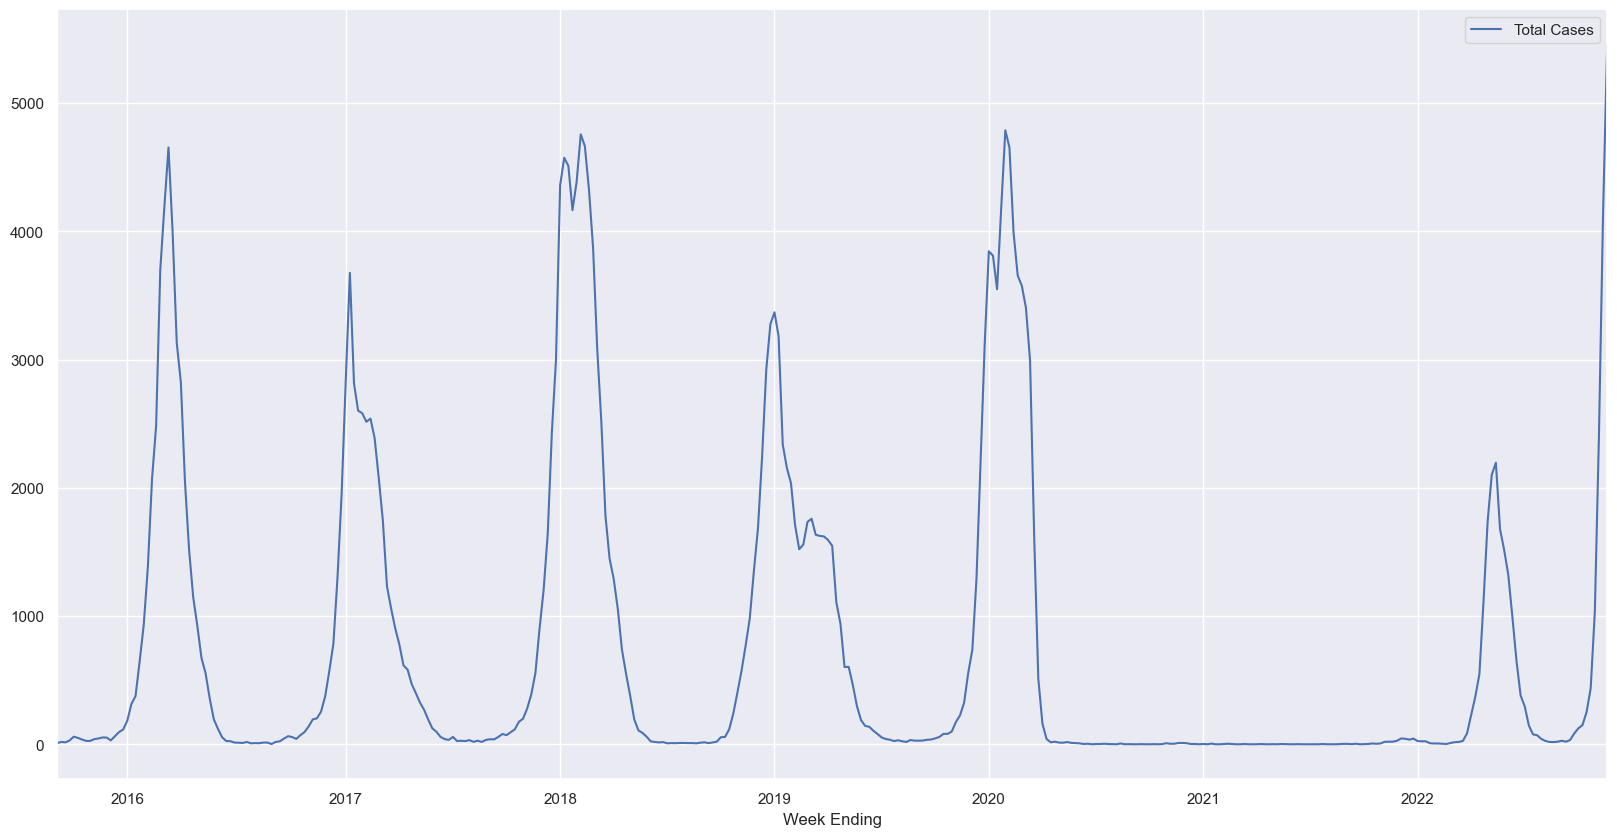

In [23]:
df_flu.plot()

<AxesSubplot: xlabel='Week Ending'>

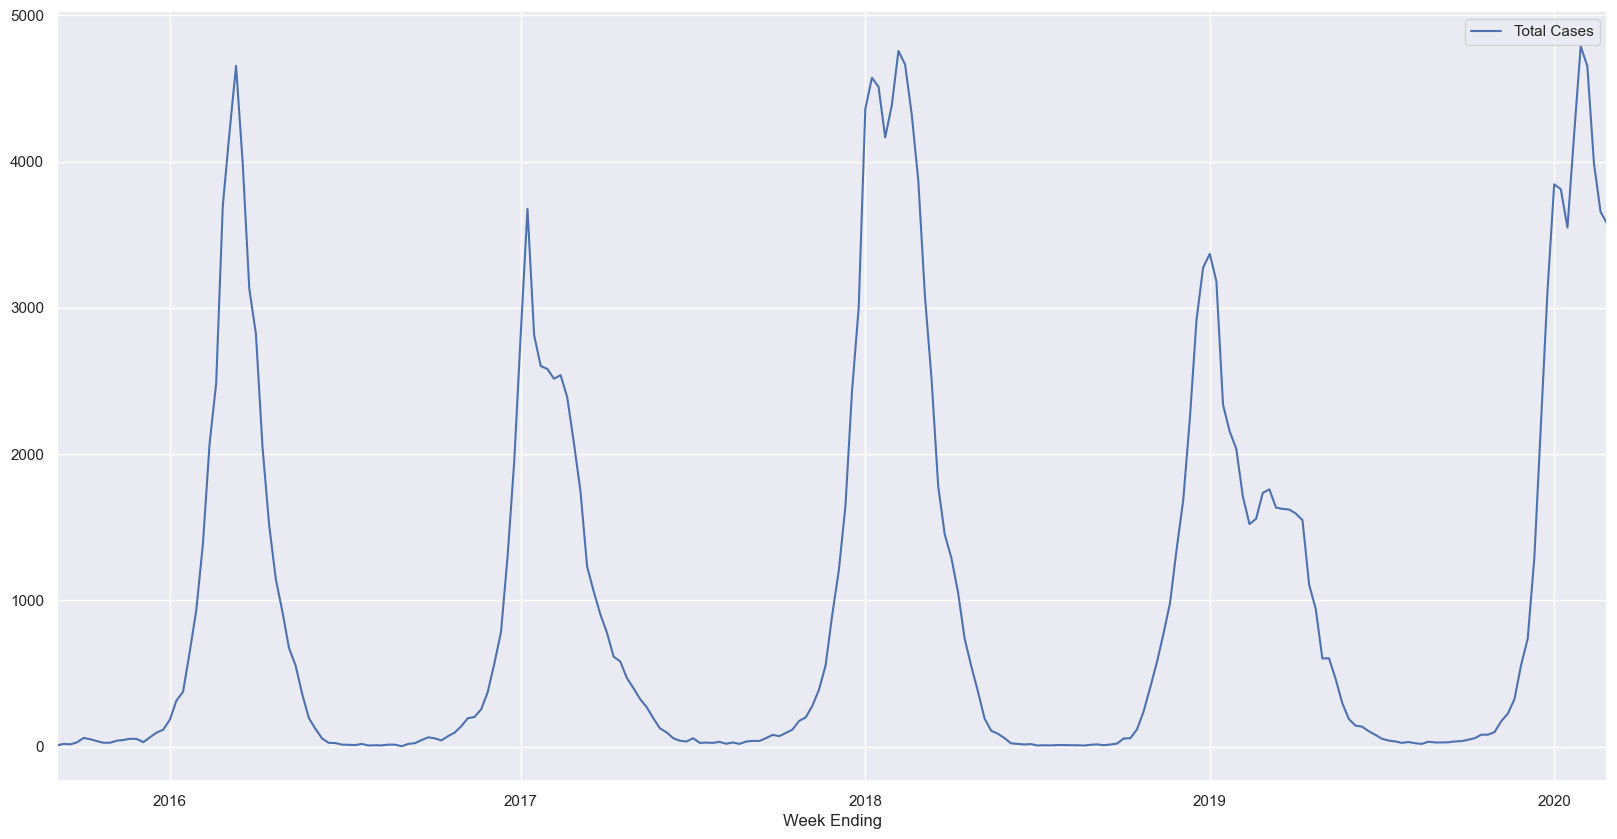

In [24]:
df_flu_pre_COVID.plot()

<AxesSubplot: xlabel='Week Ending'>

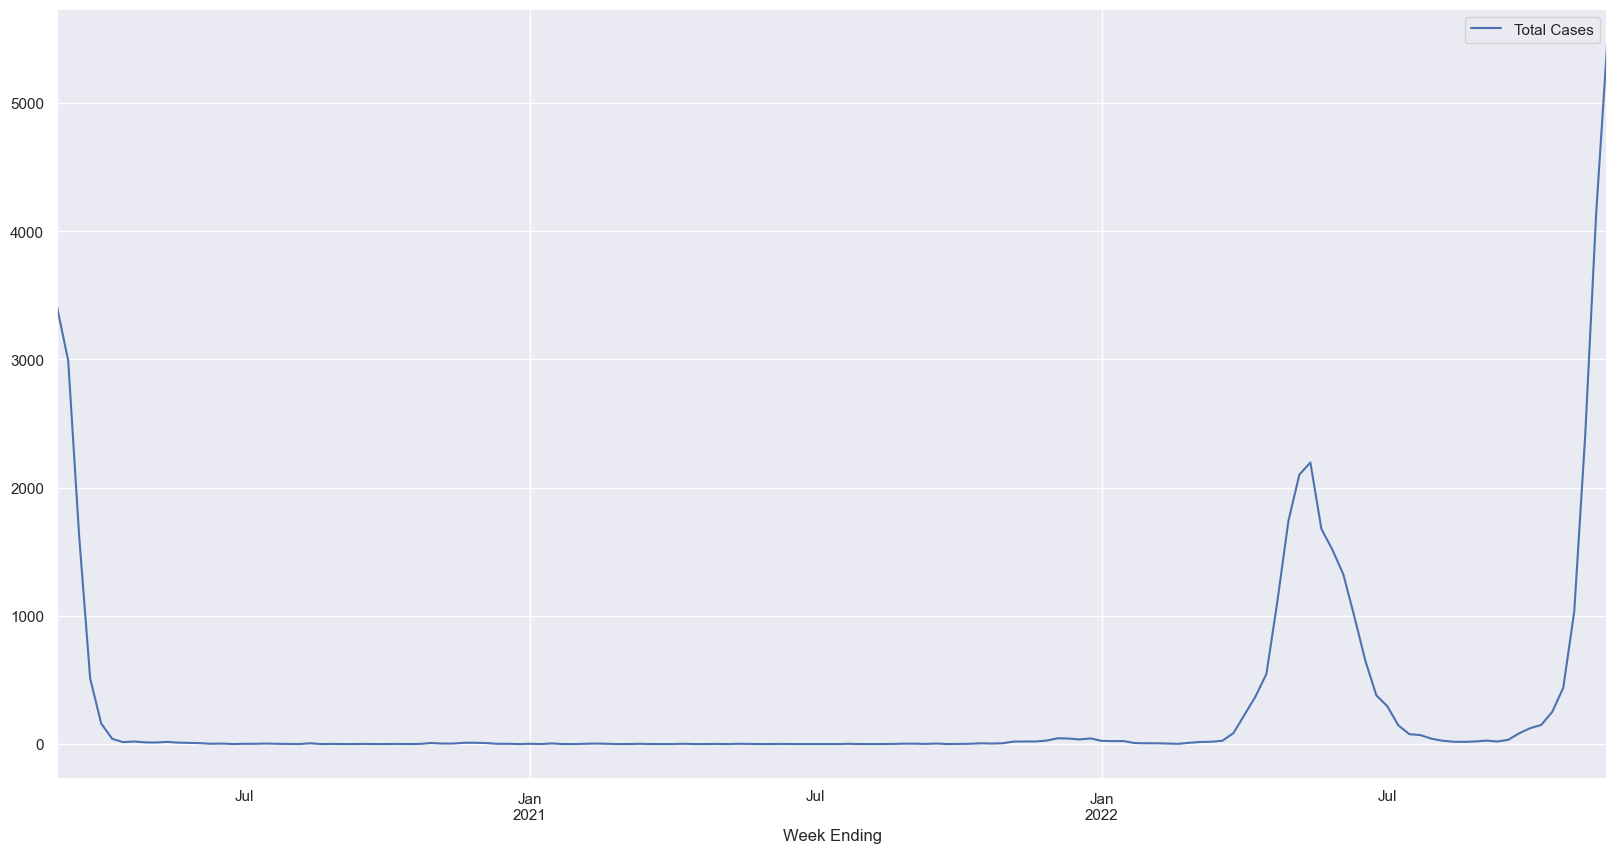

In [25]:
df_flu_COVID.plot()

# Health Indicators (Annually, 2015-2021)

In [2]:
df_indicators = pd.read_csv(r'..\data\health_indicators\health_indicators_2015_2021.csv', skiprows=12)

In [3]:
df_indicators.tail(10)

Indicators  \
85                                                 49   
86                                                 50   
87                                                 51   
88                                                 52   
89                                                 53   
90                                                NaN   
91                                                NaN   
92                                                NaN   
93  How to cite: Statistics Canada. Table 13-10-00...   
94  https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...   

                                                 2015 2016 2017 2018 2019  \
85  Population aged 12 and over who have a health ...  NaN  NaN  NaN  NaN   
86  Population aged 12 and over who reported havin...  NaN  NaN  NaN  NaN   
87  Medical doctor includes family or general prac...  NaN  NaN  NaN  NaN   
88  Due to content changes, this indicator is now ...  NaN  NaN  NaN  NaN   
89  Population aged 12 and over who reported havin...  NaN  NaN  NaN  NaN   
90                                                NaN  NaN  NaN  NaN  NaN   
91                                                NaN  NaN  NaN  NaN  NaN   
92                                                NaN  NaN  NaN  NaN  NaN   
93                                                NaN  NaN  NaN  NaN  NaN   
94                                                NaN  NaN  NaN  NaN  NaN   

   2020 2021  
85  NaN  NaN  
86  NaN  NaN  
87  NaN  NaN  
88  NaN  NaN  
89  NaN  NaN  
90  NaN  NaN  
91  NaN  NaN  
92  NaN  NaN  
93  NaN  NaN  
94  NaN  NaN

In [4]:
# Drop nulls because they are only showing on the rows without data
df_indicators.dropna(inplace=True)

# Null values in the data are represented with '..'
df_indicators = df_indicators.replace('..', np.nan)

In [5]:
# 29 indicators, 8 years

df_indicators.shape

(29, 8)

In [6]:
# indentify indexes for indicators that have missing values for more than half the years

df_indicators = df_indicators.T
more_than_half_missing = df_indicators.isnull().sum() >= 4
more_than_half_missing = pd.DataFrame(more_than_half_missing)
idx_to_drop = list(more_than_half_missing[more_than_half_missing[0]==True].index.values)
idx_to_drop

[16, 17, 27]

In [7]:
# drop rows

df_indicators = df_indicators.T
df_indicators = df_indicators.drop(index=idx_to_drop)
df_indicators = df_indicators.reset_index(drop=True)
df_indicators.shape

(26, 8)

In [8]:
# convert values to numeric values

df_indicators = df_indicators.replace(',','', regex=True)
df_indicators = df_indicators.set_index('Indicators')
df_indicators = df_indicators.apply(pd.to_numeric)

In [9]:
# fill nulls with the mean value from the row

df_indicators = df_indicators.apply(lambda row: row.fillna(row.mean()), axis=1)

In [10]:
df_indicators.reset_index()
df_indicators = df_indicators.T
df_indicators = df_indicators.reset_index()
df_indicators['index'] = df_indicators['index'].astype(int)
df_indicators

Indicators  index  Perceived health very good or excellent 13  \
0            2015                                  18759800.0   
1            2016                                  18714100.0   
2            2017                                  18885900.0   
3            2018                                  19024300.0   
4            2019                                  19464600.0   
5            2020                                  20106900.0   
6            2021                                  19416200.0   

Indicators  Perceived health fair or poor 13  \
0                                  3244200.0   
1                                  3443000.0   
2                                  3460600.0   
3                                  3464300.0   
4                                  3464200.0   
5                                  3428300.0   
6                                  3702600.0   

Indicators  Perceived mental health very good or excellent 14  \
0                                                  21347700.0   
1                                                  21023500.0   
2                                                  21055100.0   
3                                                  20850600.0   
4                                                  20701100.0   
5                                                  20243300.0   
6                                                  18653600.0   

Indicators  Perceived mental health fair or poor 14  \
0                                         1732100.0   
1                                         2053000.0   
2                                         2110500.0   
3                                         2339400.0   
4                                         2494800.0   
5                                         3021900.0   
6                                         3713700.0   

Indicators  Perceived life stress most days quite a bit or extremely stressful 15  \
0                                                   6475700.0                       
1                                                   6564200.0                       
2                                                   6694300.0                       
3                                                   6573900.0                       
4                                                   6729400.0                       
5                                                   6560500.0                       
6                                                   6605100.0                       

Indicators  Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
0                                                   9423800.0                                               
1                                                   9484900.0                                               
2                                                   9647900.0                                               
3                                                   9869500.0                                               
4                                                   9850600.0                                               
5                                                   9909800.0                                               
6                                                  10058800.0                                               

Indicators  Body mass index adjusted self-reported adult (18 years and over) obese 16 17 18 19 20 21  \
0                                                   6885600.0                                          
1                                                   7013600.0                                          
2                                                   7211300.0                                          
3                                                   7294800.0                                          
4                                                   762550

In [11]:
# add a row for 2022 and shift all the values forward one year because we will use previous year's value to predict current years flu cases

df_indicators.loc[len(df_indicators.index)] = 2022
df_indicators.iloc[:,1:] = df_indicators.iloc[:,1:].shift(1)

In [12]:
# merge health indicators with df_flu to merge indicator dataframe with flu cases dataframe

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

years = [x.year for x in df_flu.index]

X = np.array([years]).T
dates = pd.DataFrame(X, columns = ['year'])

df_flu = df_flu.reset_index(drop=True)
df_flu = pd.concat([dates, df_flu], axis=1)

df_health_indicators = pd.merge(df_flu, df_indicators, how='left', left_on=['year'], right_on=['index'])

# df_health_indicators = df_health_indicators.drop(columns=['year','index']).dropna()

In [13]:
df_health_indicators

year  Total Cases  index  Perceived health very good or excellent 13  \
0    2015          9.0   2015                                         NaN   
1    2015         18.0   2015                                         NaN   
2    2015         15.0   2015                                         NaN   
3    2015         29.0   2015                                         NaN   
4    2015         59.0   2015                                         NaN   
..    ...          ...    ...                                         ...   
374  2022       2407.0   2022                                  19416200.0   
375  2022       4144.0   2022                                  19416200.0   
376  2022       5460.0   2022                                  19416200.0   
377  2022       7773.0   2022                                  19416200.0   
378  2022          NaN   2022                                  19416200.0   

     Perceived health fair or poor 13  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
..                                ...   
374                         3702600.0   
375                         3702600.0   
376                         3702600.0   
377                         3702600.0   
378                         3702600.0   

     Perceived mental health very good or excellent 14  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
374                                         18653600.0   
375                                         18653600.0   
376                                         18653600.0   
377                                         18653600.0   
378                                         18653600.0   

     Perceived mental health fair or poor 14  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
..                                       ...   
374                                3713700.0   
375                                3713700.0   
376                                3713700.0   
377                                3713700.0   
378                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
0                                                  NaN                       
1                                                  NaN                       
2                                                  NaN                       
3                                                  NaN                       
4                                                  NaN                       
..                                                 ...                       
374                                          6605100.0                       
375                                          6605100.0                       
376                                          6605100.0                       
377                                          6605100.0                       
378                                          6605100.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
0                                                  NaN                                               
1                                                  NaN                                               
2                                                  NaN                

In [14]:
# merge health indicators from 2015 - March 2020 to create df_health_indicators_pre_COVID

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_pre_COVID.index]

X = np.array(years).T
df = pd.DataFrame(X, columns = ['year'])

df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
new = pd.concat([df_flu_pre_COVID, df], axis=1)

df_health_indicators_pre_COVID = pd.merge(new, df_indicators, left_on=['year'], right_on=['index'])

# df_health_indicators_pre_COVID = new_df_flu_pre_COVID.drop(columns=['year','index']).dropna()

In [15]:
df_health_indicators_pre_COVID

Total Cases  year  index  Perceived health very good or excellent 13  \
0            9.0  2015   2015                                         NaN   
1           18.0  2015   2015                                         NaN   
2           15.0  2015   2015                                         NaN   
3           29.0  2015   2015                                         NaN   
4           59.0  2015   2015                                         NaN   
..           ...   ...    ...                                         ...   
230       4789.0  2020   2020                                  19464600.0   
231       4654.0  2020   2020                                  19464600.0   
232       3989.0  2020   2020                                  19464600.0   
233       3656.0  2020   2020                                  19464600.0   
234       3576.0  2020   2020                                  19464600.0   

     Perceived health fair or poor 13  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
..                                ...   
230                         3464200.0   
231                         3464200.0   
232                         3464200.0   
233                         3464200.0   
234                         3464200.0   

     Perceived mental health very good or excellent 14  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
230                                         20701100.0   
231                                         20701100.0   
232                                         20701100.0   
233                                         20701100.0   
234                                         20701100.0   

     Perceived mental health fair or poor 14  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
..                                       ...   
230                                2494800.0   
231                                2494800.0   
232                                2494800.0   
233                                2494800.0   
234                                2494800.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
0                                                  NaN                       
1                                                  NaN                       
2                                                  NaN                       
3                                                  NaN                       
4                                                  NaN                       
..                                                 ...                       
230                                          6729400.0                       
231                                          6729400.0                       
232                                          6729400.0                       
233                                          6729400.0                       
234                                          6729400.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
0                                                  NaN                                               
1                                                  NaN                                               
2                                                  NaN                

In [17]:
# merge health indicators from March 2020 to present to create df_health_indicators_COVID

df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_COVID.index]

X = np.array(years).T
df = pd.DataFrame(X, columns = ['year'])

df_flu_COVID = df_flu_COVID.reset_index(drop=True)
new = pd.concat([df_flu_COVID, df], axis=1)

df_health_indicators_COVID = pd.merge(new, df_indicators, left_on=['year'], right_on=['index'])

# df_health_indicators_COVID = new_df_flu_COVID.drop(columns=['year','index']).dropna()

In [18]:
df_health_indicators_COVID

Total Cases  year  index  Perceived health very good or excellent 13  \
0         3404.0  2020   2020                                  19464600.0   
1         2991.0  2020   2020                                  19464600.0   
2         1619.0  2020   2020                                  19464600.0   
3          512.0  2020   2020                                  19464600.0   
4          161.0  2020   2020                                  19464600.0   
..           ...   ...    ...                                         ...   
137        438.0  2022   2022                                  19416200.0   
138       1031.0  2022   2022                                  19416200.0   
139       2407.0  2022   2022                                  19416200.0   
140       4144.0  2022   2022                                  19416200.0   
141       5460.0  2022   2022                                  19416200.0   

     Perceived health fair or poor 13  \
0                           3464200.0   
1                           3464200.0   
2                           3464200.0   
3                           3464200.0   
4                           3464200.0   
..                                ...   
137                         3702600.0   
138                         3702600.0   
139                         3702600.0   
140                         3702600.0   
141                         3702600.0   

     Perceived mental health very good or excellent 14  \
0                                           20701100.0   
1                                           20701100.0   
2                                           20701100.0   
3                                           20701100.0   
4                                           20701100.0   
..                                                 ...   
137                                         18653600.0   
138                                         18653600.0   
139                                         18653600.0   
140                                         18653600.0   
141                                         18653600.0   

     Perceived mental health fair or poor 14  \
0                                  2494800.0   
1                                  2494800.0   
2                                  2494800.0   
3                                  2494800.0   
4                                  2494800.0   
..                                       ...   
137                                3713700.0   
138                                3713700.0   
139                                3713700.0   
140                                3713700.0   
141                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
0                                            6729400.0                       
1                                            6729400.0                       
2                                            6729400.0                       
3                                            6729400.0                       
4                                            6729400.0                       
..                                                 ...                       
137                                          6605100.0                       
138                                          6605100.0                       
139                                          6605100.0                       
140                                          6605100.0                       
141                                          6605100.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
0                                            9850600.0                                               
1                                            9850600.0                                               
2                                            9850600.0                

In [19]:
# store dataframes as pickles

# pickle.dump(df_health_indicators, open(r"..\data\health_indicators\df_health_indicators.pkl", "wb" ))
# pickle.dump(df_health_indicators_pre_COVID, open(r"..\data\health_indicators\df_health_indicators_pre_COVID.pkl", "wb" ))
# pickle.dump(df_health_indicators_COVID, open(r"..\data\health_indicators\df_health_indicators_COVID.pkl", "wb" ))

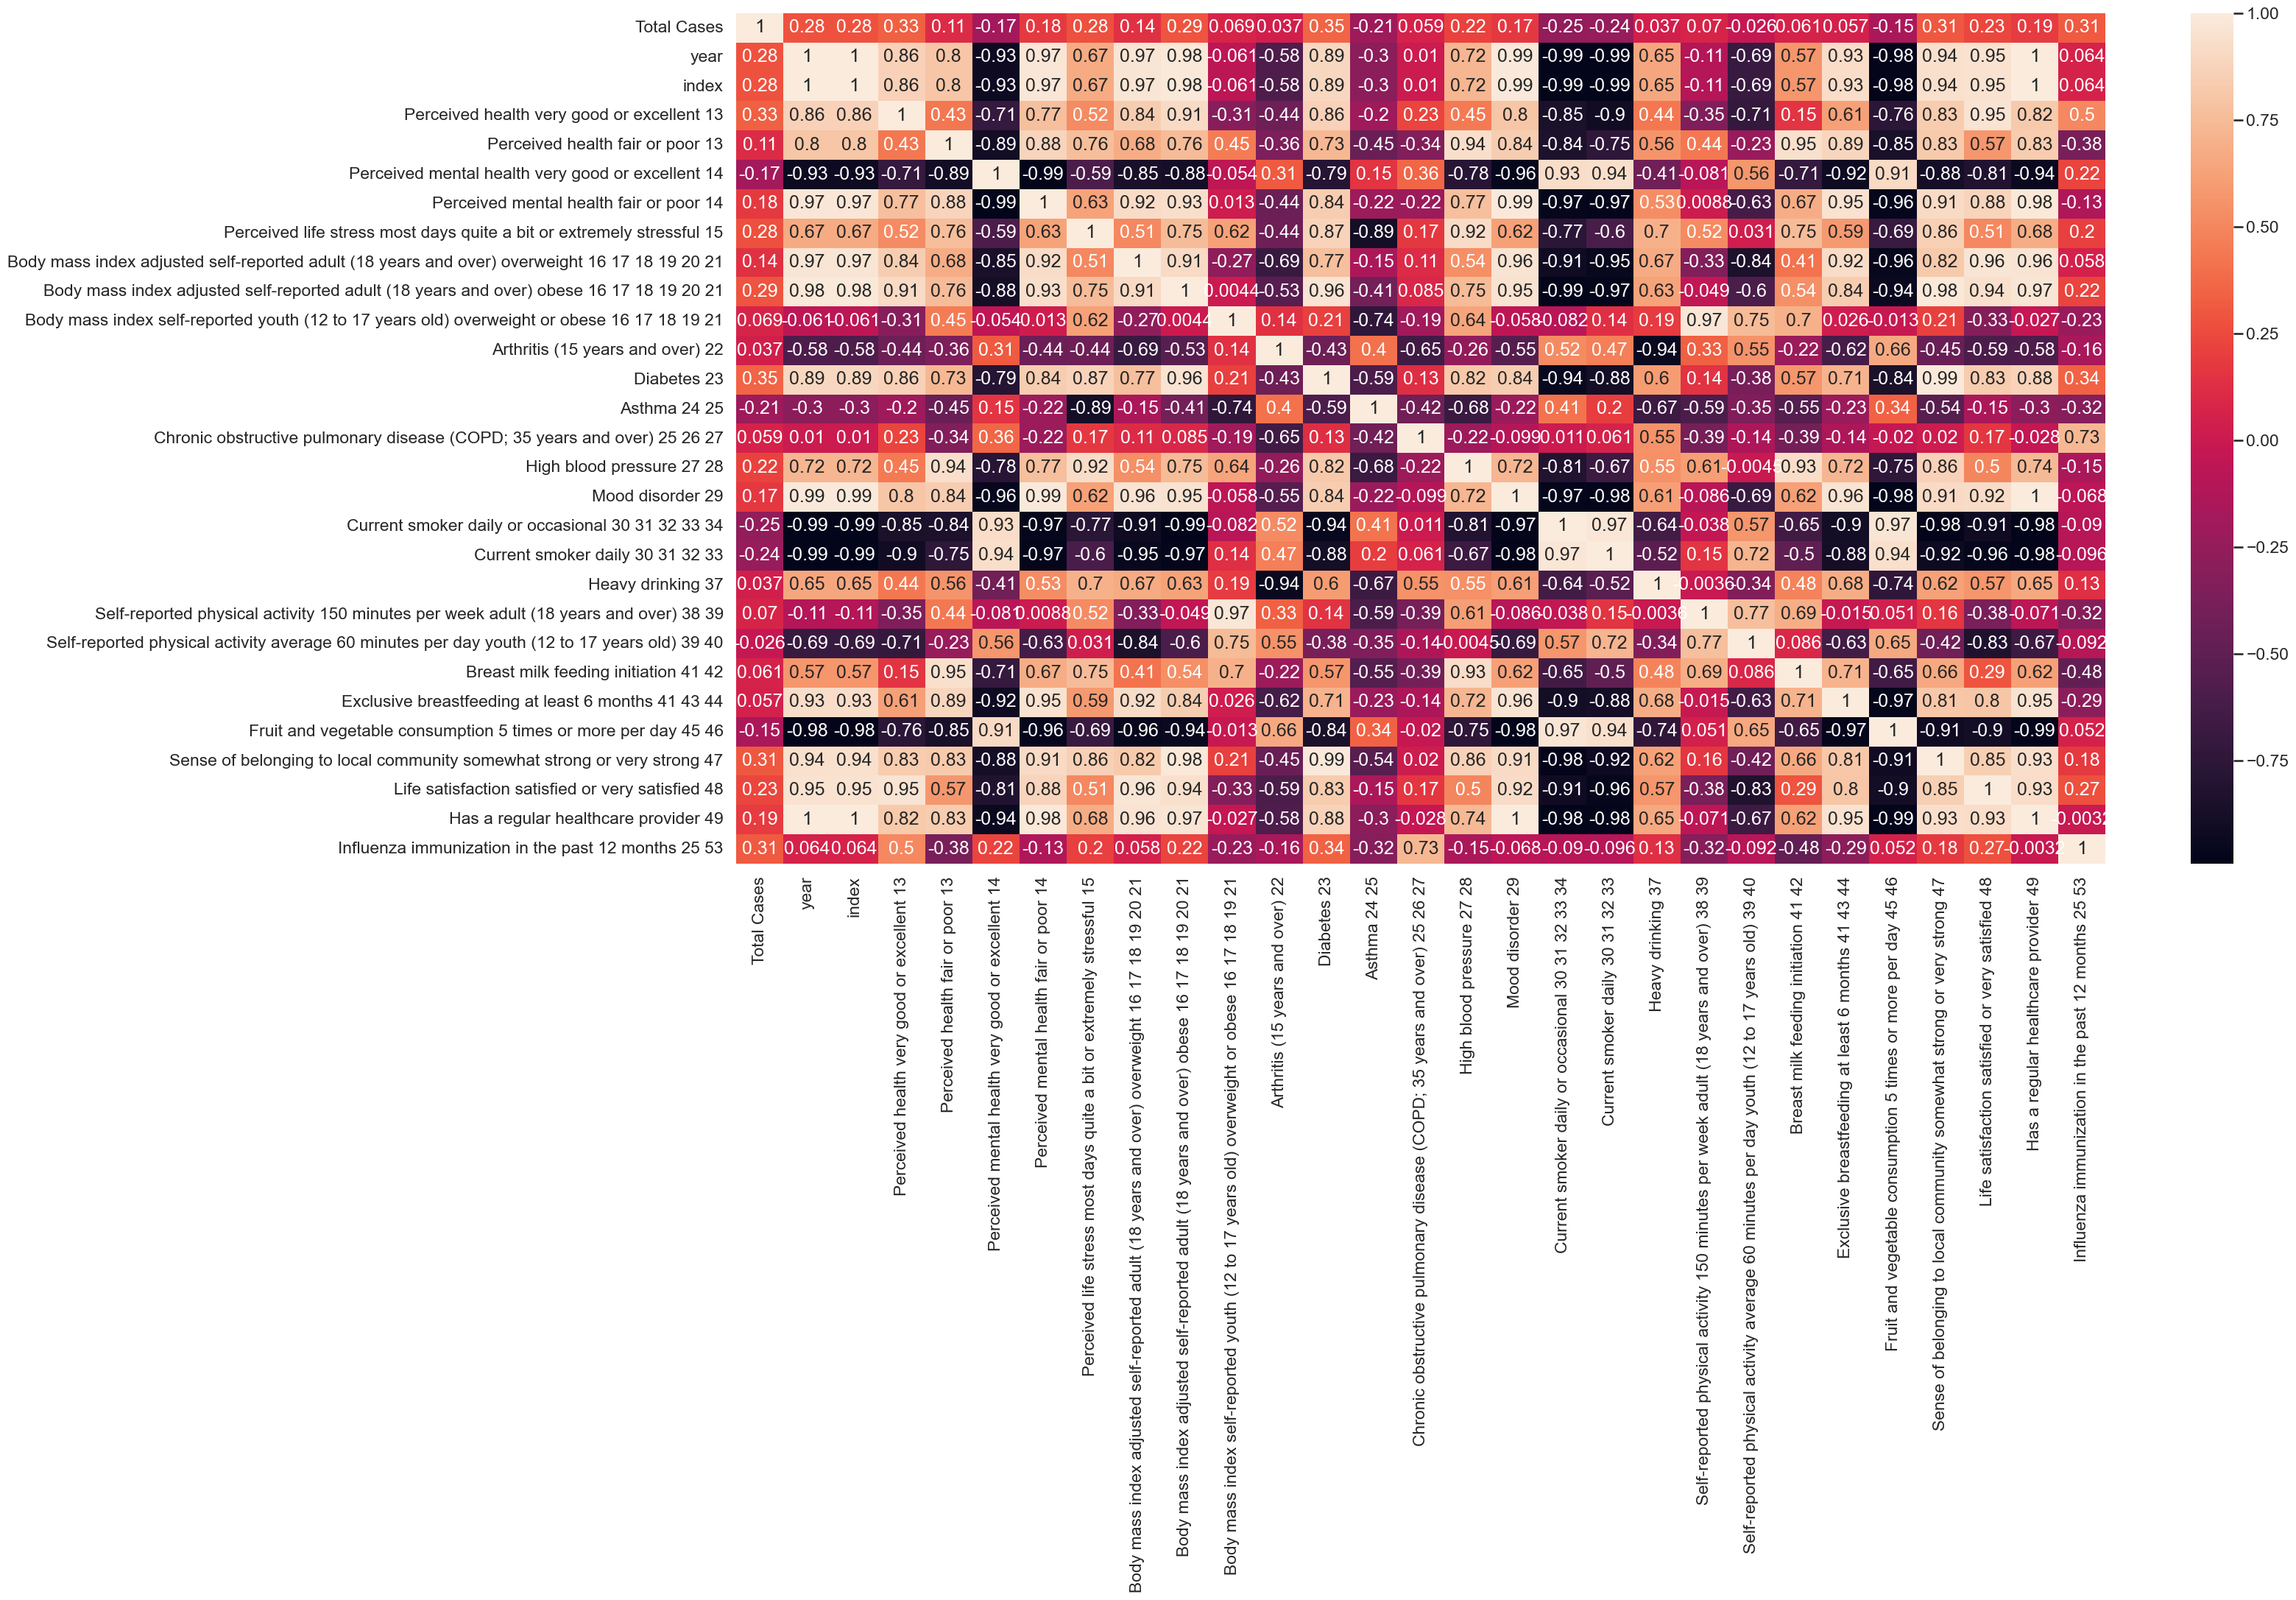

In [24]:
# examine relationship between health indicators and total flu cases

corr_matrix = df_health_indicators_pre_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

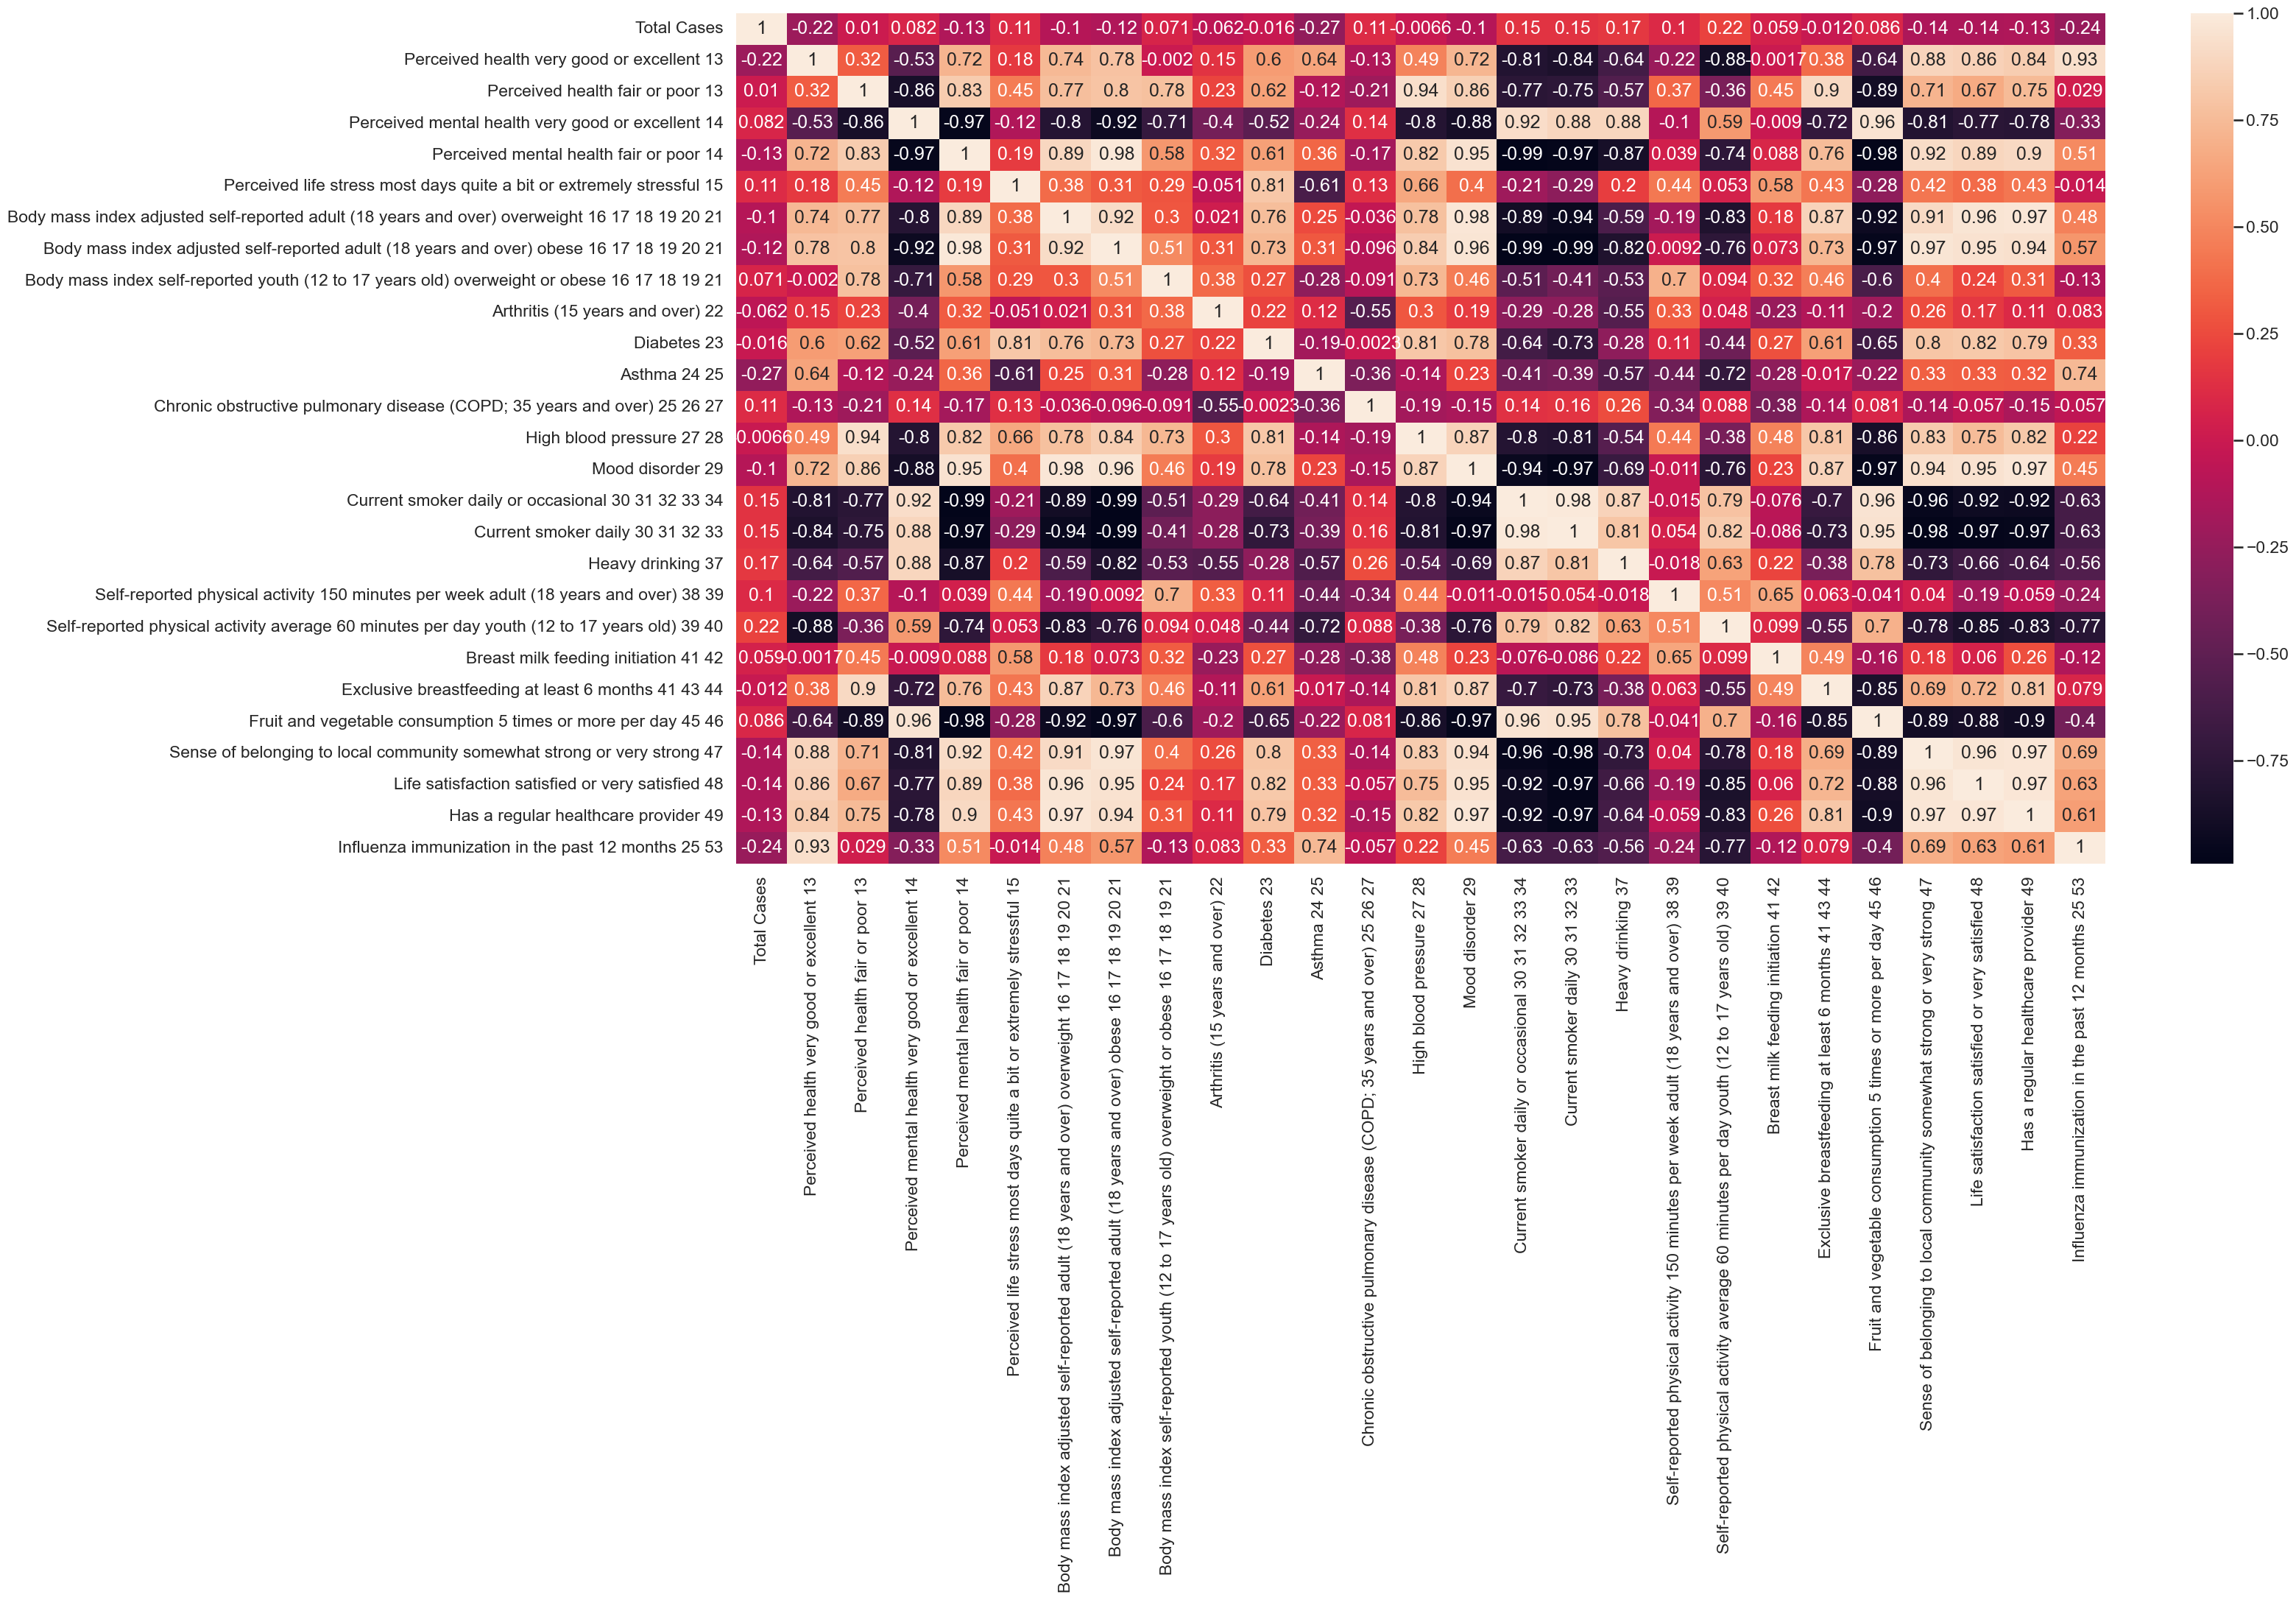

In [26]:
corr_matrix = df_health_indicators.drop(columns=['year','index']).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Air Traffic (Monthly, 2017-2022)

In [3]:
df_travel = pd.read_csv(r'..\data\mobility\air_traffic_2017_2022.csv', skiprows=9)

In [4]:
df_travel.head()

Activity indicators  \
0                                                NaN   
1  International passengers, number of Canadian a...   
2  International passengers, number of Canadian a...   
3  International freight, number of commercial ve...   
4                                                NaN   

                   January 2017 February 2017 March 2017 April 2017 May 2017  \
0                        Number           NaN        NaN        NaN      NaN   
1                         4,215         3,886      4,831      5,224    5,391   
2                         1,675         1,460      1,740      1,636    1,525   
3                           434           413        480        434      496   
4  Twenty feet equivalent units           NaN        NaN        NaN      NaN   

  June 2017 July 2017 August 2017 September 2017  ... November 2021  \
0       NaN       NaN         NaN            NaN  ...           NaN   
1     6,173     7,809       7,970          6,096  ...         1,225   
2     1,594     1,887       2,026          1,663  ...           488   
3       501       438         504            467  ...           454   
4       NaN       NaN         NaN            NaN  ...           NaN   

  December 2021 January 2022 February 2022 March 2022 April 2022 May 2022  \
0           NaN          NaN           NaN        NaN        NaN      NaN   
1         1,669          909         1,001      1,803      2,842    3,321   
2           715          543           491        834        950      968   
3           438          399           387        495        459      463   
4           NaN          NaN           NaN        NaN        NaN      NaN   

  June 2022 July 2022 August 2022  
0       NaN       NaN         NaN  
1     3,711     4,784       4,950  
2     1,036     1,342       1,299  
3       476       433         468  
4       NaN       NaN         NaN  

[5 rows x 69 columns]

In [5]:
# seems to be 8 categories with non-nulls, will remove all the nulls

df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 69 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Activity indicators  21 non-null     object
 1   January 2017         21 non-null     object
 2   February 2017        8 non-null      object
 3   March 2017           8 non-null      object
 4   April 2017           8 non-null      object
 5   May 2017             8 non-null      object
 6   June 2017            8 non-null      object
 7   July 2017            8 non-null      object
 8   August 2017          8 non-null      object
 9   September 2017       8 non-null      object
 10  October 2017         8 non-null      object
 11  November 2017        8 non-null      object
 12  December 2017        8 non-null      object
 13  January 2018         8 non-null      object
 14  February 2018        8 non-null      object
 15  March 2018           8 non-null      object
 16  April 2018

In [6]:
# Drop nulls because they are only showing on the rows without data
df_travel.dropna(inplace=True)
df_travel = df_travel.reset_index(drop=True)

# Null values in the data are represented with '..'
df_travel = df_travel.replace('..', np.nan)

In [7]:
df_travel.T.isnull().sum()

0    0
1    0
2    0
3    2
4    0
5    0
6    0
7    9
dtype: int64

In [8]:
df_travel['Activity indicators']

0    International passengers, number of Canadian a...
1    International passengers, number of Canadian a...
2    International freight, number of commercial ve...
3    International freight, total twenty-foot equiv...
4    Merchandise trade, total export of goods 5  (x...
5    Merchandise trade, total import of goods 6  (x...
6    Domestic and international passengers, air 7  ...
7    Domestic and international passengers, rail (V...
Name: Activity indicators, dtype: object

In [9]:
# remove all rows except the domestic and international air passengers

df_travel = df_travel.iloc[[0,1,6],:].reset_index(drop=True)

In [10]:
# 3 indicators, 69 months

df_travel.shape

(3, 69)

In [11]:
# check for null values

df_travel.T.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [12]:
# convert values to numeric values

df_travel = df_travel.replace(',','', regex=True)
df_travel = df_travel.set_index('Activity indicators')
df_travel = df_travel.apply(pd.to_numeric)

In [13]:
df_travel = df_travel.T
# df_travel = df_travel.set_index('Activity indicators')
df_travel.index = pd.to_datetime(df_travel.index)
df_travel

Activity indicators  International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)  \
2017-01-01                                                        4215                                                                  
2017-02-01                                                        3886                                                                  
2017-03-01                                                        4831                                                                  
2017-04-01                                                        5224                                                                  
2017-05-01                                                        5391                                                                  
...                                                                ...                                                                  
2022-04-01                                                        2842                                                                  
2022-05-01                                                        3321                                                                  
2022-06-01                                                        3711                                                                  
2022-07-01                                                        4784                                                                  
2022-08-01                                                        4950                                                                  

Activity indicators  International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)  \
2017-01-01                                                        1675                                                                 
2017-02-01                                                        1460                                                                 
2017-03-01                                                        1740                                                                 
2017-04-01                                                        1636                                                                 
2017-05-01                                                        1525                                                                 
...                                                                ...                                                                 
2022-04-01                                                         950                                                                 
2022-05-01                                                         968                                                                 
2022-06-01                                                        1036                                                                 
2022-07-01                                                        1342                                                                 
2022-08-01                                                        1299                                                                 

Activity indicators  Domestic and international passengers air 7  (x 1000)  
2017-01-01                                                        5596      
2017-02-01                                                        5365      
2017-03-01                                                        6120      
2017-04-01                                                        5973      
2017-05-01                                                        6076      
...                                                                ...      
2022-04-01                                                        4152      
2022-05-01                                                        4920      
2022-06-01                   

In [14]:
# shift all the values forward one month because we will use previous month's value to predict current months flu cases

df_travel.iloc[:,:] = df_travel.iloc[:,:].shift(1)

In [15]:
# extract month and year from index

years = [x.year for x in df_travel.index]
months = [x.month for x in df_travel.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_travel = df_travel.reset_index(drop=True)
df_travel = pd.concat([dates, df_travel], axis=1).dropna()

In [16]:
df_travel

year  month  \
1   2017      2   
2   2017      3   
3   2017      4   
4   2017      5   
5   2017      6   
..   ...    ...   
63  2022      4   
64  2022      5   
65  2022      6   
66  2022      7   
67  2022      8   

    International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)  \
1                                              4215.0                                                                  
2                                              3886.0                                                                  
3                                              4831.0                                                                  
4                                              5224.0                                                                  
5                                              5391.0                                                                  
..                                                ...                                                                  
63                                             1803.0                                                                  
64                                             2842.0                                                                  
65                                             3321.0                                                                  
66                                             3711.0                                                                  
67                                             4784.0                                                                  

    International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)  \
1                                              1675.0                                                                 
2                                              1460.0                                                                 
3                                              1740.0                                                                 
4                                              1636.0                                                                 
5                                              1525.0                                                                 
..                                                ...                                                                 
63                                              834.0                                                                 
64                                              950.0                                                                 
65                                              968.0                                                                 
66                                             1036.0                                                                 
67                                             1342.0                                                                 

    Domestic and international passengers air 7  (x 1000)  
1                                              5596.0      
2                                              5365.0      
3                                              6120.0      
4                                              5973.0      
5                                              6076.0      
..                                                ...      
63                                             3700.0      
64                                             4152.0      
65                                             4920.0      
66                                             5677.0      
67                                             6109.0      

[67 rows x 5 columns]

In [17]:
# merge travel indicators with df_flu

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

years = [x.year for x in df_flu.index]
months = [x.month for x in df_flu.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu = df_flu.reset_index(drop=True)
df_flu = pd.concat([dates, df_flu], axis=1)

df_air_travel = pd.merge(df_flu, df_travel, how='left', on=['year','month'])

# df_air_travel = df_air_travel.drop(columns=['year','month']).dropna()

In [18]:
df_air_travel

year  month  Total Cases  \
0    2015      9          9.0   
1    2015      9         18.0   
2    2015      9         15.0   
3    2015      9         29.0   
4    2015     10         59.0   
..    ...    ...          ...   
374  2022     11       2407.0   
375  2022     11       4144.0   
376  2022     11       5460.0   
377  2022     11       7773.0   
378  2022     12          NaN   

     International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)  \
0                                                  NaN                                                                  
1                                                  NaN                                                                  
2                                                  NaN                                                                  
3                                                  NaN                                                                  
4                                                  NaN                                                                  
..                                                 ...                                                                  
374                                                NaN                                                                  
375                                                NaN                                                                  
376                                                NaN                                                                  
377                                                NaN                                                                  
378                                                NaN                                                                  

     International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)  \
0                                                  NaN                                                                 
1                                                  NaN                                                                 
2                                                  NaN                                                                 
3                                                  NaN                                                                 
4                                                  NaN                                                                 
..                                                 ...                                                                 
374                                                NaN                                                                 
375                                                NaN                                                                 
376                                                NaN                                                                 
377                                                NaN                                                                 
378                                                NaN                                                                 

     Domestic and international passengers air 7  (x 1000)  
0                                                  NaN      
1                                                  NaN      
2                                                  NaN      
3                                                  NaN      
4                                                  NaN      
..                                                 ...      
374                                                NaN      
375                                                NaN      
376                                                NaN      
377                                                NaN      
378                                        

In [19]:
# merge health indicators from 2015 - March 2020 to create df_travel_pre_COVID

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_pre_COVID.index]
months = [x.month for x in df_flu_pre_COVID.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
df_flu_pre_COVID = pd.concat([dates, df_flu_pre_COVID], axis=1)

df_air_travel_pre_COVID = pd.merge(df_flu_pre_COVID, df_travel, how='left', on=['year','month'])

# df_air_travel_pre_COVID = df_air_travel_pre_COVID.drop(columns=['year','month']).dropna()

In [20]:
df_air_travel_pre_COVID

year  month  Total Cases  \
0    2015      9          9.0   
1    2015      9         18.0   
2    2015      9         15.0   
3    2015      9         29.0   
4    2015     10         59.0   
..    ...    ...          ...   
230  2020      2       4789.0   
231  2020      2       4654.0   
232  2020      2       3989.0   
233  2020      2       3656.0   
234  2020      2       3576.0   

     International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)  \
0                                                  NaN                                                                  
1                                                  NaN                                                                  
2                                                  NaN                                                                  
3                                                  NaN                                                                  
4                                                  NaN                                                                  
..                                                 ...                                                                  
230                                             4272.0                                                                  
231                                             4272.0                                                                  
232                                             4272.0                                                                  
233                                             4272.0                                                                  
234                                             4272.0                                                                  

     International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)  \
0                                                  NaN                                                                 
1                                                  NaN                                                                 
2                                                  NaN                                                                 
3                                                  NaN                                                                 
4                                                  NaN                                                                 
..                                                 ...                                                                 
230                                             1727.0                                                                 
231                                             1727.0                                                                 
232                                             1727.0                                                                 
233                                             1727.0                                                                 
234                                             1727.0                                                                 

     Domestic and international passengers air 7  (x 1000)  
0                                                  NaN      
1                                                  NaN      
2                                                  NaN      
3                                                  NaN      
4                                                  NaN      
..                                                 ...      
230                                             6131.0      
231                                             6131.0      
232                                             6131.0      
233                                             6131.0      
234                                        

In [21]:
# merge health indicators from March 2020 to present to create df_health_indicators_COVID

df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_COVID.index]
months = [x.month for x in df_flu_COVID.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu_COVID = df_flu_COVID.reset_index(drop=True)
df_flu_COVID = pd.concat([dates, df_flu_COVID], axis=1)

df_air_travel_COVID = pd.merge(df_flu_COVID, df_travel, how='left', on=['year','month'])

# df_air_travel_COVID = df_air_travel_COVID.drop(columns=['year','month']).dropna()

In [22]:
df_air_travel_COVID

year  month  Total Cases  \
0    2020      3       3404.0   
1    2020      3       2991.0   
2    2020      3       1619.0   
3    2020      3        512.0   
4    2020      4        161.0   
..    ...    ...          ...   
137  2022     10        438.0   
138  2022     10       1031.0   
139  2022     11       2407.0   
140  2022     11       4144.0   
141  2022     11       5460.0   

     International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)  \
0                                               4354.0                                                                  
1                                               4354.0                                                                  
2                                               4354.0                                                                  
3                                               4354.0                                                                  
4                                               2848.0                                                                  
..                                                 ...                                                                  
137                                                NaN                                                                  
138                                                NaN                                                                  
139                                                NaN                                                                  
140                                                NaN                                                                  
141                                                NaN                                                                  

     International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)  \
0                                               1531.0                                                                 
1                                               1531.0                                                                 
2                                               1531.0                                                                 
3                                               1531.0                                                                 
4                                               1170.0                                                                 
..                                                 ...                                                                 
137                                                NaN                                                                 
138                                                NaN                                                                 
139                                                NaN                                                                 
140                                                NaN                                                                 
141                                                NaN                                                                 

     Domestic and international passengers air 7  (x 1000)  
0                                               5862.0      
1                                               5862.0      
2                                               5862.0      
3                                               5862.0      
4                                               3294.0      
..                                                 ...      
137                                                NaN      
138                                                NaN      
139                                                NaN      
140                                                NaN      
141                                        

In [23]:
# store dataframes as pickles

# pickle.dump(df_air_travel, open(r"..\data\mobility\df_air_travel.pkl", "wb" ))
# pickle.dump(df_air_travel_pre_COVID, open(r"..\data\mobility\df_air_travel_pre_COVID.pkl", "wb" ))
# pickle.dump(df_air_travel_COVID, open(r"..\data\mobility\df_air_travel_COVID.pkl", "wb" ))

In [24]:
df_air_travel = df_air_travel.drop(columns=['year','month'])

In [25]:
df_air_travel.rename(columns={'International passengers number of Canadian and U.S. travellers between Canada and the United States 1 (x 1000)':'Passengers between Canada & US (x1000)',
                                'International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2 (x 1000)':'Passengers between Canada & Overseas (x1000)',
                                'Domestic and international passengers air 7 (x 1000)':'All Passengers (x1000)'}, inplace=True)

In [27]:
df_air_travel.columns

Index(['Total Cases',
       'International passengers number of Canadian and U.S. travellers between Canada and the United States 1  (x 1000)',
       'International passengers number of Canadian and non-U.S. travellers overseas all modes of transport 2  (x 1000)',
       'Domestic and international passengers air 7  (x 1000)'],
      dtype='object')

(0.0, 12000.0)

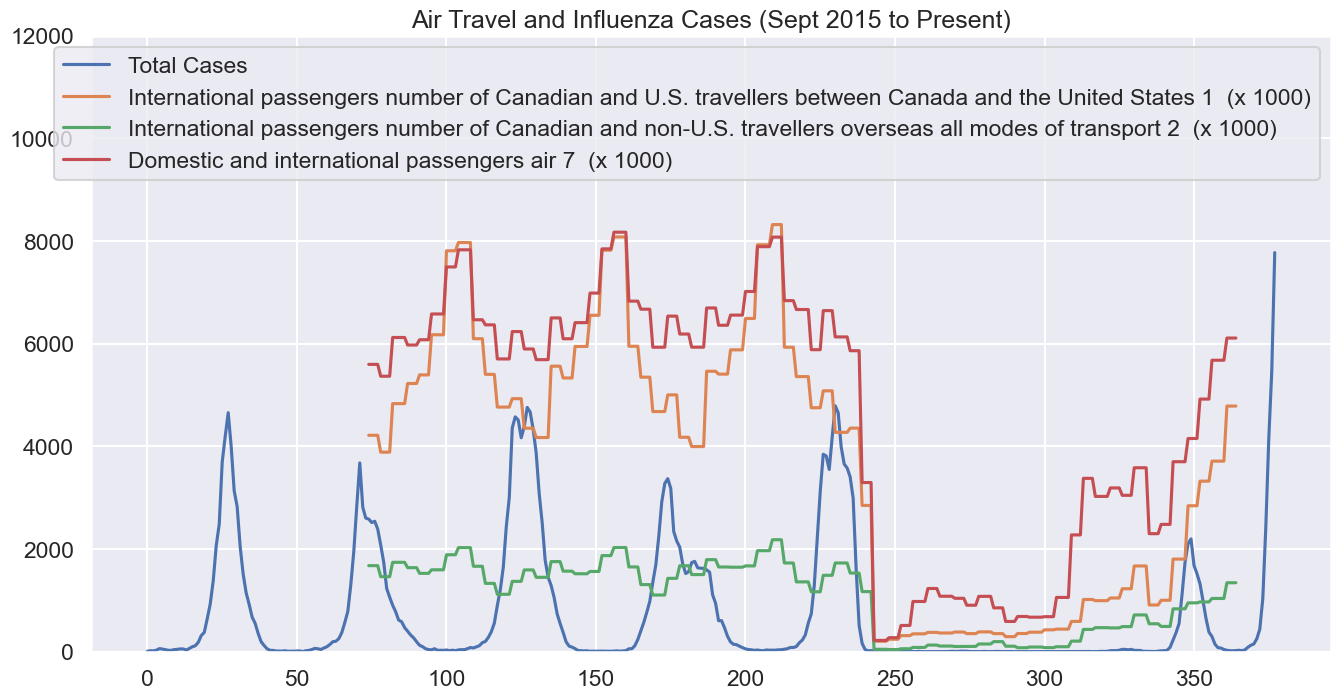

In [36]:
df_air_travel.plot()
plt.title('Air Travel and Influenza Cases (Sept 2015 to Present)')
plt.ylim(0,12000)

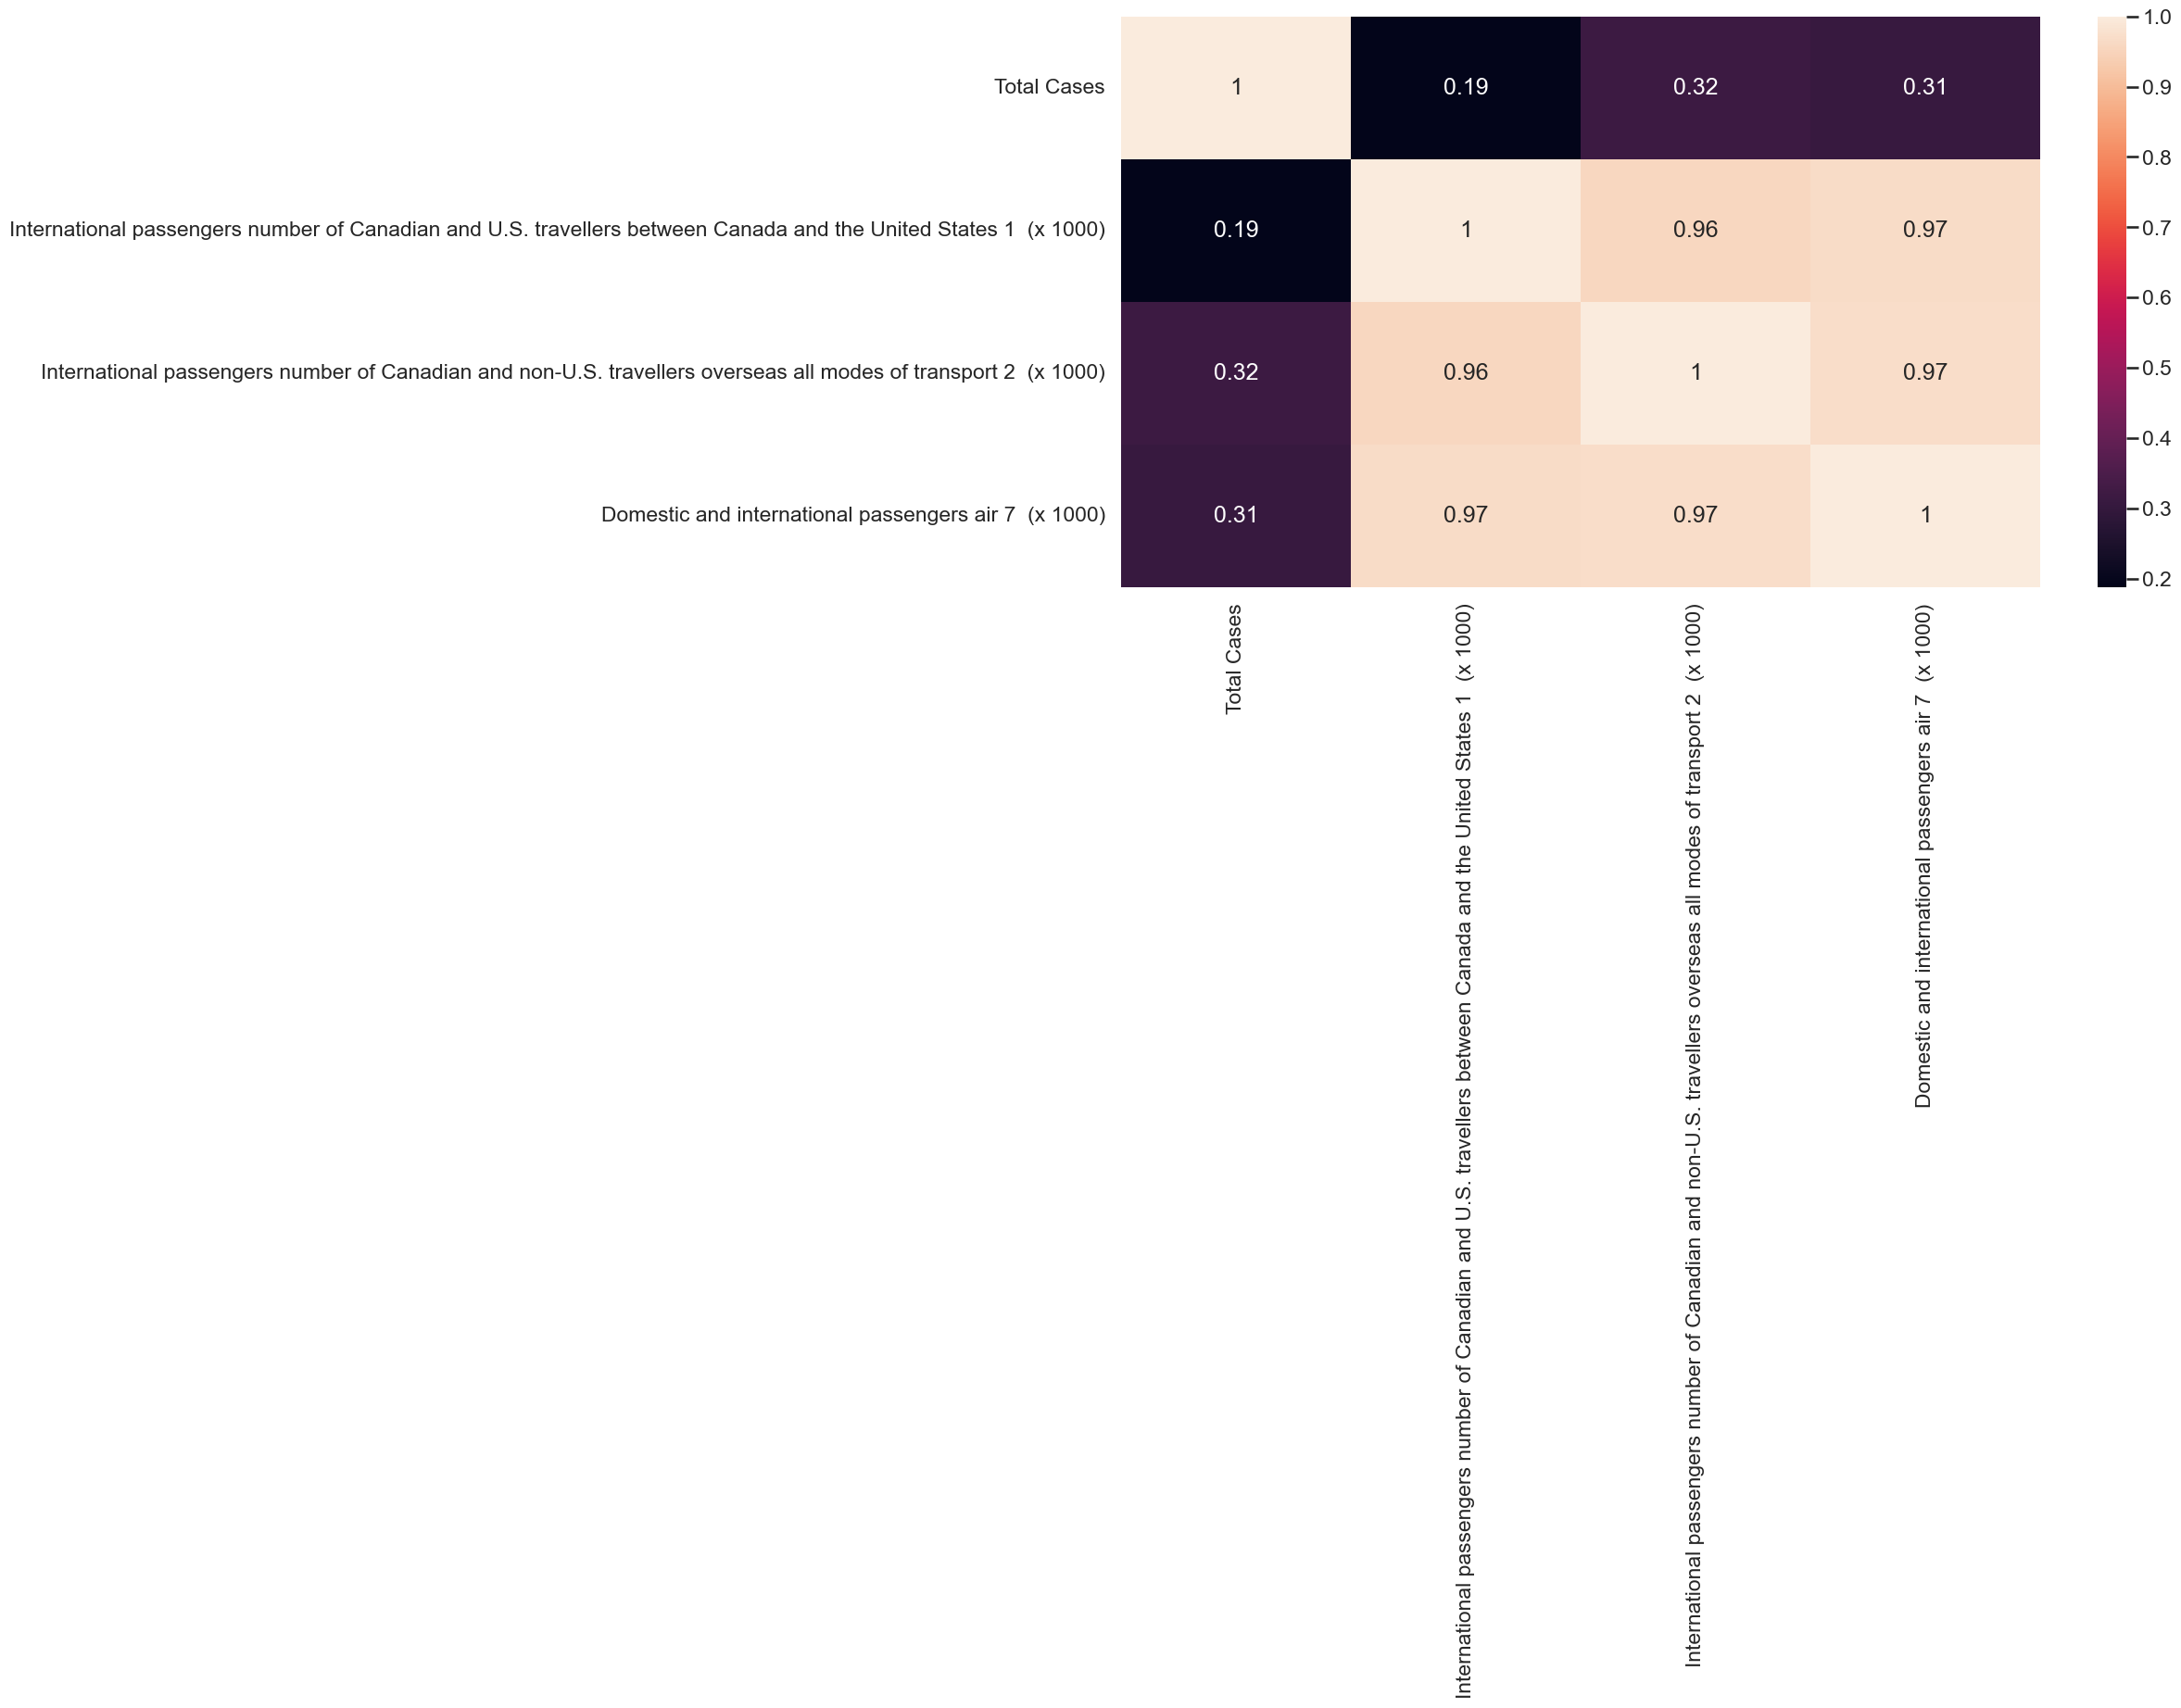

In [39]:
# examine relationship between health indicators and total flu cases

corr_matrix = df_air_travel.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [41]:
df_air_travel_pre_COVID.drop(columns=['year','month'], inplace=True)

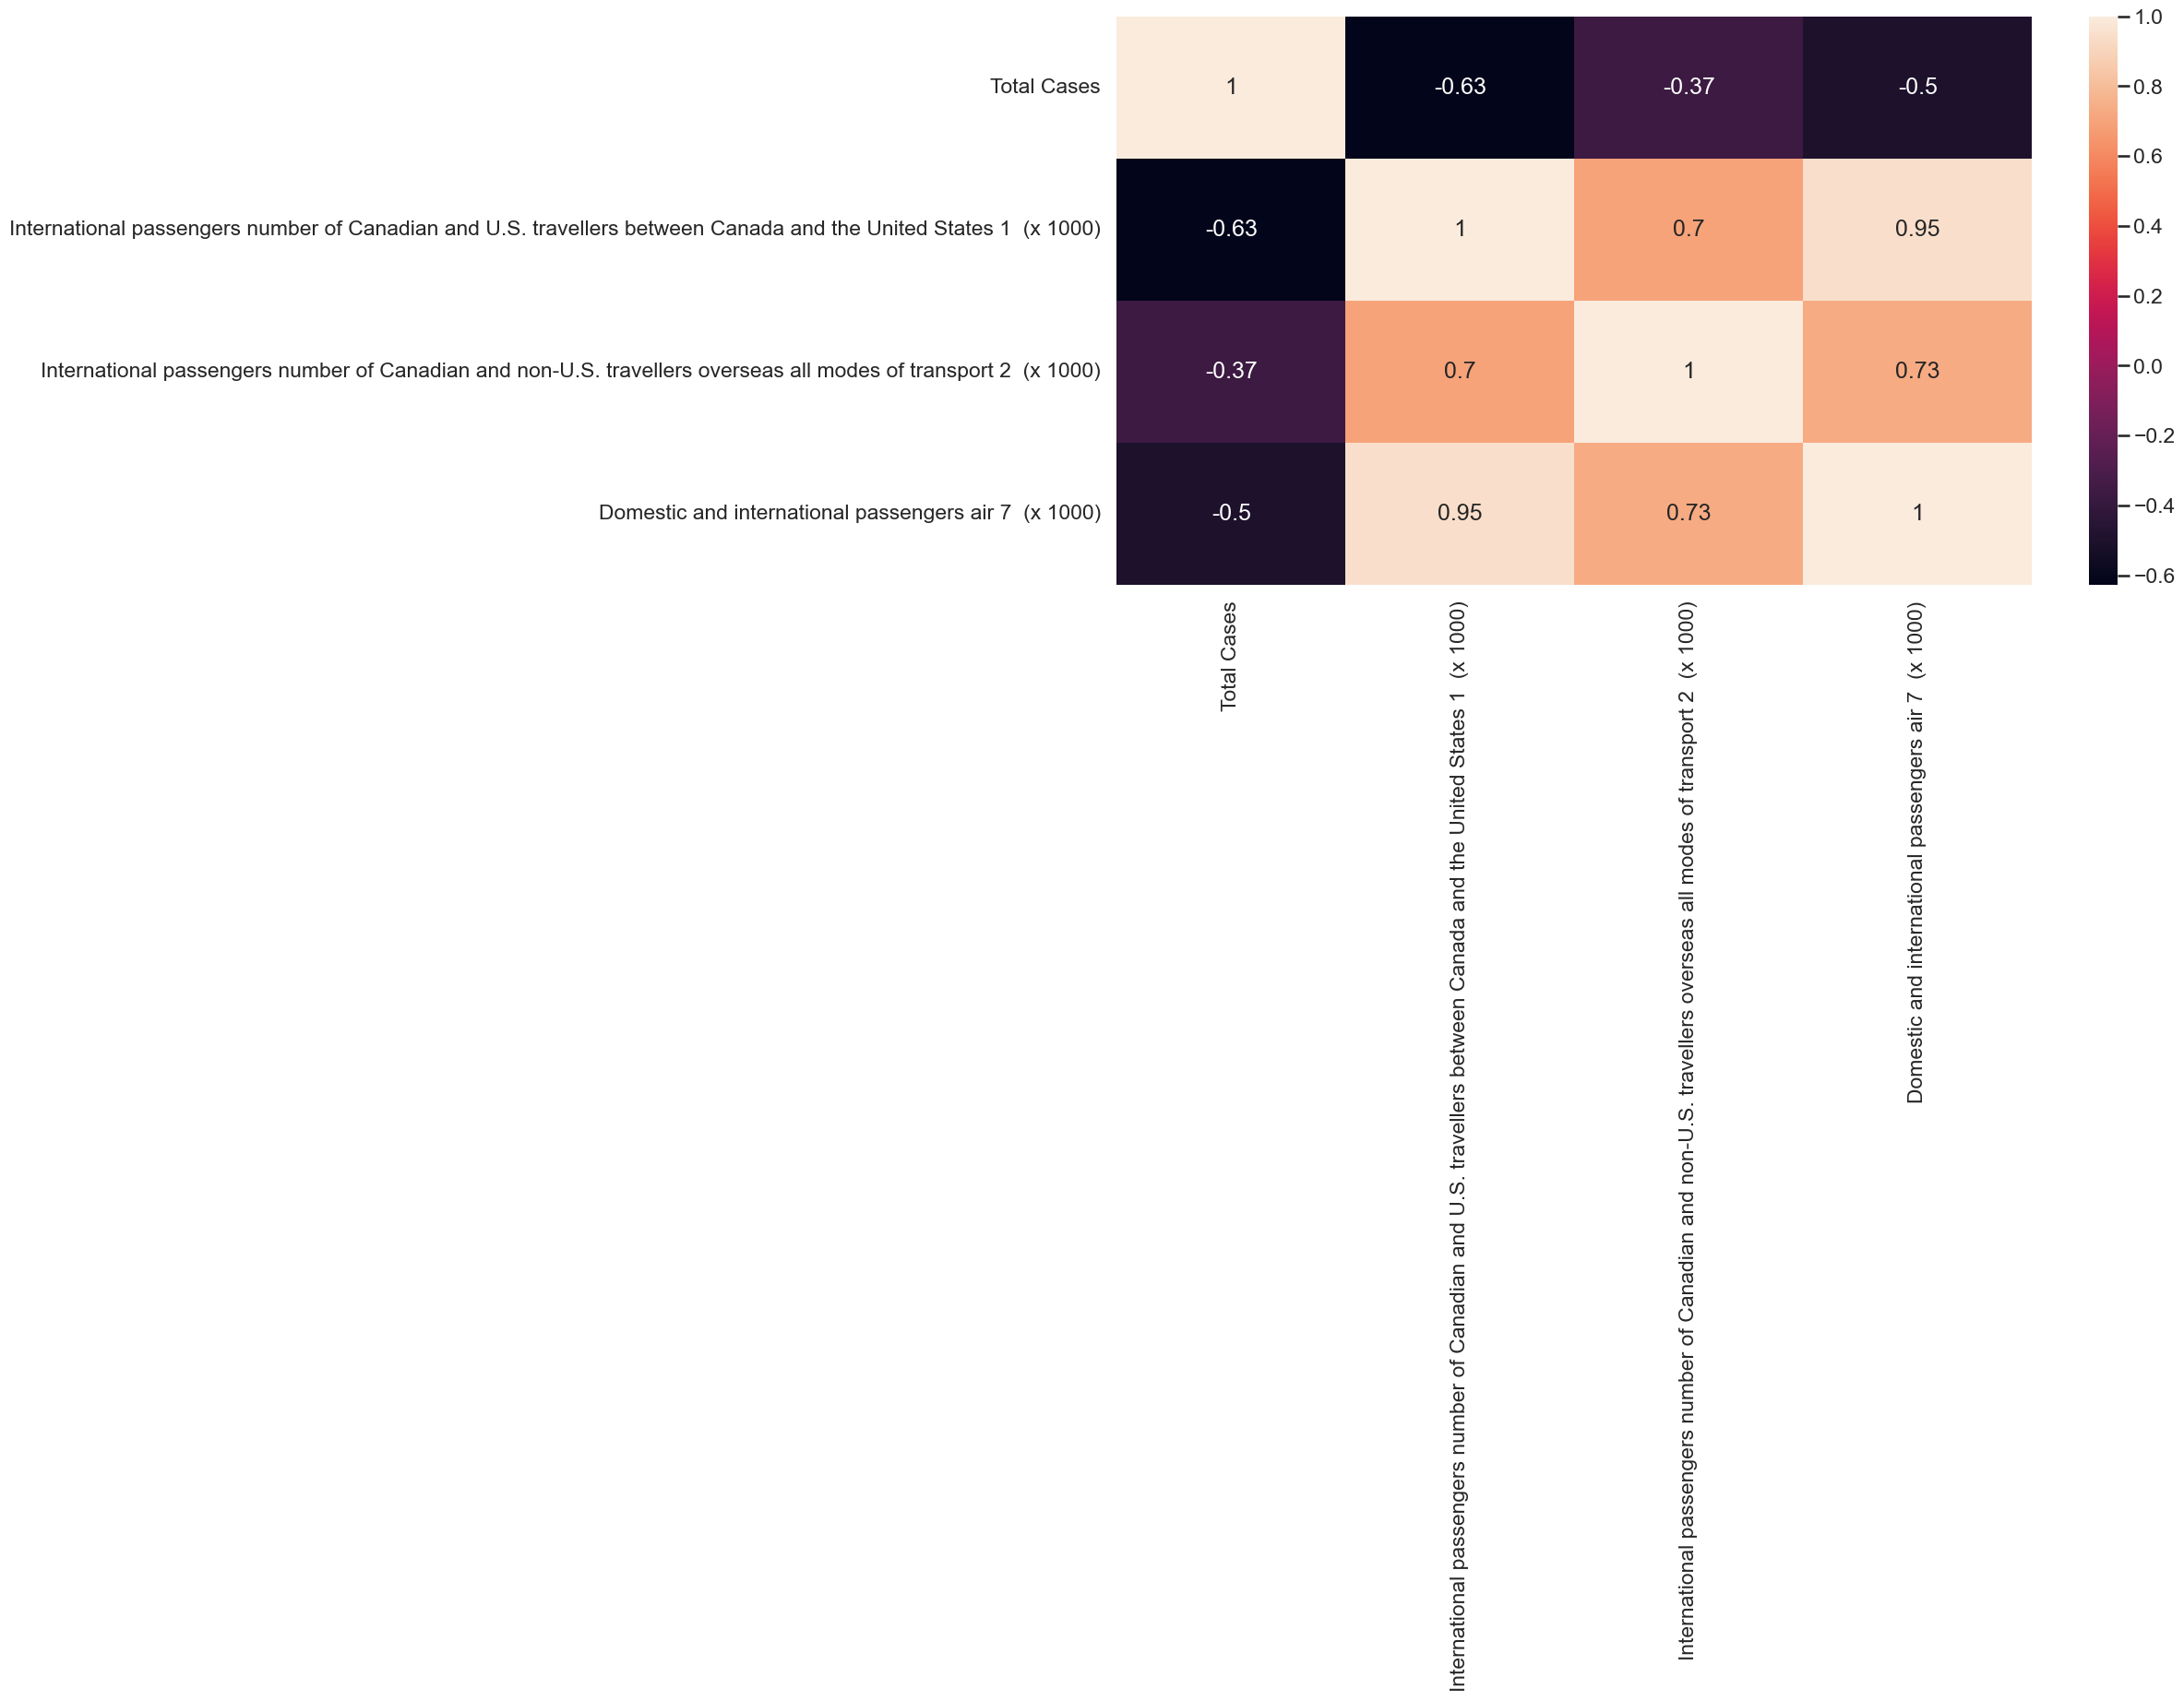

In [42]:
corr_matrix = df_air_travel_pre_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df_air_travel

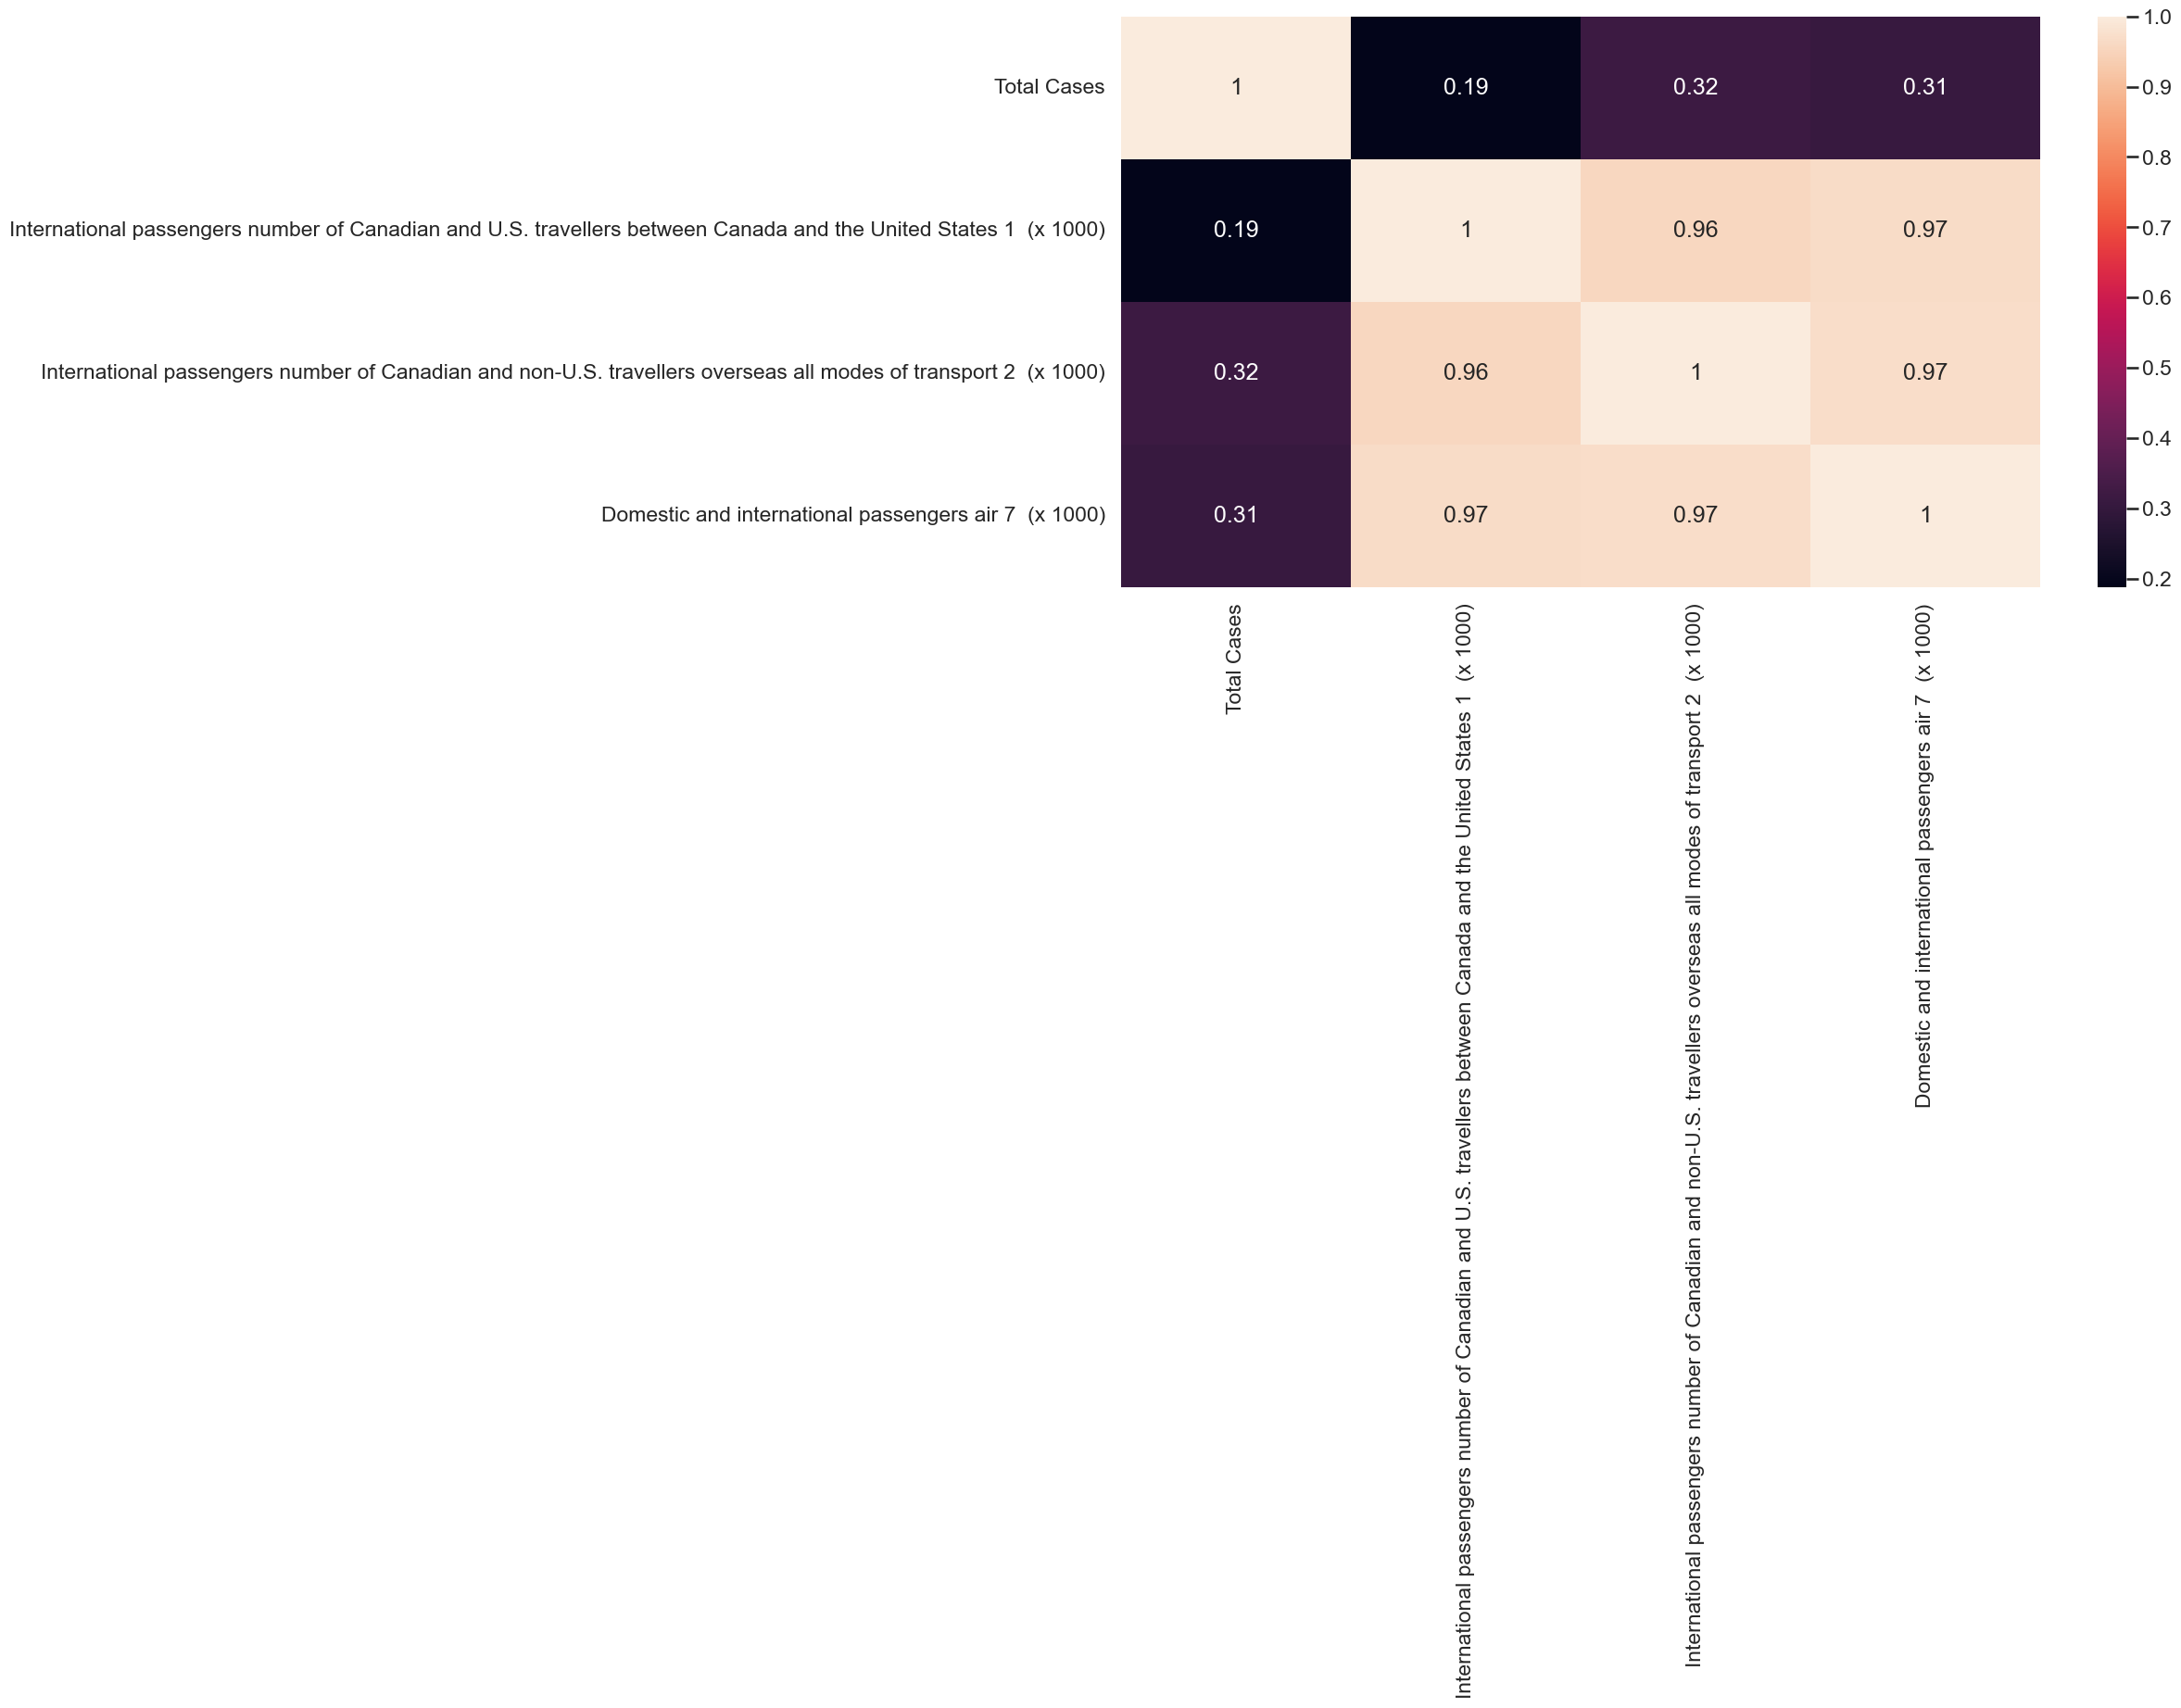

In [40]:
corr_matrix = df_air_travel.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Urban Transit (Monthly, 2017-2022)

In [43]:
df_transit = pd.read_csv(r'..\data\mobility\urban_transit_2017_2022.csv', skiprows=9)

In [44]:
df_transit.head()

Geography Total revenue and total passenger trips January 2017  \
0    Canada                                     NaN      Dollars   
1       NaN      Total revenue, excluding subsidies        302.6   
2       NaN                                     NaN       Number   
3       NaN                   Total passenger trips        144.2   
4  Atlantic                                     NaN      Dollars   

  February 2017 March 2017 April 2017 May 2017 June 2017 July 2017  \
0           NaN        NaN        NaN      NaN       NaN       NaN   
1         314.5      350.1      309.6    307.6     340.4     307.3   
2           NaN        NaN        NaN      NaN       NaN       NaN   
3         143.6      166.2      144.4    144.5     153.1     135.6   
4           NaN        NaN        NaN      NaN       NaN       NaN   

  August 2017  ... December 2021 January 2022 February 2022 March 2022  \
0         NaN  ...           NaN          NaN           NaN        NaN   
1       303.5  ...         177.7        164.7         178.7      199.7   
2         NaN  ...           NaN          NaN           NaN        NaN   
3       132.2  ...          82.4         66.4          77.1       90.2   
4         NaN  ...           NaN          NaN           NaN        NaN   

   April 2022  May 2022  June 2022  July 2022  August 2022  September 2022  
0         NaN       NaN        NaN        NaN          NaN             NaN  
1       214.9     222.5      232.7      234.5        236.6           273.0  
2         NaN       NaN        NaN        NaN          NaN             NaN  
3        92.1      96.2       96.9       94.5         96.7           120.6  
4         NaN       NaN        NaN        NaN          NaN             NaN  

[5 rows x 71 columns]

In [45]:
# only interested in number of passenger trips, canada-wide

df_transit = df_transit.iloc[3,:].to_frame()

In [46]:
df_transit

3
Geography                                                  NaN
Total revenue and total passenger trips  Total passenger trips
January 2017                                             144.2
February 2017                                            143.6
March 2017                                               166.2
...                                                        ...
May 2022                                                  96.2
June 2022                                                 96.9
July 2022                                                 94.5
August 2022                                               96.7
September 2022                                           120.6

[71 rows x 1 columns]

In [47]:
df_transit = df_transit.iloc[3:,:].reset_index()
df_transit.columns =['Date','Passenger Trips x 1,000,000']
df_transit

Date Passenger Trips x 1,000,000
0    February 2017                       143.6
1       March 2017                       166.2
2       April 2017                       144.4
3         May 2017                       144.5
4        June 2017                       153.1
..             ...                         ...
63        May 2022                        96.2
64       June 2022                        96.9
65       July 2022                        94.5
66     August 2022                        96.7
67  September 2022                       120.6

[68 rows x 2 columns]

In [48]:
# Null values in the data are represented with '..'
df_transit = df_transit.replace('..', np.nan)

In [49]:
# check for nulls

df_transit.isnull().sum()

Date                           0
Passenger Trips x 1,000,000    0
dtype: int64

In [50]:
# 3 indicators, 69 months

df_transit.shape

(68, 2)

In [51]:
df_transit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         68 non-null     object
 1   Passenger Trips x 1,000,000  68 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [52]:
# convert values to numeric values

df_transit = df_transit.set_index('Date')
df_transit = df_transit.apply(pd.to_numeric)

In [53]:
df_transit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, February 2017 to September 2022
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Passenger Trips x 1,000,000  68 non-null     float64
dtypes: float64(1)
memory usage: 1.1+ KB


In [54]:
df_transit

Passenger Trips x 1,000,000
Date                                       
February 2017                         143.6
March 2017                            166.2
April 2017                            144.4
May 2017                              144.5
June 2017                             153.1
...                                     ...
May 2022                               96.2
June 2022                              96.9
July 2022                              94.5
August 2022                            96.7
September 2022                        120.6

[68 rows x 1 columns]

In [55]:
df_transit.index = pd.to_datetime(df_transit.index)
df_transit

Passenger Trips x 1,000,000
Date                                   
2017-02-01                        143.6
2017-03-01                        166.2
2017-04-01                        144.4
2017-05-01                        144.5
2017-06-01                        153.1
...                                 ...
2022-05-01                         96.2
2022-06-01                         96.9
2022-07-01                         94.5
2022-08-01                         96.7
2022-09-01                        120.6

[68 rows x 1 columns]

In [56]:
# shift all the values forward one month because we will use previous month's value to predict current months flu cases

df_transit.iloc[:,:] = df_transit.iloc[:,:].shift(1)

In [57]:
df_transit

Passenger Trips x 1,000,000
Date                                   
2017-02-01                          NaN
2017-03-01                        143.6
2017-04-01                        166.2
2017-05-01                        144.4
2017-06-01                        144.5
...                                 ...
2022-05-01                         92.1
2022-06-01                         96.2
2022-07-01                         96.9
2022-08-01                         94.5
2022-09-01                         96.7

[68 rows x 1 columns]

In [58]:
# extract month and year from index

years = [x.year for x in df_transit.index]
months = [x.month for x in df_transit.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_transit = df_transit.reset_index(drop=True)
df_transit = pd.concat([dates, df_transit], axis=1).dropna()

In [59]:
df_transit

year  month  Passenger Trips x 1,000,000
1   2017      3                        143.6
2   2017      4                        166.2
3   2017      5                        144.4
4   2017      6                        144.5
5   2017      7                        153.1
..   ...    ...                          ...
63  2022      5                         92.1
64  2022      6                         96.2
65  2022      7                         96.9
66  2022      8                         94.5
67  2022      9                         96.7

[67 rows x 3 columns]

In [60]:
# merge travel indicators with df_flu

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

years = [x.year for x in df_flu.index]
months = [x.month for x in df_flu.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu = df_flu.reset_index(drop=True)
df_flu = pd.concat([dates, df_flu], axis=1)

df_urban_transit = pd.merge(df_flu, df_transit, how='left', on=['year','month'])

# df_urban_transit = df_urban_transit.drop(columns=['year','month']).dropna()

In [61]:
df_urban_transit

year  month  Total Cases  Passenger Trips x 1,000,000
0    2015      9          9.0                          NaN
1    2015      9         18.0                          NaN
2    2015      9         15.0                          NaN
3    2015      9         29.0                          NaN
4    2015     10         59.0                          NaN
..    ...    ...          ...                          ...
374  2022     11       2407.0                          NaN
375  2022     11       4144.0                          NaN
376  2022     11       5460.0                          NaN
377  2022     11       7773.0                          NaN
378  2022     12          NaN                          NaN

[379 rows x 4 columns]

In [62]:
# merge health indicators from 2015 - March 2020 to create df_travel_pre_COVID

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_pre_COVID.index]
months = [x.month for x in df_flu_pre_COVID.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
df_flu_pre_COVID = pd.concat([dates, df_flu_pre_COVID], axis=1)

df_urban_transit_pre_COVID = pd.merge(df_flu_pre_COVID, df_transit, how='left', on=['year','month'])

# df_urban_transit_pre_COVID = df_urban_transit_pre_COVID.drop(columns=['year','month']).dropna()

In [63]:
df_urban_transit_pre_COVID

year  month  Total Cases  Passenger Trips x 1,000,000
0    2015      9          9.0                          NaN
1    2015      9         18.0                          NaN
2    2015      9         15.0                          NaN
3    2015      9         29.0                          NaN
4    2015     10         59.0                          NaN
..    ...    ...          ...                          ...
230  2020      2       4789.0                        163.9
231  2020      2       4654.0                        163.9
232  2020      2       3989.0                        163.9
233  2020      2       3656.0                        163.9
234  2020      2       3576.0                        163.9

[235 rows x 4 columns]

In [64]:
# merge health indicators from March 2020 to present to create df_health_indicators_COVID

df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

years = [x.year for x in df_flu_COVID.index]
months = [x.month for x in df_flu_COVID.index]

X = np.array([years, months]).T
dates = pd.DataFrame(X, columns = ['year', 'month'])

df_flu_COVID = df_flu_COVID.reset_index(drop=True)
df_flu_COVID = pd.concat([dates, df_flu_COVID], axis=1)

df_urban_transit_COVID = pd.merge(df_flu_COVID, df_transit, how='left', on=['year','month'])

# df_urban_transit_COVID = df_urban_transit_COVID.drop(columns=['year','month']).dropna()

In [65]:
df_urban_transit_COVID

year  month  Total Cases  Passenger Trips x 1,000,000
0    2020      3       3404.0                        161.2
1    2020      3       2991.0                        161.2
2    2020      3       1619.0                        161.2
3    2020      3        512.0                        161.2
4    2020      4        161.0                         88.5
..    ...    ...          ...                          ...
137  2022     10        438.0                          NaN
138  2022     10       1031.0                          NaN
139  2022     11       2407.0                          NaN
140  2022     11       4144.0                          NaN
141  2022     11       5460.0                          NaN

[142 rows x 4 columns]

In [92]:
# store dataframes as pickles

# pickle.dump(df_urban_transit, open(r"..\data\mobility\df_urban_transit.pkl", "wb" ))
# pickle.dump(df_urban_transit_pre_COVID, open(r"..\data\mobility\df_urban_transit_pre_COVID.pkl", "wb" ))
# pickle.dump(df_urban_transit_COVID, open(r"..\data\mobility\df_urban_transit_COVID.pkl", "wb" ))

In [74]:
df_urban_transit

year  month  Total Cases  Passenger Trips x 1,000,000  \
0    2015      9          9.0                          NaN   
1    2015      9         18.0                          NaN   
2    2015      9         15.0                          NaN   
3    2015      9         29.0                          NaN   
4    2015     10         59.0                          NaN   
..    ...    ...          ...                          ...   
374  2022     11       2407.0                          NaN   
375  2022     11       4144.0                          NaN   
376  2022     11       5460.0                          NaN   
377  2022     11       7773.0                          NaN   
378  2022     12          NaN                          NaN   

     Passenger Trips x 1,000  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
374                      NaN  
375                      NaN  
376                      NaN  
377                      NaN  
378                      NaN  

[379 rows x 5 columns]

In [82]:
df_urban_transit['Passenger Trips x 100,000'] = df_urban_transit['Passenger Trips x 1,000,000'].apply(lambda x: x*10)

In [83]:
df_urban_transit.tail(50)

year  month  Total Cases  Passenger Trips x 1,000,000  \
329  2021     12         44.0                         91.1   
330  2022      1         25.0                         82.4   
331  2022      1         23.0                         82.4   
332  2022      1         23.0                         82.4   
333  2022      1          8.0                         82.4   
334  2022      1          6.0                         82.4   
335  2022      2          6.0                         66.4   
336  2022      2          4.0                         66.4   
337  2022      2          2.0                         66.4   
338  2022      2         10.0                         66.4   
339  2022      3         16.0                         77.1   
340  2022      3         18.0                         77.1   
341  2022      3         26.0                         77.1   
342  2022      3         85.0                         77.1   
343  2022      4        228.0                         90.2   
344  2022      4        370.0                         90.2   
345  2022      4        547.0                         90.2   
346  2022      4       1114.0                         90.2   
347  2022      4       1740.0                         90.2   
348  2022      5       2102.0                         92.1   
349  2022      5       2196.0                         92.1   
350  2022      5       1679.0                         92.1   
351  2022      5       1516.0                         92.1   
352  2022      6       1323.0                         96.2   
353  2022      6        994.0                         96.2   
354  2022      6        650.0                         96.2   
355  2022      6        380.0                         96.2   
356  2022      7        295.0                         96.9   
357  2022      7        146.0                         96.9   
358  2022      7         77.0                         96.9   
359  2022      7         70.0                         96.9   
360  2022      7         42.0                         96.9   
361  2022      8         26.0                         94.5   
362  2022      8         18.0                         94.5   
363  2022      8         17.0                         94.5   
364  2022      8         20.0                         94.5   
365  2022      9         27.0                         96.7   
366  2022      9         20.0                         96.7   
367  2022      9         33.0                         96.7   
368  2022      9         84.0                         96.7   
369  2022     10        124.0                          NaN   
370  2022     10        149.0                          NaN   
371  2022     10        251.0                          NaN   
372  2022     10        438.0                          NaN   
373  2022     10       1031.0                          NaN   
374  2022     11       2407.0                          NaN   
375  2022     11       4144.0                          NaN   
376  2022     11       5460.0                          NaN   
377  2022     11       7773.0                          NaN   
378  2022     12          NaN                          NaN   

     Passenger Trips x 1,000  Passenger Trips x 10,000  \
329                  91100.0                    9110.0   
330                  82400.0                    8240.0   
331                  82400.0                    8240.0   
332                  82400.0                    8240.0   
333                  82400.0                    8240.0   
334                  82400.0                    8240.0   
335                  66400.0                    6640.0   
336                  66400.0                    6640.0   
337                  66400.0                    6640.0   
338                  66400.0                    6640.0   
339                  77100.0                    7710.0   
340                  77100.0                    7710.0   
341                  77100.0                    7710.0   
342                  77100.0  

Text(0.5, 1.0, 'Urban Transit Use and Influenza Cases (Sept 2015 to Present)')

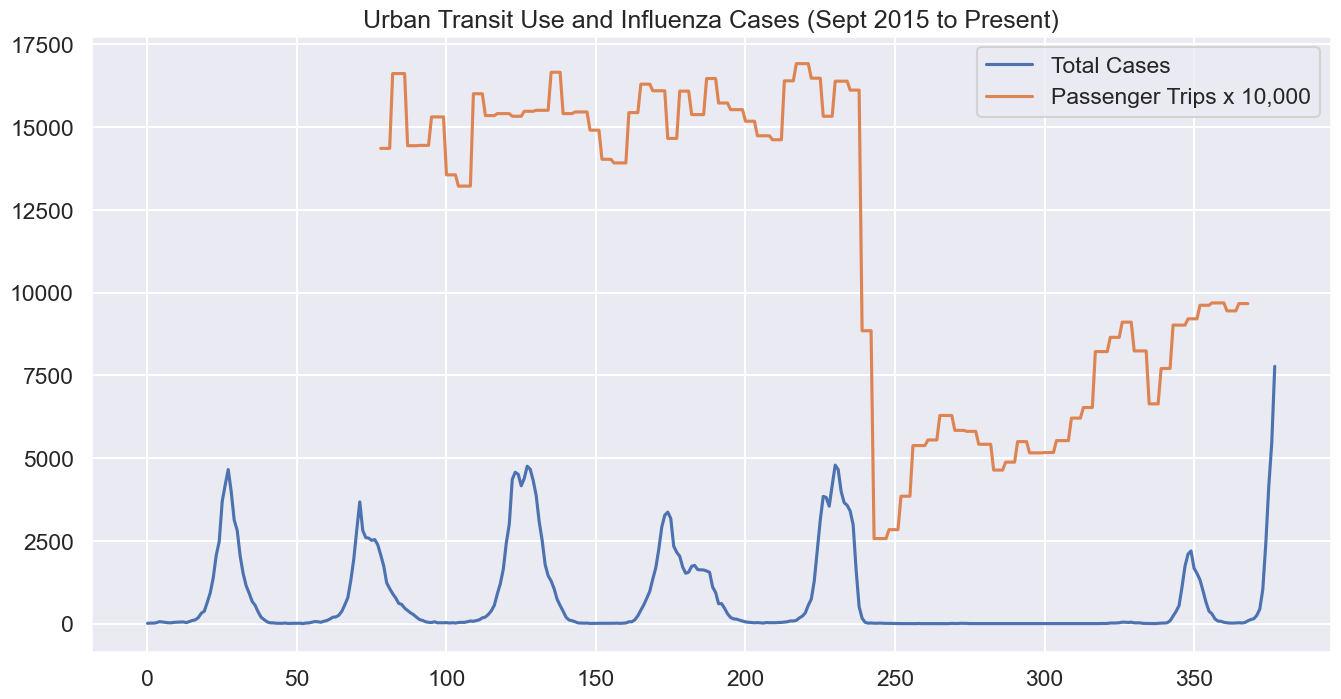

In [85]:
df_urban_transit[['Total Cases','Passenger Trips x 10,000']].plot()
plt.title('Urban Transit Use and Influenza Cases (Sept 2015 to Present)')

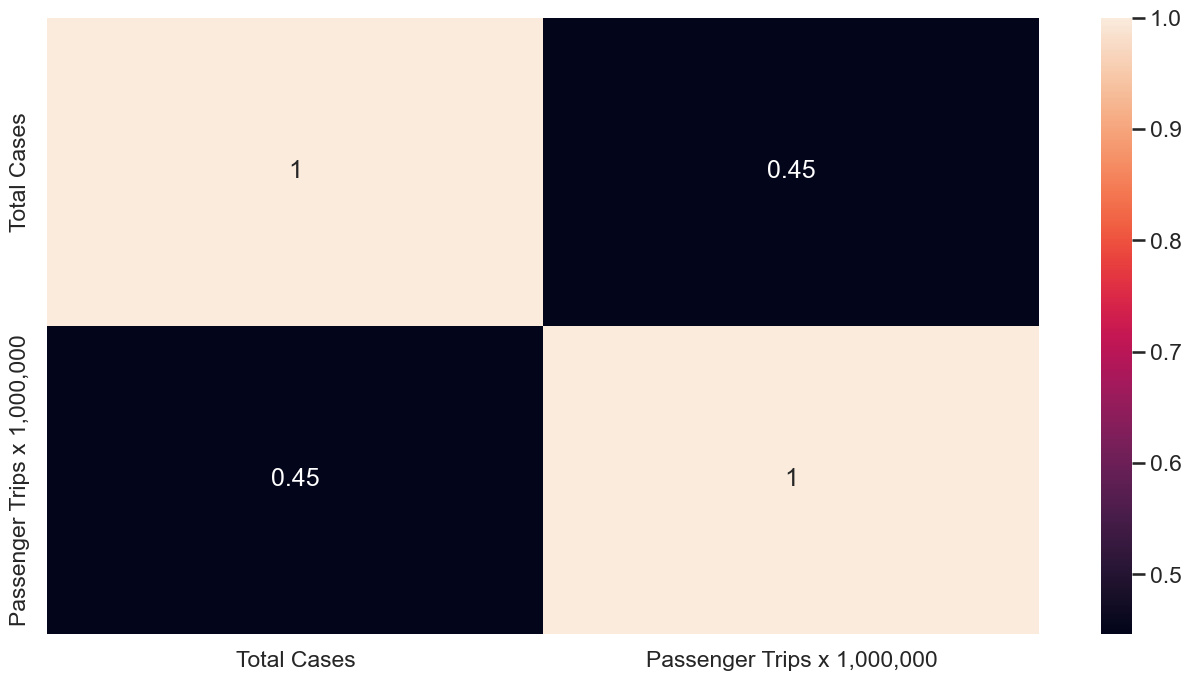

In [87]:
# examine relationship between urban transit and total flu cases

corr_matrix = df_urban_transit[['Total Cases','Passenger Trips x 1,000,000']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

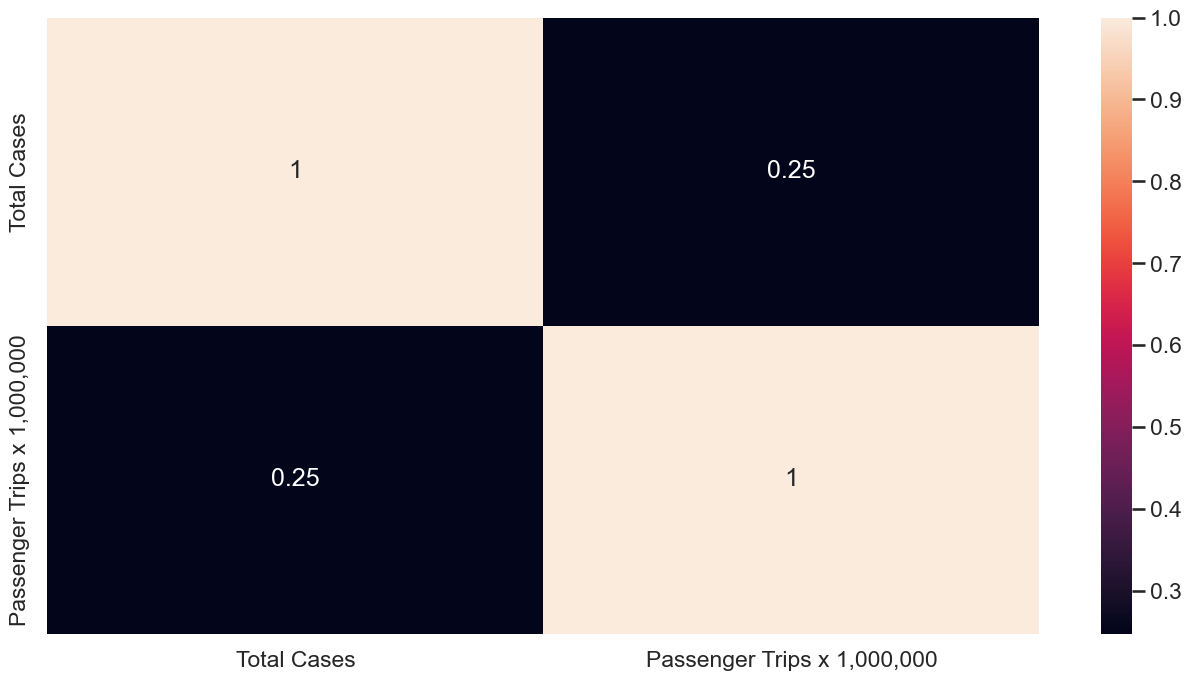

In [88]:
corr_matrix = df_urban_transit_pre_COVID[['Total Cases','Passenger Trips x 1,000,000']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

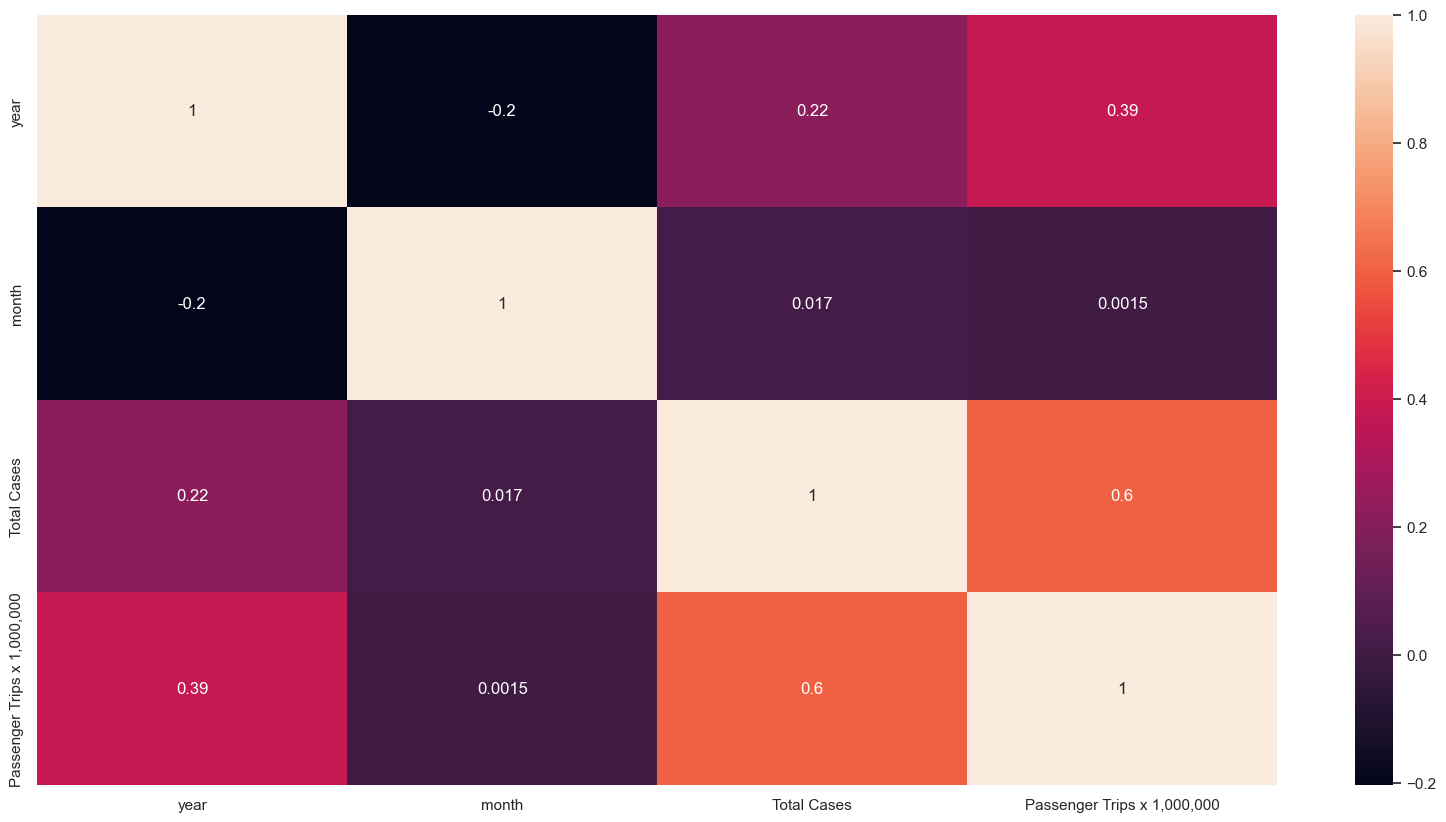

In [96]:
corr_matrix = df_urban_transit_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Google Trends - Flu Symptom Search Terms (Monthly, 2015-Present)

In [93]:
# get a list of table names

table_list_flu = os.listdir(r"..\data\google_trend\flu")
table_list_flu

['google_trend_body_aches.csv',
 'google_trend_chills.csv',
 'google_trend_cough.csv',
 'google_trend_diarrhea.csv',
 'google_trend_fatigue.csv',
 'google_trend_fever.csv',
 'google_trend_flu.csv',
 'google_trend_headache.csv',
 'google_trend_runny_nose.csv',
 'google_trend_sore_thoat.csv',
 'google_trend_vomiting.csv']

In [94]:
# create a dictionary with table names as keys and dataframes as values

dict_flu = {}

datapath = r'..\data\google_trend\flu'

for i in range(len(table_list_flu)):
    df = pd.read_csv(datapath+'\\'+table_list_flu[i], header=1)
    dict_flu[table_list_flu[i][13:-4]] = df

dict_flu

{'body_aches':       Month  body aches: (Canada)
 0   2015-01                    43
 1   2015-02                    28
 2   2015-03                    39
 3   2015-04                    32
 4   2015-05                    30
 ..      ...                   ...
 90  2022-07                    85
 91  2022-08                    67
 92  2022-09                    69
 93  2022-10                    76
 94  2022-11                   100
 
 [95 rows x 2 columns],
 'chills':       Month  chills: (Canada)
 0   2015-01                51
 1   2015-02                49
 2   2015-03                46
 3   2015-04                48
 4   2015-05                30
 ..      ...               ...
 90  2022-07                70
 91  2022-08                54
 92  2022-09                56
 93  2022-10                67
 94  2022-11                84
 
 [95 rows x 2 columns],
 'cough':       Month  cough: (Canada)
 0   2015-01               43
 1   2015-02               36
 2   2015-03               33
 3 

In [95]:
# create a dataframe with one column for each symptom

df_flu_symptoms = pd.DataFrame({'Month':dict_flu['body_aches']['Month']}) # get the month values from one of the dataframes

for key in dict_flu:
    df_flu_symptoms[key] = dict_flu[key].iloc[:,1] # retrieve values from each dataframe

df_flu_symptoms.iloc[:,1:] = df_flu_symptoms.iloc[:,1:].shift(1)

df_flu_symptoms

Month  body_aches  chills  cough  diarrhea  fatigue  fever   flu  \
0   2015-01         NaN     NaN    NaN       NaN      NaN    NaN   NaN   
1   2015-02        43.0    51.0   43.0      68.0     79.0   36.0  19.0   
2   2015-03        28.0    49.0   36.0      69.0     85.0   37.0  14.0   
3   2015-04        39.0    46.0   33.0      72.0     89.0   37.0  11.0   
4   2015-05        32.0    48.0   31.0      69.0     88.0   39.0  10.0   
..      ...         ...     ...    ...       ...      ...    ...   ...   
90  2022-07        65.0    59.0   62.0      88.0     95.0   51.0   9.0   
91  2022-08        85.0    70.0   59.0     100.0     98.0   55.0   9.0   
92  2022-09        67.0    54.0   47.0      99.0     90.0   45.0   7.0   
93  2022-10        69.0    56.0   55.0      94.0     94.0   45.0  11.0   
94  2022-11        76.0    67.0   79.0      80.0     88.0   54.0  38.0   

    headache  runny_nose  sore_thoat  vomiting  
0        NaN         NaN         NaN       NaN  
1       57.0        27.0        41.0      73.0  
2       59.0        26.0        37.0      77.0  
3       56.0        26.0        35.0      69.0  
4       56.0        24.0        34.0      64.0  
..       ...         ...         ...       ...  
90      72.0        52.0        65.0      83.0  
91      80.0        44.0        63.0      92.0  
92      77.0        39.0        55.0      82.0  
93      72.0        65.0        63.0      71.0  
94      78.0        55.0        64.0      87.0  

[95 rows x 12 columns]

In [96]:
df_flu_symptoms['Month'] = pd.to_datetime(df_flu_symptoms['Month'])
df_flu_symptoms.set_index('Month', inplace=True)

In [97]:
df_flu_symptoms_pre_COVID = df_flu_symptoms[df_flu_symptoms.index < pd.to_datetime('2020-03-01')]
df_flu_symptoms_COVID = df_flu_symptoms[df_flu_symptoms.index >= pd.to_datetime('2020-03-01')]

In [98]:
months = [x.month for x in df_flu_symptoms.index]
years = [x.year for x in df_flu_symptoms.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_flu_symptoms = df_flu_symptoms.reset_index(drop=True)
df_flu_symptoms = pd.concat([dates, df_flu_symptoms], axis=1)

In [99]:
months = [x.month for x in df_flu_symptoms_pre_COVID.index]
years = [x.year for x in df_flu_symptoms_pre_COVID.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_flu_symptoms_pre_COVID = df_flu_symptoms_pre_COVID.reset_index(drop=True)
df_flu_symptoms_pre_COVID = pd.concat([dates, df_flu_symptoms_pre_COVID], axis=1)

In [100]:
months = [x.month for x in df_flu_symptoms_COVID.index]
years = [x.year for x in df_flu_symptoms_COVID.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_flu_symptoms_COVID = df_flu_symptoms_COVID.reset_index(drop=True)
df_flu_symptoms_COVID = pd.concat([dates, df_flu_symptoms_COVID], axis=1)

In [101]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

months = [x.month for x in df_flu.index]
years = [x.year for x in df_flu.index]
weeks = [x.weekofyear for x in df_flu.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu = df_flu.reset_index(drop=True)
new = pd.concat([df_flu, df], axis=1)

df_flu_symptoms = pd.merge(new, df_flu_symptoms, how='left', on=['month','year'])

# df_flu_symptoms = new_df_flu.drop(columns=['month','year','week'])

In [102]:
df_flu_symptoms

Total Cases  month  year  week  body_aches  chills  cough  diarrhea  \
0            9.0      9  2015    36        30.0    36.0   21.0      72.0   
1           18.0      9  2015    37        30.0    36.0   21.0      72.0   
2           15.0      9  2015    38        30.0    36.0   21.0      72.0   
3           29.0      9  2015    39        30.0    36.0   21.0      72.0   
4           59.0     10  2015    40        32.0    31.0   27.0      64.0   
..           ...    ...   ...   ...         ...     ...    ...       ...   
374       2407.0     11  2022    44        76.0    67.0   79.0      80.0   
375       4144.0     11  2022    45        76.0    67.0   79.0      80.0   
376       5460.0     11  2022    46        76.0    67.0   79.0      80.0   
377       7773.0     11  2022    47        76.0    67.0   79.0      80.0   
378          NaN     12  2022    48         NaN     NaN    NaN       NaN   

     fatigue  fever   flu  headache  runny_nose  sore_thoat  vomiting  
0       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
1       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
2       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
3       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
4       74.0   29.0   7.0      57.0        26.0        34.0      59.0  
..       ...    ...   ...       ...         ...         ...       ...  
374     88.0   54.0  38.0      78.0        55.0        64.0      87.0  
375     88.0   54.0  38.0      78.0        55.0        64.0      87.0  
376     88.0   54.0  38.0      78.0        55.0        64.0      87.0  
377     88.0   54.0  38.0      78.0        55.0        64.0      87.0  
378      NaN    NaN   NaN       NaN         NaN         NaN       NaN  

[379 rows x 15 columns]

In [103]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

months = [x.month for x in df_flu_pre_COVID.index]
years = [x.year for x in df_flu_pre_COVID.index]
weeks = [x.weekofyear for x in df_flu_pre_COVID.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
new = pd.concat([df_flu_pre_COVID, df], axis=1)

df_flu_symptoms_pre_COVID = pd.merge(new, df_flu_symptoms_pre_COVID, how='left', on=['month','year'])

# df_flu_symptoms_pre_COVID = new_df_flu_pre_COVID.drop(columns=['month','year','week'])

In [104]:
df_flu_symptoms_pre_COVID

Total Cases  month  year  week  body_aches  chills  cough  diarrhea  \
0            9.0      9  2015    36        30.0    36.0   21.0      72.0   
1           18.0      9  2015    37        30.0    36.0   21.0      72.0   
2           15.0      9  2015    38        30.0    36.0   21.0      72.0   
3           29.0      9  2015    39        30.0    36.0   21.0      72.0   
4           59.0     10  2015    40        32.0    31.0   27.0      64.0   
..           ...    ...   ...   ...         ...     ...    ...       ...   
230       4789.0      2  2020     5        76.0    77.0   58.0      82.0   
231       4654.0      2  2020     6        76.0    77.0   58.0      82.0   
232       3989.0      2  2020     7        76.0    77.0   58.0      82.0   
233       3656.0      2  2020     8        76.0    77.0   58.0      82.0   
234       3576.0      2  2020     9        76.0    77.0   58.0      82.0   

     fatigue  fever   flu  headache  runny_nose  sore_thoat  vomiting  
0       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
1       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
2       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
3       81.0   30.0   5.0      56.0        20.0        25.0      60.0  
4       74.0   29.0   7.0      57.0        26.0        34.0      59.0  
..       ...    ...   ...       ...         ...         ...       ...  
230     82.0   53.0  36.0      75.0        33.0        45.0      88.0  
231     82.0   53.0  36.0      75.0        33.0        45.0      88.0  
232     82.0   53.0  36.0      75.0        33.0        45.0      88.0  
233     82.0   53.0  36.0      75.0        33.0        45.0      88.0  
234     82.0   53.0  36.0      75.0        33.0        45.0      88.0  

[235 rows x 15 columns]

In [105]:
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

months = [x.month for x in df_flu_COVID.index]
years = [x.year for x in df_flu_COVID.index]
weeks = [x.weekofyear for x in df_flu_COVID.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu_COVID = df_flu_COVID.reset_index(drop=True)
new = pd.concat([df_flu_COVID, df], axis=1)

df_flu_symptoms_COVID = pd.merge(new, df_flu_symptoms_COVID, how='left', on=['month','year'])

# df_flu_symptoms_COVID = new_df_flu_COVID.drop(columns=['month','year','week'])

In [106]:
df_flu_symptoms_COVID

Total Cases  month  year  week  body_aches  chills  cough  diarrhea  \
0         3404.0      3  2020    10        53.0    71.0   46.0      82.0   
1         2991.0      3  2020    11        53.0    71.0   46.0      82.0   
2         1619.0      3  2020    12        53.0    71.0   46.0      82.0   
3          512.0      3  2020    13        53.0    71.0   46.0      82.0   
4          161.0      4  2020    14        88.0    91.0   85.0      95.0   
..           ...    ...   ...   ...         ...     ...    ...       ...   
137        438.0     10  2022    42        69.0    56.0   55.0      94.0   
138       1031.0     10  2022    43        69.0    56.0   55.0      94.0   
139       2407.0     11  2022    44        76.0    67.0   79.0      80.0   
140       4144.0     11  2022    45        76.0    67.0   79.0      80.0   
141       5460.0     11  2022    46        76.0    67.0   79.0      80.0   

     fatigue  fever    flu  headache  runny_nose  sore_thoat  vomiting  
0       91.0   58.0   34.0      74.0        33.0        45.0      84.0  
1       91.0   58.0   34.0      74.0        33.0        45.0      84.0  
2       91.0   58.0   34.0      74.0        33.0        45.0      84.0  
3       91.0   58.0   34.0      74.0        33.0        45.0      84.0  
4       85.0  100.0  100.0      94.0       100.0       100.0      80.0  
..       ...    ...    ...       ...         ...         ...       ...  
137     94.0   45.0   11.0      72.0        65.0        63.0      71.0  
138     94.0   45.0   11.0      72.0        65.0        63.0      71.0  
139     88.0   54.0   38.0      78.0        55.0        64.0      87.0  
140     88.0   54.0   38.0      78.0        55.0        64.0      87.0  
141     88.0   54.0   38.0      78.0        55.0        64.0      87.0  

[142 rows x 15 columns]

In [39]:
# pickle.dump(df_flu_symptoms, open(r"..\data\google_trend\df_flu_symptoms.pkl", "wb" ))
# pickle.dump(df_flu_symptoms_pre_COVID, open(r"..\data\google_trend\df_flu_symptoms_pre_COVID.pkl", "wb" ))
# pickle.dump(df_flu_symptoms_COVID, open(r"..\data\google_trend\df_flu_symptoms_COVID.pkl", "wb" ))

In [107]:
df_flu_symptoms_pre_COVID.describe()

Total Cases       month         year        week  body_aches  \
count   235.000000  235.000000   235.000000  235.000000  235.000000   
mean   1009.944681    6.655319  2017.408511   27.055319   40.927660   
std    1358.688662    3.580026     1.344160   15.650603    9.602744   
min       2.000000    1.000000  2015.000000    1.000000   27.000000   
25%      37.500000    3.000000  2016.000000   13.000000   33.000000   
50%     238.000000    7.000000  2017.000000   28.000000   37.000000   
75%    1629.500000   10.000000  2019.000000   41.000000   47.000000   
max    4789.000000   12.000000  2020.000000   53.000000   76.000000   

           chills       cough    diarrhea     fatigue       fever         flu  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean    48.953191   35.710638   75.693617   83.097872   34.897872   14.578723   
std     10.765266    8.416590    8.004256    5.532634    6.624723    9.117770   
min     31.000000   20.000000   59.000000   70.000000   28.000000    4.000000   
25%     41.000000   29.000000   71.000000   80.000000   30.000000    6.000000   
50%     47.000000   37.000000   75.000000   83.000000   33.000000   11.000000   
75%     57.000000   42.000000   81.000000   87.000000   38.000000   22.000000   
max     77.000000   58.000000   99.000000   93.000000   53.000000   36.000000   

         headache  runny_nose  sore_thoat    vomiting  
count  235.000000  235.000000  235.000000  235.000000  
mean    65.987234   24.225532   34.791489   71.459574  
std      5.639816    4.916850    4.868696   10.826993  
min     56.000000   15.000000   25.000000   57.000000  
25%     62.000000   21.000000   32.000000   62.000000  
50%     66.000000   24.000000   35.000000   69.000000  
75%     70.000000   28.000000   37.500000   81.000000  
max     76.000000   34.000000   45.000000   95.000000

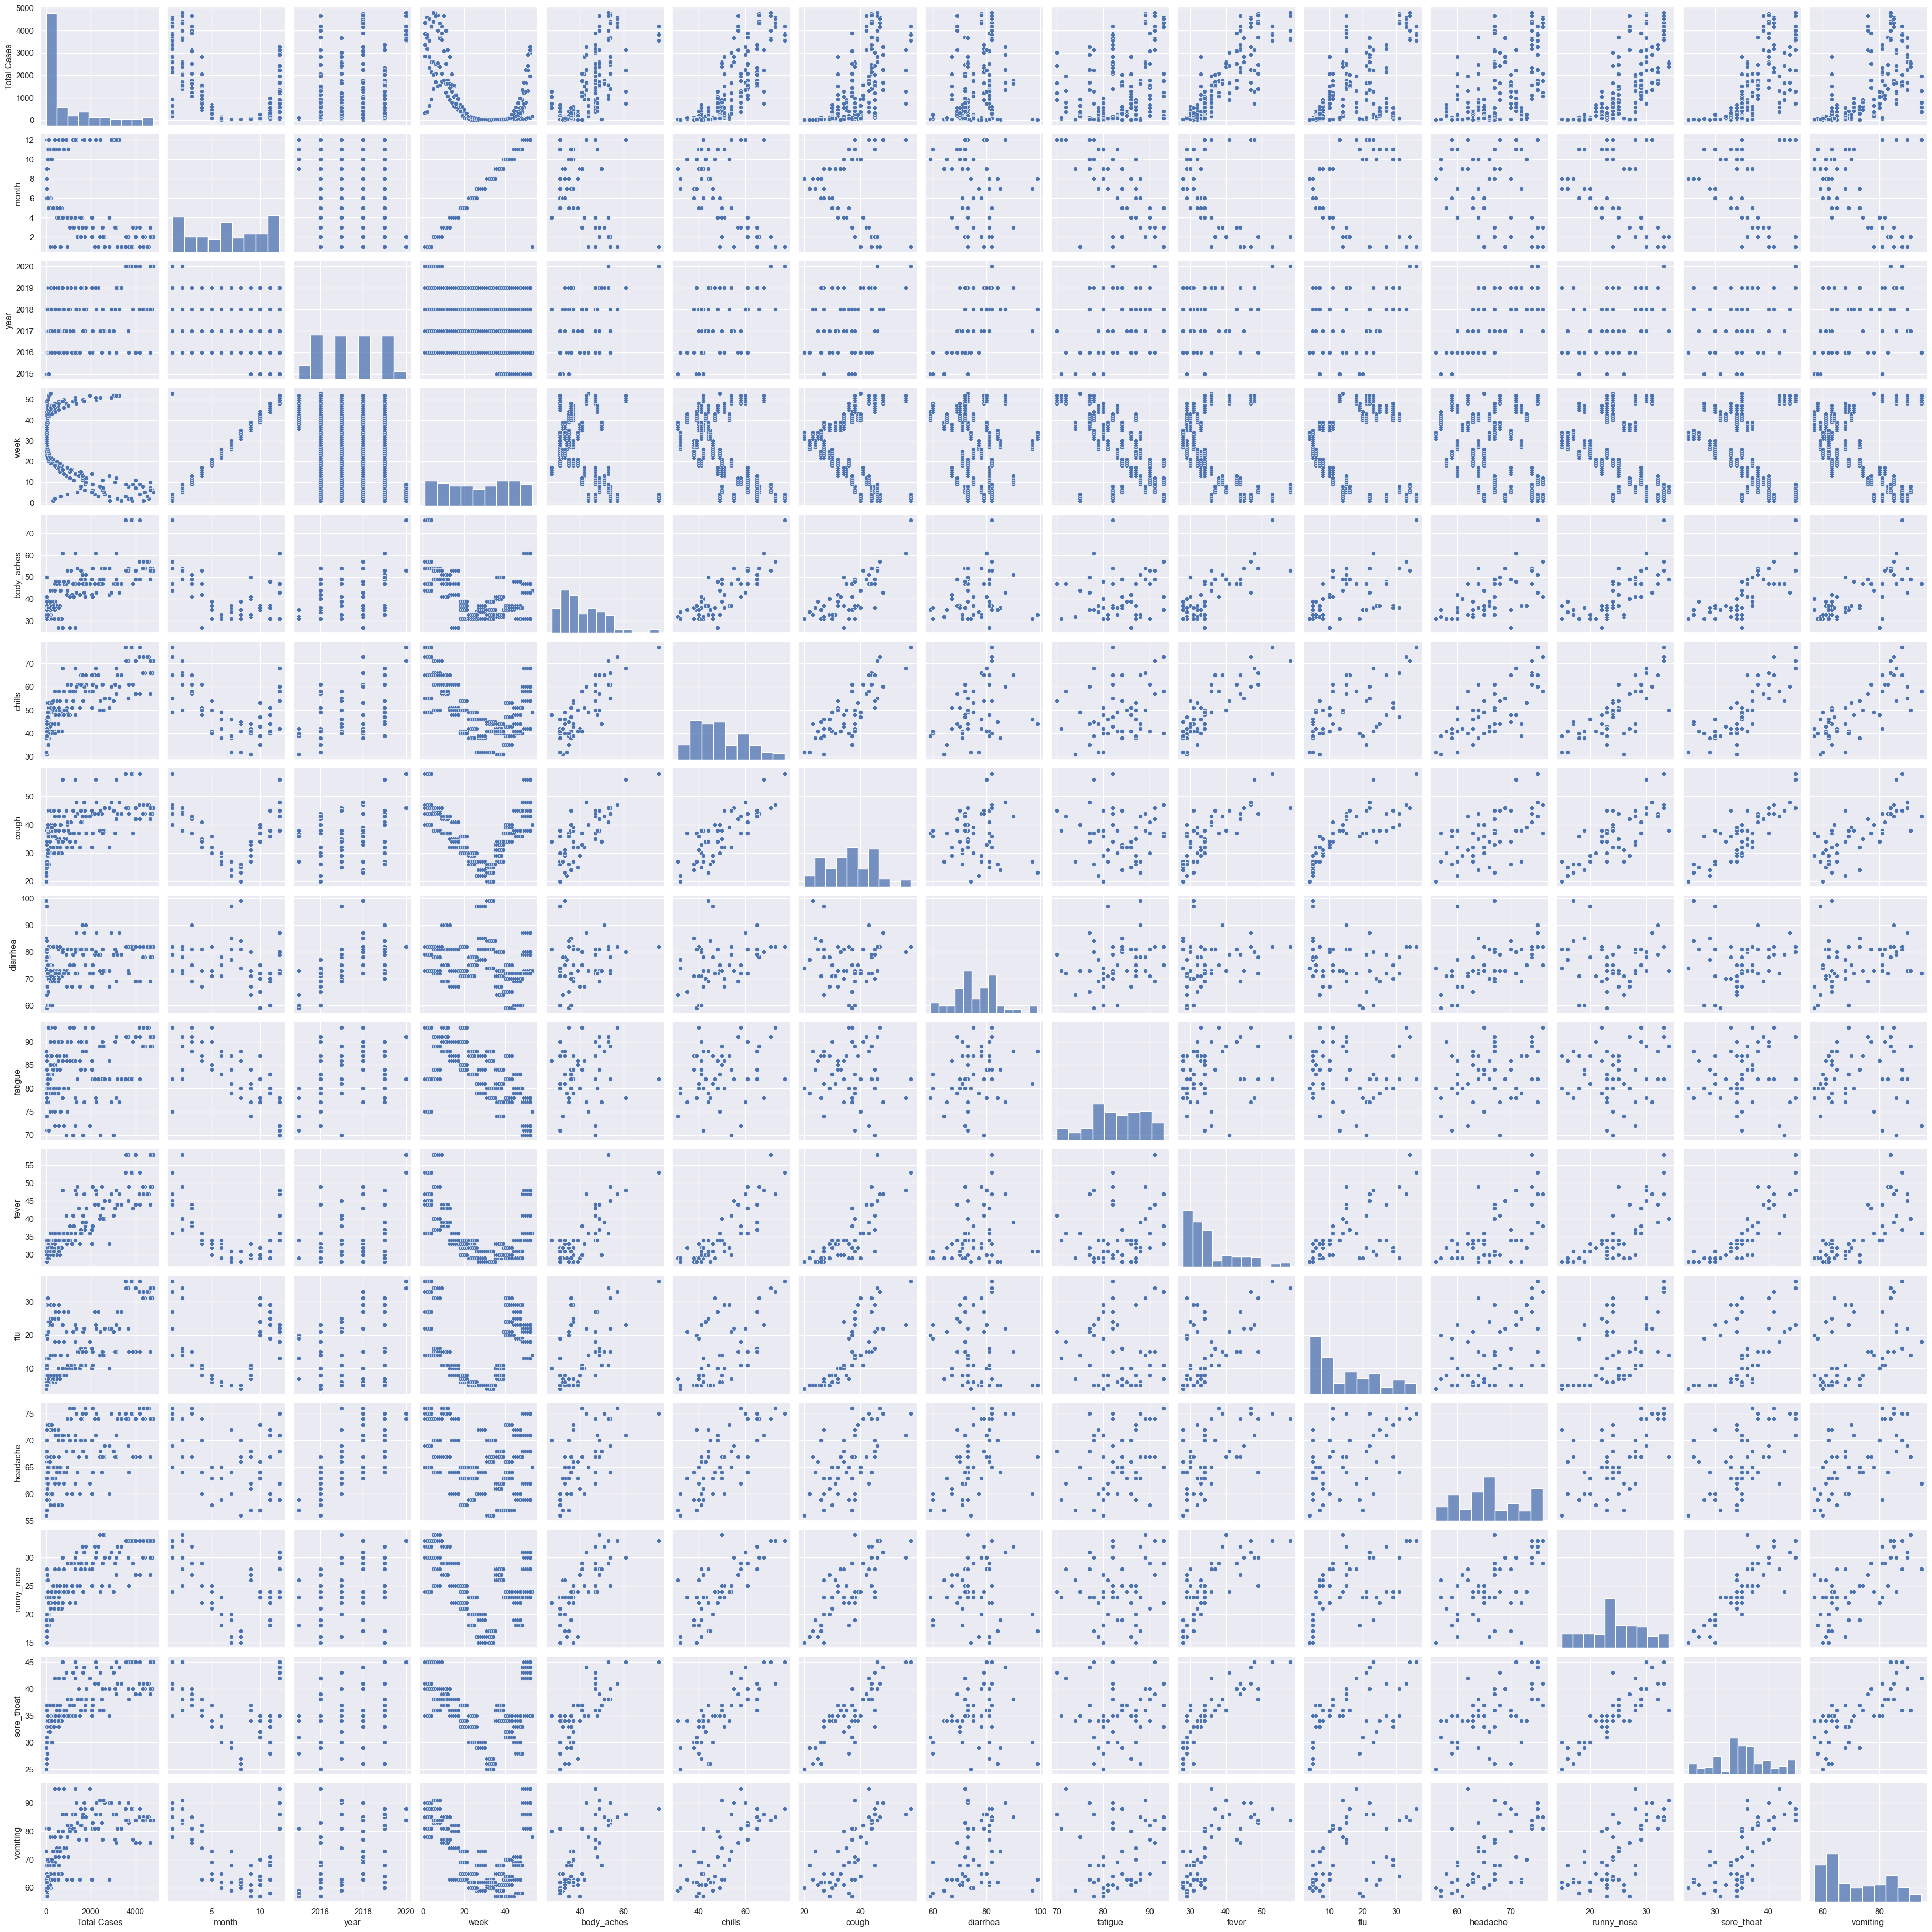

In [173]:
sns.pairplot(df_flu_symptoms_pre_COVID, kind='scatter')

In [109]:
df_flu_symptoms_pre_COVID = df_flu_symptoms_pre_COVID.drop(columns=['month','year','week'])

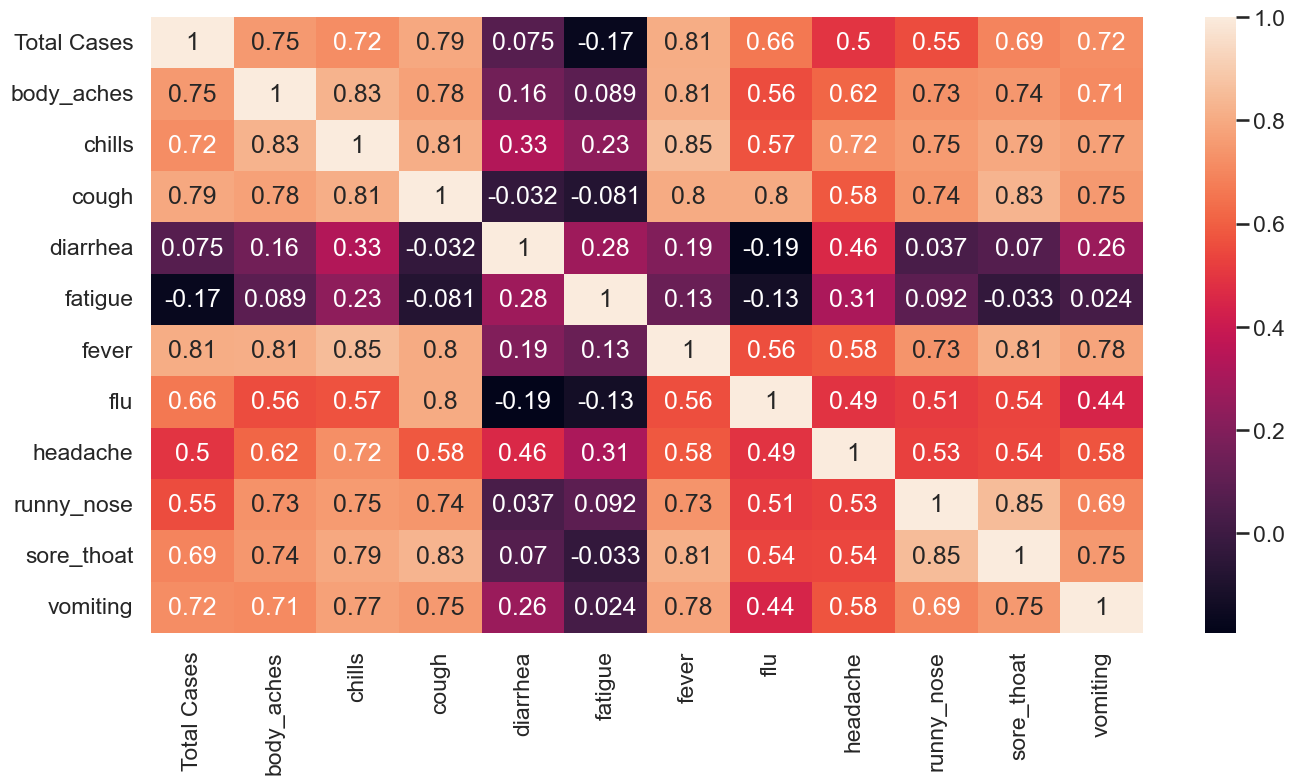

In [110]:
corr_matrix = df_flu_symptoms_pre_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [112]:
df_flu_symptoms = df_flu_symptoms.drop(columns=['month','year','week'])

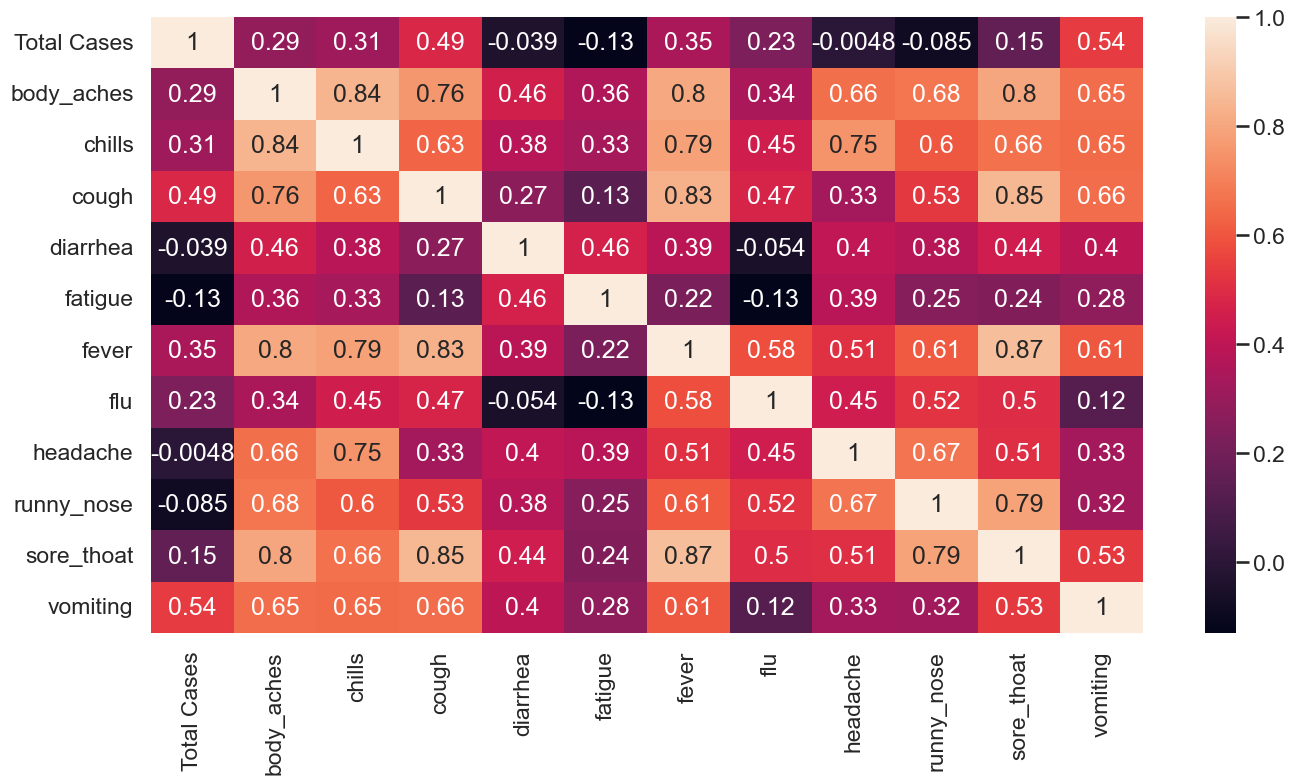

In [113]:
corr_matrix = df_flu_symptoms.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Google Trends - Covid Search Terms (Monthly, 2015-Present)

In [114]:
table_list_COVID = os.listdir(r"..\data\google_trend\COVID")

In [115]:
table_list_COVID

['google_trend_coronavirus.csv',
 'google_trend_COVID.csv',
 'google_trend_lockdown.csv',
 'google_trend_mask.csv',
 'google_trend_quarantine.csv',
 'google_trend_social_distancing.csv',
 'google_trend_vaccine.csv']

In [116]:
dict_COVID = {}

datapath = r'..\data\google_trend\COVID'

for i in range(len(table_list_COVID)):
    df = pd.read_csv(datapath+'\\'+table_list_COVID[i], header=1)
    dict_COVID[table_list_COVID[i][13:-4]] = df

In [117]:
dict_COVID['coronavirus']

Month coronavirus: (Canada)
0   2015-01                    <1
1   2015-02                    <1
2   2015-03                    <1
3   2015-04                    <1
4   2015-05                    <1
..      ...                   ...
90  2022-07                    <1
91  2022-08                    <1
92  2022-09                    <1
93  2022-10                    <1
94  2022-11                    <1

[95 rows x 2 columns]

In [118]:
df_COVID_terms = pd.DataFrame({'Month':dict_COVID['coronavirus']['Month']})

for key in dict_COVID:
    df_COVID_terms[key] = dict_COVID[key].iloc[:,1]

df_COVID_terms.iloc[:,1:] = df_COVID_terms.iloc[:,1:].shift(1)
df_COVID_terms

Month coronavirus COVID  lockdown  mask  quarantine social_distancing  \
0   2015-01        None  None       NaN   NaN         NaN              None   
1   2015-02          <1     0       1.0  12.0         1.0                 0   
2   2015-03          <1    <1       1.0  14.0         1.0                 0   
3   2015-04          <1     0       1.0  14.0         1.0                 0   
4   2015-05          <1    <1       1.0  12.0         1.0                 0   
..      ...         ...   ...       ...   ...         ...               ...   
90  2022-07          <1    12       2.0  23.0         7.0                 1   
91  2022-08          <1    16       2.0  20.0         9.0                <1   
92  2022-09          <1    11       2.0  20.0         8.0                <1   
93  2022-10          <1    11       3.0  20.0         7.0                 1   
94  2022-11          <1    11       2.0  25.0         3.0                <1   

    vaccine  
0       NaN  
1       1.0  
2       2.0  
3       1.0  
4       1.0  
..      ...  
90      8.0  
91      9.0  
92      8.0  
93      9.0  
94     10.0  

[95 rows x 8 columns]

In [119]:
df_COVID_terms = df_COVID_terms.replace('<1',0.5)
df_COVID_terms

Month coronavirus COVID  lockdown  mask  quarantine social_distancing  \
0   2015-01        None  None       NaN   NaN         NaN              None   
1   2015-02         0.5     0       1.0  12.0         1.0                 0   
2   2015-03         0.5   0.5       1.0  14.0         1.0                 0   
3   2015-04         0.5     0       1.0  14.0         1.0                 0   
4   2015-05         0.5   0.5       1.0  12.0         1.0                 0   
..      ...         ...   ...       ...   ...         ...               ...   
90  2022-07         0.5    12       2.0  23.0         7.0                 1   
91  2022-08         0.5    16       2.0  20.0         9.0               0.5   
92  2022-09         0.5    11       2.0  20.0         8.0               0.5   
93  2022-10         0.5    11       3.0  20.0         7.0                 1   
94  2022-11         0.5    11       2.0  25.0         3.0               0.5   

    vaccine  
0       NaN  
1       1.0  
2       2.0  
3       1.0  
4       1.0  
..      ...  
90      8.0  
91      9.0  
92      8.0  
93      9.0  
94     10.0  

[95 rows x 8 columns]

In [120]:
df_COVID_terms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              95 non-null     object 
 1   coronavirus        94 non-null     object 
 2   COVID              94 non-null     object 
 3   lockdown           94 non-null     float64
 4   mask               94 non-null     float64
 5   quarantine         94 non-null     float64
 6   social_distancing  94 non-null     object 
 7   vaccine            94 non-null     float64
dtypes: float64(4), object(4)
memory usage: 6.1+ KB


In [121]:
# df_COVID_terms[['coronavirus', 'COVID', 'social_distancing']] = df_COVID_terms[['coronavirus', 'COVID', 'social_distancing']].astype('int64')

In [122]:
df_COVID_terms[['coronavirus', 'COVID', 'social_distancing']] = df_COVID_terms[['coronavirus', 'COVID', 'social_distancing']].apply(pd.to_numeric)

In [123]:
df_COVID_terms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              95 non-null     object 
 1   coronavirus        94 non-null     float64
 2   COVID              94 non-null     float64
 3   lockdown           94 non-null     float64
 4   mask               94 non-null     float64
 5   quarantine         94 non-null     float64
 6   social_distancing  94 non-null     float64
 7   vaccine            94 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.1+ KB


In [124]:
df_COVID_terms['Month'] = pd.to_datetime(df_COVID_terms['Month'])
df_COVID_terms.set_index('Month', inplace=True)

In [125]:
df_COVID_terms

coronavirus  COVID  lockdown  mask  quarantine  social_distancing  \
Month                                                                           
2015-01-01          NaN    NaN       NaN   NaN         NaN                NaN   
2015-02-01          0.5    0.0       1.0  12.0         1.0                0.0   
2015-03-01          0.5    0.5       1.0  14.0         1.0                0.0   
2015-04-01          0.5    0.0       1.0  14.0         1.0                0.0   
2015-05-01          0.5    0.5       1.0  12.0         1.0                0.0   
...                 ...    ...       ...   ...         ...                ...   
2022-07-01          0.5   12.0       2.0  23.0         7.0                1.0   
2022-08-01          0.5   16.0       2.0  20.0         9.0                0.5   
2022-09-01          0.5   11.0       2.0  20.0         8.0                0.5   
2022-10-01          0.5   11.0       3.0  20.0         7.0                1.0   
2022-11-01          0.5   11.0       2.0  25.0         3.0                0.5   

            vaccine  
Month                
2015-01-01      NaN  
2015-02-01      1.0  
2015-03-01      2.0  
2015-04-01      1.0  
2015-05-01      1.0  
...             ...  
2022-07-01      8.0  
2022-08-01      9.0  
2022-09-01      8.0  
2022-10-01      9.0  
2022-11-01     10.0  

[95 rows x 7 columns]

In [126]:
df_COVID_terms_pre_COVID = df_COVID_terms[df_COVID_terms.index < pd.to_datetime('2020-03-01')]
df_COVID_terms_COVID = df_COVID_terms[df_COVID_terms.index >= pd.to_datetime('2020-03-01')]
df_COVID_terms_COVID

coronavirus  COVID  lockdown   mask  quarantine  \
Month                                                         
2020-03-01         17.0    1.0       2.0   32.0         9.0   
2020-04-01        100.0   83.0      39.0   59.0       100.0   
2020-05-01         71.0   82.0      22.0  100.0        75.0   
2020-06-01         23.0   53.0      13.0   77.0        41.0   
2020-07-01         15.0   41.0       6.0   52.0        29.0   
2020-08-01         13.0   48.0       5.0   87.0        27.0   
2020-09-01          8.0   41.0       4.0   80.0        26.0   
2020-10-01          8.0   57.0       7.0   62.0        21.0   
2020-11-01          8.0   60.0      10.0   51.0        22.0   
2020-12-01          7.0   71.0      51.0   54.0        22.0   
2021-01-01          7.0   74.0     100.0   40.0        25.0   
2021-02-01          6.0   62.0      80.0   38.0        25.0   
2021-03-01          4.0   51.0      49.0   38.0        32.0   
2021-04-01          4.0   65.0      34.0   34.0        28.0   
2021-05-01          5.0  100.0      89.0   40.0        27.0   
2021-06-01          4.0   86.0      51.0   30.0        25.0   
2021-07-01          3.0   65.0      16.0   27.0        34.0   
2021-08-01          3.0   46.0       6.0   30.0        22.0   
2021-09-01          4.0   61.0       9.0   32.0        19.0   
2021-10-01          3.0   65.0       9.0   33.0        15.0   
2021-11-01          2.0   48.0       7.0   32.0        12.0   
2021-12-01          2.0   41.0       8.0   25.0        10.0   
2022-01-01          3.0   95.0      24.0   39.0        23.0   
2022-02-01          2.0   78.0      24.0   47.0        27.0   
2022-03-01          1.0   34.0       6.0   33.0        12.0   
2022-04-01          1.0   24.0       4.0   49.0        10.0   
2022-05-01          1.0   26.0       6.0   28.0        12.0   
2022-06-01          0.5   14.0       3.0   23.0         7.0   
2022-07-01          0.5   12.0       2.0   23.0         7.0   
2022-08-01          0.5   16.0       2.0   20.0         9.0   
2022-09-01          0.5   11.0       2.0   20.0         8.0   
2022-10-01          0.5   11.0       3.0   20.0         7.0   
2022-11-01          0.5   11.0       2.0   25.0         3.0   

            social_distancing  vaccine  
Month                                   
2020-03-01                0.0      2.0  
2020-04-01              100.0      6.0  
2020-05-01               99.0      6.0  
2020-06-01               50.0      5.0  
2020-07-01               27.0      3.0  
2020-08-01               16.0      5.0  
2020-09-01               13.0      5.0  
2020-10-01               13.0      5.0  
2020-11-01                8.0      6.0  
2020-12-01                6.0     10.0  
2021-01-01                6.0     21.0  
2021-02-01                4.0     19.0  
2021-03-01                4.0     20.0  
2021-04-01                3.0     58.0  
2021-05-01                4.0    100.0  
2021-06-01                3.0     96.0  
2021-07-01                2.0     91.0  
2021-08-01                2.0     46.0  
2021-09-01                2.0     54.0  
2021-10-01                2.0     69.0  
2021-11-01                2.0     44.0  
2021-12-01                1.0     29.0  
2022-01-01                2.0     44.0  
2022-02-01                1.0     41.0  
2022-03-01                1.0     16.0  
2022-04-01                1.0      9.0  
2022-05-01                1.0      9.0  
2022-06-01                1.0      7.0  
2022-07-01                1.0      8.0  
2022-08-01                0.5      9.0  
2022-09-01                0.5      8.0  
2022-10-01                1.0      9.0  
2022-11-01                0.5     10.0

In [127]:
months = [x.month for x in df_COVID_terms.index]
years = [x.year for x in df_COVID_terms.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_COVID_terms = df_COVID_terms.reset_index(drop=True)
df_COVID_terms = pd.concat([dates, df_COVID_terms], axis=1)

In [128]:
months = [x.month for x in df_COVID_terms_pre_COVID.index]
years = [x.year for x in df_COVID_terms_pre_COVID.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_COVID_terms_pre_COVID = df_COVID_terms_pre_COVID.reset_index(drop=True)
df_COVID_terms_pre_COVID = pd.concat([dates, df_COVID_terms_pre_COVID], axis=1)

In [129]:
months = [x.month for x in df_COVID_terms_COVID.index]
years = [x.year for x in df_COVID_terms_COVID.index]
X = np.array([months, years]).T
dates = pd.DataFrame(X, columns = ['month', 'year'])
df_COVID_terms_COVID = df_COVID_terms_COVID.reset_index(drop=True)
df_COVID_terms_COVID = pd.concat([dates, df_COVID_terms_COVID], axis=1)

In [130]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

months = [x.month for x in df_flu.index]
years = [x.year for x in df_flu.index]
weeks = [x.weekofyear for x in df_flu.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu = df_flu.reset_index(drop=True)
new = pd.concat([df_flu, df], axis=1)

df_COVID_terms = pd.merge(new, df_COVID_terms, how='left', on=['month','year'])

# df_COVID_terms = new_df_flu.drop(columns=['month','year','week'])

In [131]:
df_COVID_terms

Total Cases  month  year  week  coronavirus  COVID  lockdown  mask  \
0            9.0      9  2015    36          0.5    0.0       1.0  13.0   
1           18.0      9  2015    37          0.5    0.0       1.0  13.0   
2           15.0      9  2015    38          0.5    0.0       1.0  13.0   
3           29.0      9  2015    39          0.5    0.0       1.0  13.0   
4           59.0     10  2015    40          0.5    0.0       2.0  12.0   
..           ...    ...   ...   ...          ...    ...       ...   ...   
374       2407.0     11  2022    44          0.5   11.0       2.0  25.0   
375       4144.0     11  2022    45          0.5   11.0       2.0  25.0   
376       5460.0     11  2022    46          0.5   11.0       2.0  25.0   
377       7773.0     11  2022    47          0.5   11.0       2.0  25.0   
378          NaN     12  2022    48          NaN    NaN       NaN   NaN   

     quarantine  social_distancing  vaccine  
0           1.0                0.5      1.0  
1           1.0                0.5      1.0  
2           1.0                0.5      1.0  
3           1.0                0.5      1.0  
4           1.0                0.0      1.0  
..          ...                ...      ...  
374         3.0                0.5     10.0  
375         3.0                0.5     10.0  
376         3.0                0.5     10.0  
377         3.0                0.5     10.0  
378         NaN                NaN      NaN  

[379 rows x 11 columns]

In [132]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

months = [x.month for x in df_flu_pre_COVID.index]
years = [x.year for x in df_flu_pre_COVID.index]
weeks = [x.weekofyear for x in df_flu_pre_COVID.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
new = pd.concat([df_flu_pre_COVID, df], axis=1)

df_COVID_terms_pre_COVID = pd.merge(new, df_COVID_terms_pre_COVID, how='left', on=['month','year'])

# df_COVID_terms_pre_COVID = new_df_flu_pre_COVID.drop(columns=['month','year','week'])

In [133]:
df_COVID_terms_pre_COVID

Total Cases  month  year  week  coronavirus  COVID  lockdown  mask  \
0            9.0      9  2015    36          0.5    0.0       1.0  13.0   
1           18.0      9  2015    37          0.5    0.0       1.0  13.0   
2           15.0      9  2015    38          0.5    0.0       1.0  13.0   
3           29.0      9  2015    39          0.5    0.0       1.0  13.0   
4           59.0     10  2015    40          0.5    0.0       2.0  12.0   
..           ...    ...   ...   ...          ...    ...       ...   ...   
230       4789.0      2  2020     5         11.0    0.0       1.0  32.0   
231       4654.0      2  2020     6         11.0    0.0       1.0  32.0   
232       3989.0      2  2020     7         11.0    0.0       1.0  32.0   
233       3656.0      2  2020     8         11.0    0.0       1.0  32.0   
234       3576.0      2  2020     9         11.0    0.0       1.0  32.0   

     quarantine  social_distancing  vaccine  
0           1.0                0.5      1.0  
1           1.0                0.5      1.0  
2           1.0                0.5      1.0  
3           1.0                0.5      1.0  
4           1.0                0.0      1.0  
..          ...                ...      ...  
230         4.0                0.0      2.0  
231         4.0                0.0      2.0  
232         4.0                0.0      2.0  
233         4.0                0.0      2.0  
234         4.0                0.0      2.0  

[235 rows x 11 columns]

In [134]:
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

months = [x.month for x in df_flu_COVID.index]
years = [x.year for x in df_flu_COVID.index]
weeks = [x.weekofyear for x in df_flu_COVID.index]

X = np.array([months, years, weeks]).T
df = pd.DataFrame(X, columns = ['month', 'year', 'week'])

df_flu_COVID = df_flu_COVID.reset_index(drop=True)
new = pd.concat([df_flu_COVID, df], axis=1)

df_COVID_terms_COVID = pd.merge(new, df_COVID_terms_COVID, how='left', on=['month','year'])

# df_COVID_terms_COVID = new_df_flu_COVID.drop(columns=['month','year','week'])

In [135]:
df_COVID_terms_COVID

Total Cases  month  year  week  coronavirus  COVID  lockdown  mask  \
0         3404.0      3  2020    10         17.0    1.0       2.0  32.0   
1         2991.0      3  2020    11         17.0    1.0       2.0  32.0   
2         1619.0      3  2020    12         17.0    1.0       2.0  32.0   
3          512.0      3  2020    13         17.0    1.0       2.0  32.0   
4          161.0      4  2020    14        100.0   83.0      39.0  59.0   
..           ...    ...   ...   ...          ...    ...       ...   ...   
137        438.0     10  2022    42          0.5   11.0       3.0  20.0   
138       1031.0     10  2022    43          0.5   11.0       3.0  20.0   
139       2407.0     11  2022    44          0.5   11.0       2.0  25.0   
140       4144.0     11  2022    45          0.5   11.0       2.0  25.0   
141       5460.0     11  2022    46          0.5   11.0       2.0  25.0   

     quarantine  social_distancing  vaccine  
0           9.0                0.0      2.0  
1           9.0                0.0      2.0  
2           9.0                0.0      2.0  
3           9.0                0.0      2.0  
4         100.0              100.0      6.0  
..          ...                ...      ...  
137         7.0                1.0      9.0  
138         7.0                1.0      9.0  
139         3.0                0.5     10.0  
140         3.0                0.5     10.0  
141         3.0                0.5     10.0  

[142 rows x 11 columns]

In [136]:
# pickle.dump(df_COVID_terms, open(r"..\data\google_trend\df_COVID_terms.pkl", "wb" ))
# pickle.dump(df_COVID_terms_pre_COVID, open(r"..\data\google_trend\df_COVID_terms_pre_COVID.pkl", "wb" ))
# pickle.dump(df_COVID_terms_COVID, open(r"..\data\google_trend\df_COVID_terms_COVID.pkl", "wb" ))

In [137]:
df_COVID_terms.describe()

Total Cases       month         year        week  coronavirus  \
count   378.000000  379.000000   379.000000  379.000000   378.000000   
mean    752.111111    6.649077  2018.788918   27.171504     4.207672   
std    1280.766037    3.461935     2.116397   15.129936    13.253842   
min       0.000000    1.000000  2015.000000    1.000000     0.000000   
25%      10.000000    4.000000  2017.000000   14.000000     0.500000   
50%      57.000000    7.000000  2019.000000   28.000000     0.500000   
75%     971.000000   10.000000  2021.000000   40.000000     3.000000   
max    7773.000000   12.000000  2022.000000   53.000000   100.000000   

            COVID    lockdown        mask  quarantine  social_distancing  \
count  378.000000  378.000000  378.000000  378.000000         378.000000   
mean    19.017196    8.822751   26.238095    9.537037           4.423280   
std     29.426510   19.247593   17.933015   15.930051          16.150796   
min      0.000000    1.000000   12.000000    1.000000           0.000000   
25%      0.000000    1.000000   16.000000    1.000000           0.000000   
50%      0.500000    1.000000   18.000000    1.000000           0.000000   
75%     41.000000    6.000000   32.000000   12.000000           1.000000   
max    100.000000  100.000000  100.000000  100.000000         100.000000   

          vaccine  
count  378.000000  
mean    10.880952  
std     21.791004  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      8.000000  
max    100.000000

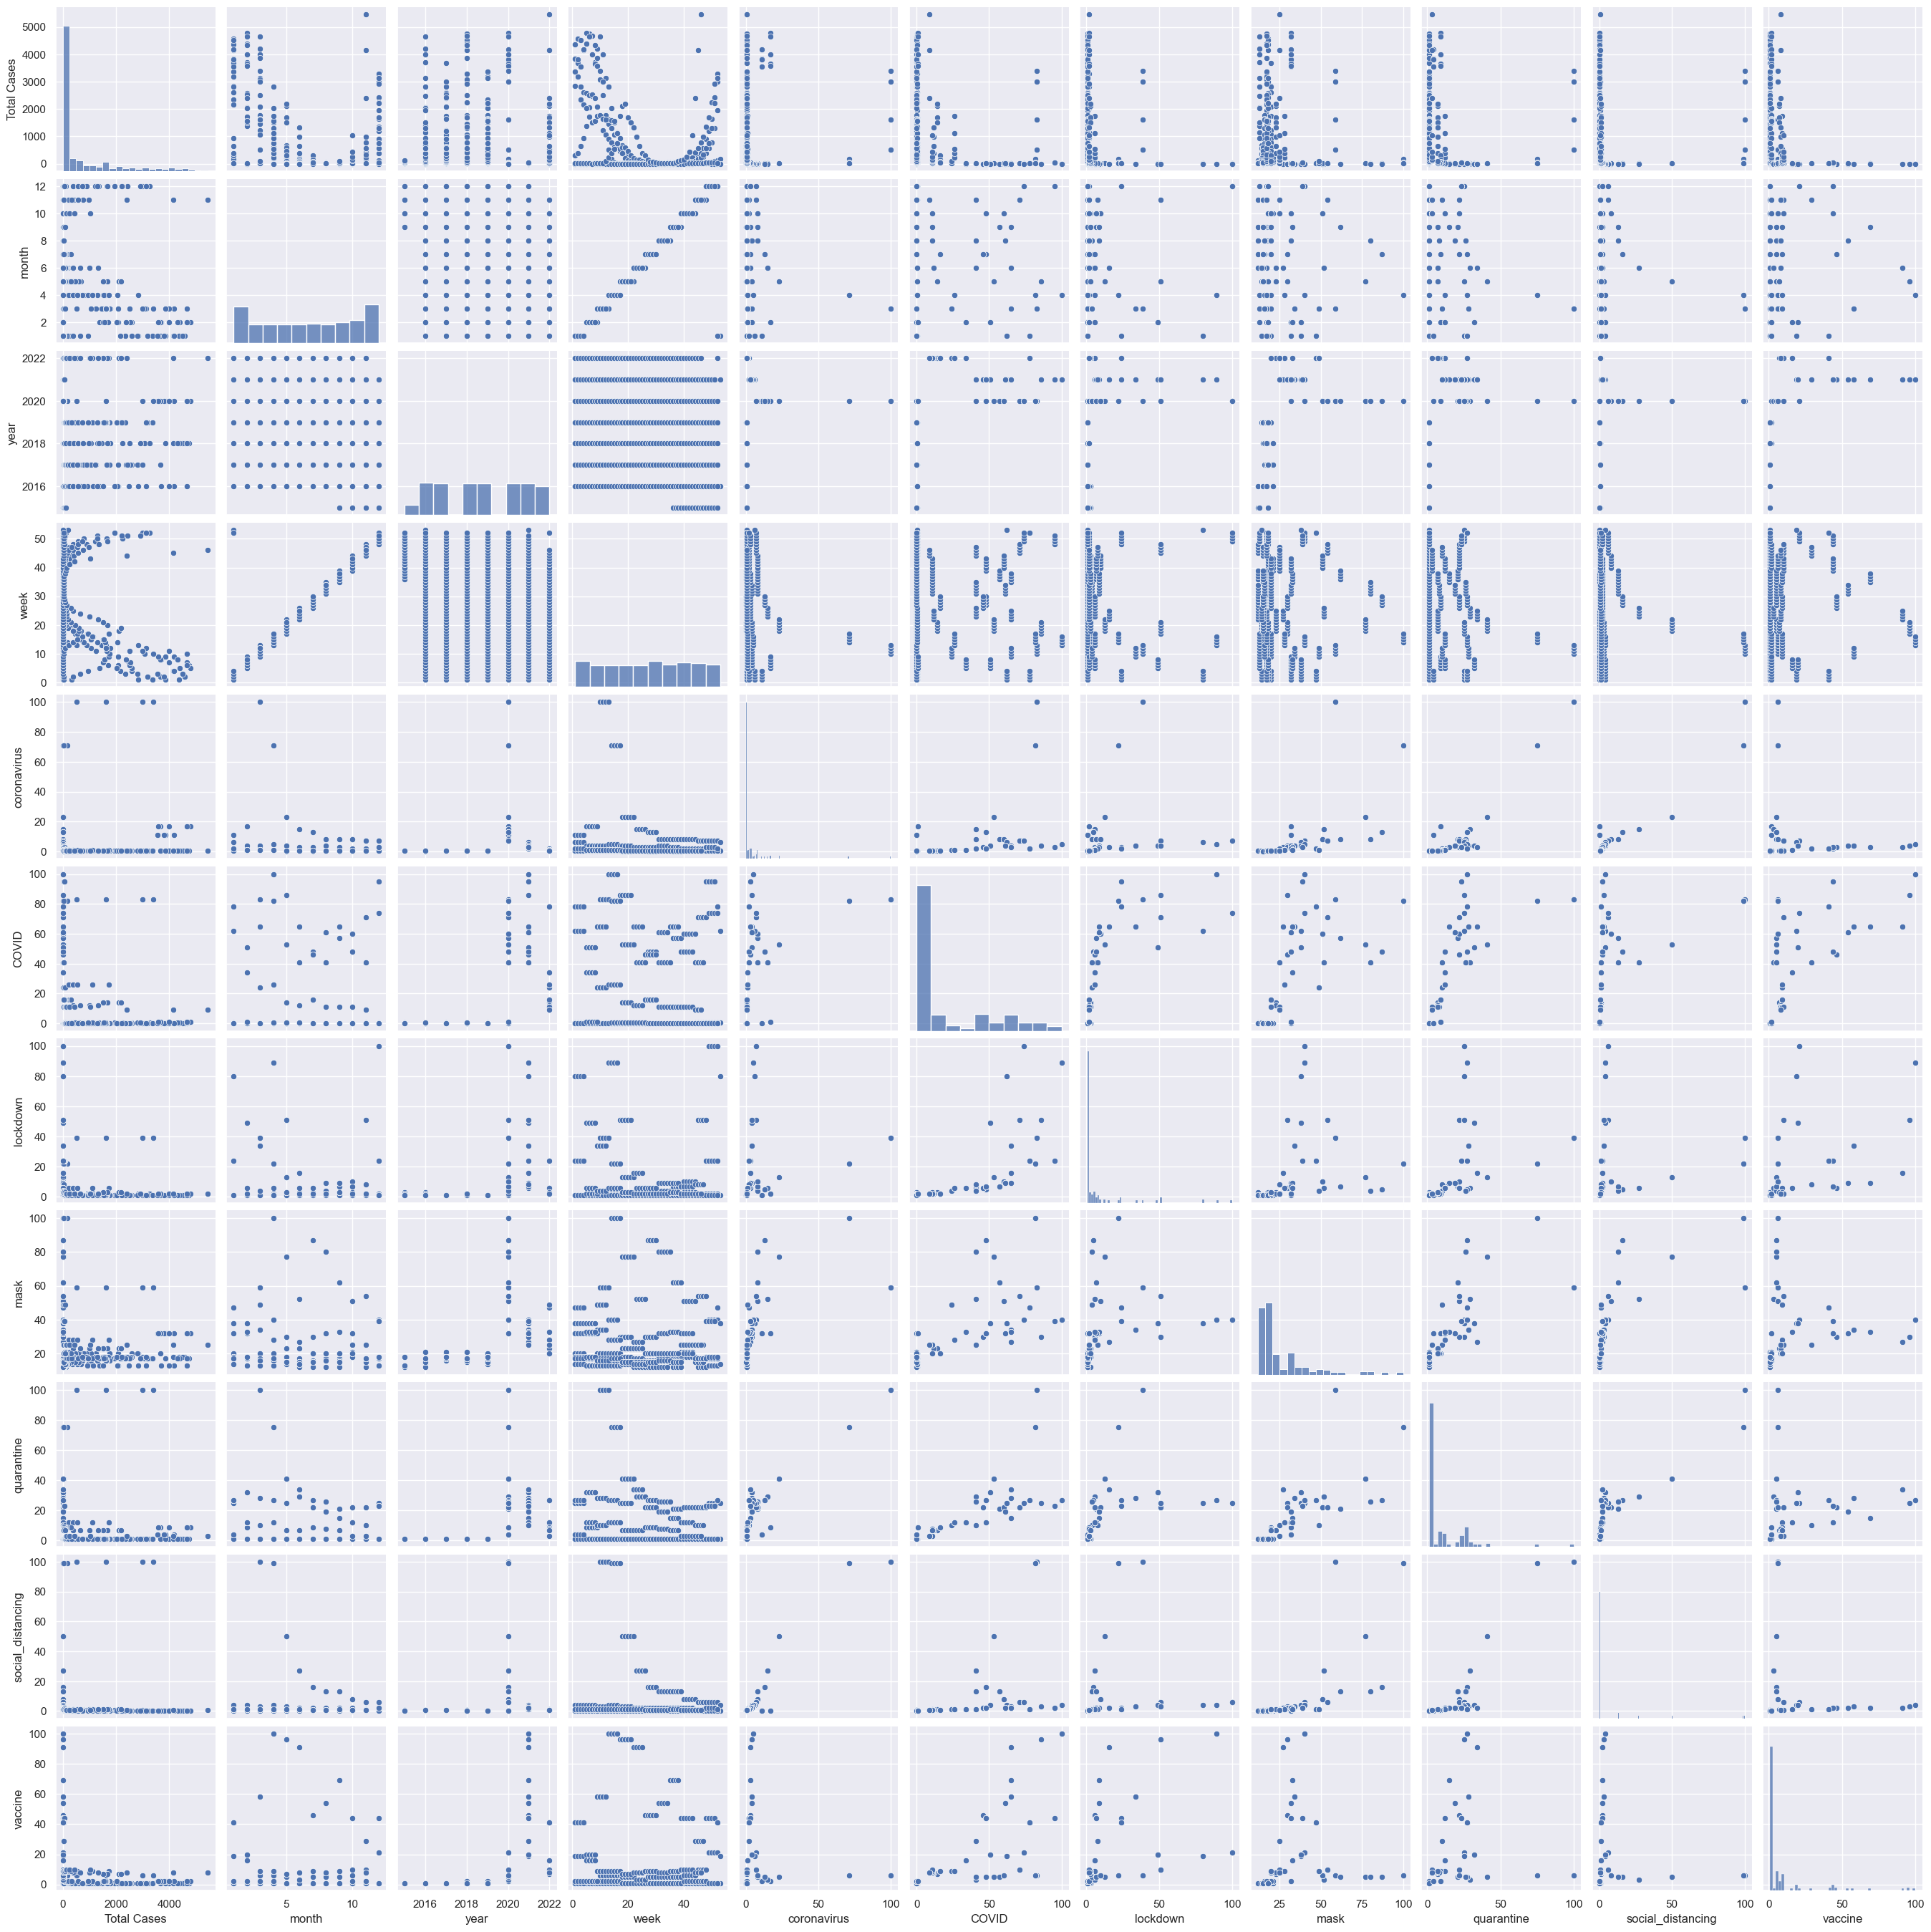

In [199]:
sns.pairplot(df_COVID_terms, kind='scatter')

In [138]:
df_COVID_terms = df_COVID_terms.drop(columns=['month','year','week'])

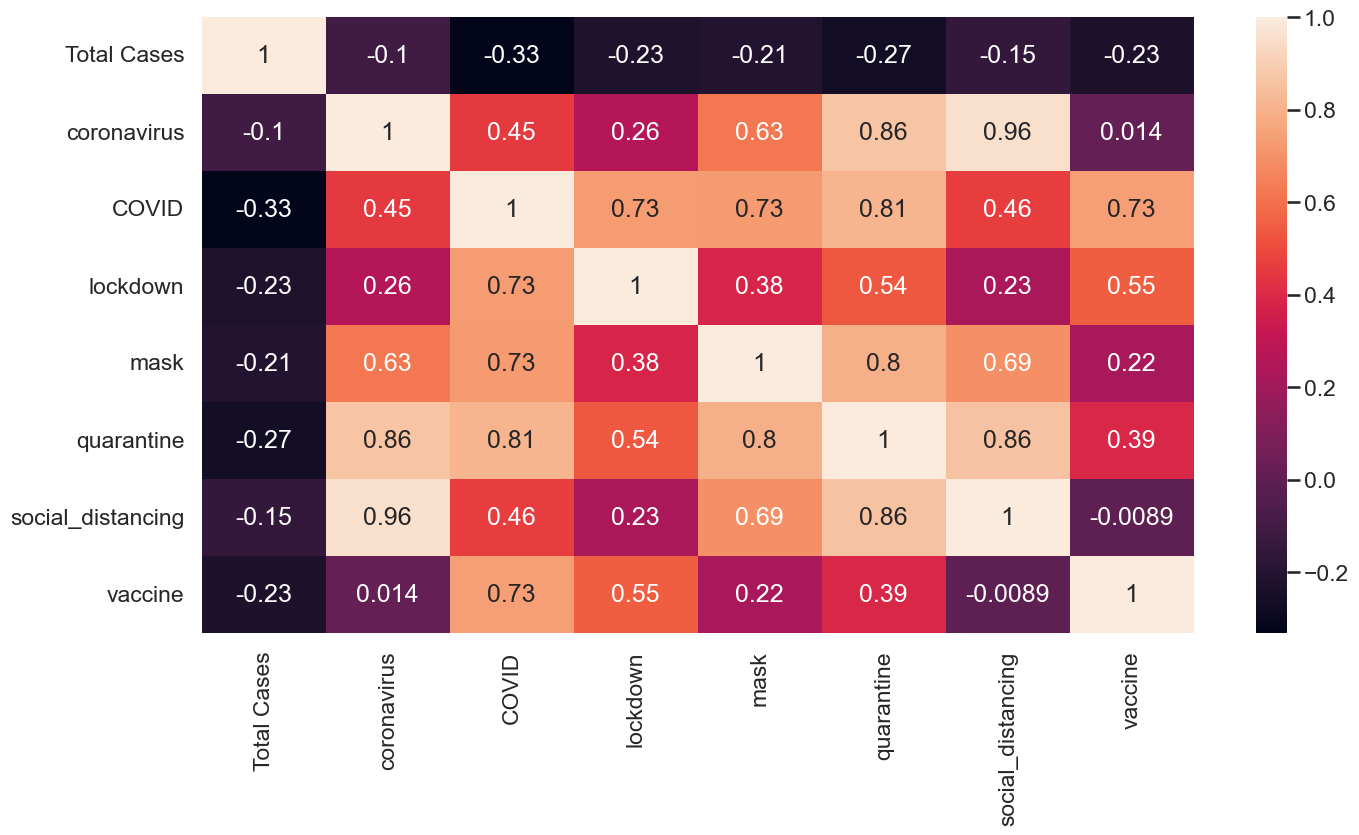

In [139]:
corr_matrix = df_COVID_terms.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [140]:
df_COVID_terms_pre_COVID = df_COVID_terms_pre_COVID.drop(columns=['month','year','week'])

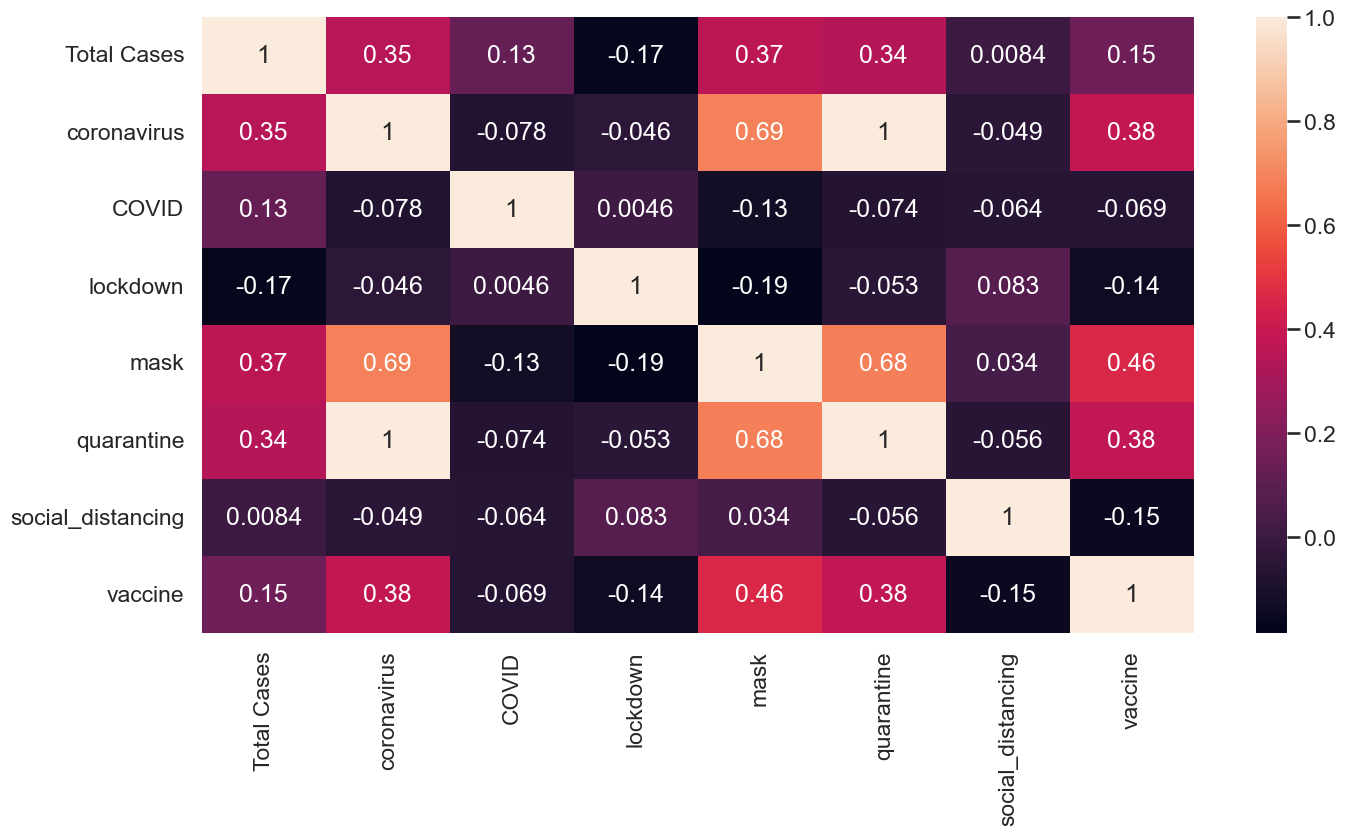

In [141]:
corr_matrix = df_COVID_terms_pre_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [142]:
df_COVID_terms_COVID = df_COVID_terms_COVID.drop(columns=['month','year','week'])

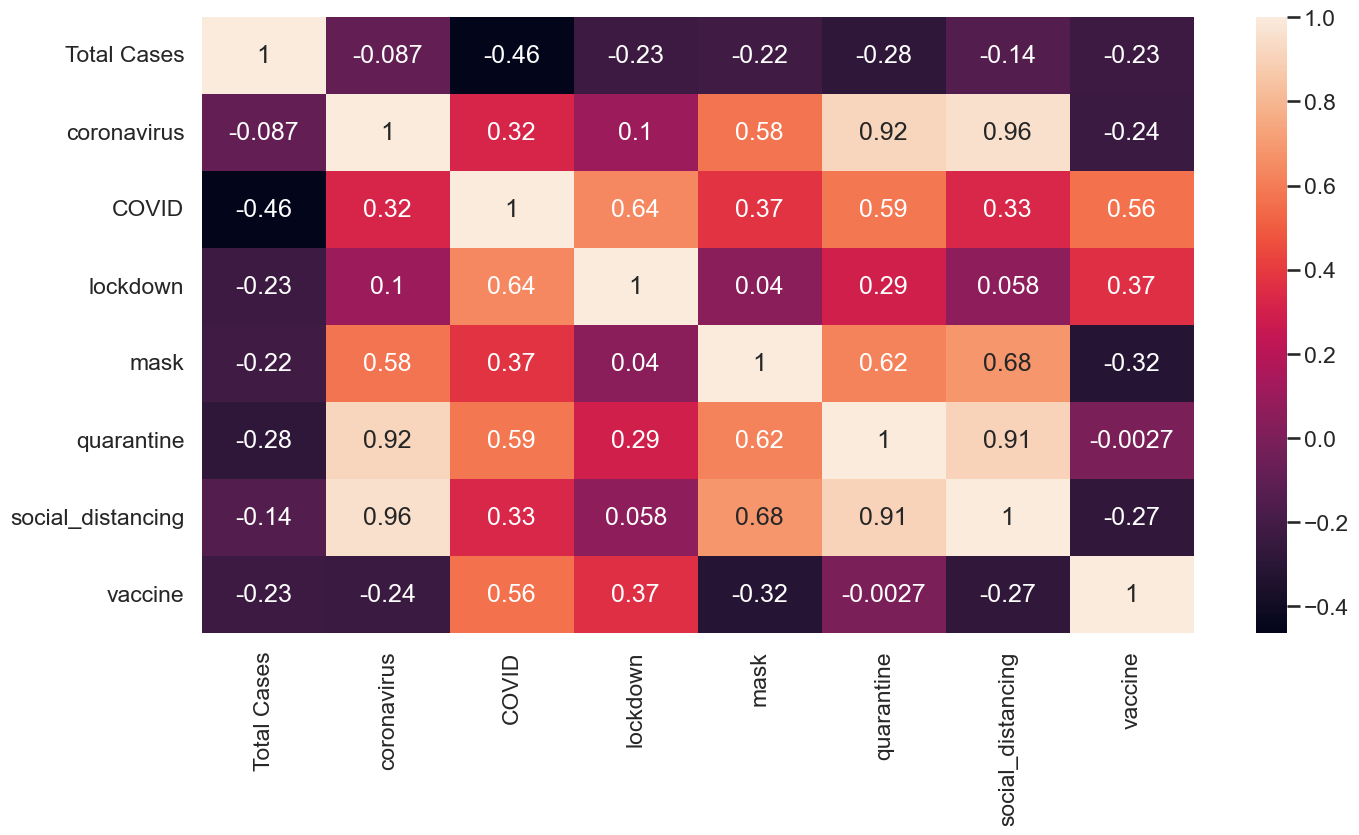

In [143]:
corr_matrix = df_COVID_terms_COVID.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Date Time, Lag, Window Features

In [144]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

In [145]:
df_flu

Total Cases
Week Ending             
2015-09-05           9.0
2015-09-12          18.0
2015-09-19          15.0
2015-09-26          29.0
2015-10-03          59.0
...                  ...
2022-11-05        2407.0
2022-11-12        4144.0
2022-11-19        5460.0
2022-11-26        7773.0
2022-12-03           NaN

[379 rows x 1 columns]

In [146]:
# add next three weeks to predict as well

df_flu['y2'] = df_flu['Total Cases'].shift(-1)
df_flu['y3'] = df_flu['Total Cases'].shift(-2)
df_flu['y4'] = df_flu['Total Cases'].shift(-3)

In [147]:
df_flu.rename(columns={'Total Cases':'y1'}, inplace=True)
df_flu

y1      y2      y3      y4
Week Ending                                
2015-09-05      9.0    18.0    15.0    29.0
2015-09-12     18.0    15.0    29.0    59.0
2015-09-19     15.0    29.0    59.0    50.0
2015-09-26     29.0    59.0    50.0    37.0
2015-10-03     59.0    50.0    37.0    26.0
...             ...     ...     ...     ...
2022-11-05   2407.0  4144.0  5460.0  7773.0
2022-11-12   4144.0  5460.0  7773.0     NaN
2022-11-19   5460.0  7773.0     NaN     NaN
2022-11-26   7773.0     NaN     NaN     NaN
2022-12-03      NaN     NaN     NaN     NaN

[379 rows x 4 columns]

In [148]:
df_flu['year'] = df_flu.index.year
df_flu['month'] = df_flu.index.month
df_flu['week'] = df_flu.index.isocalendar().week

In [ ]:
sns.set()
sns.set_context(context='talk')
plt.rcParams['figure.figsize'] = [20,10]

In [175]:
def target_rel(data, feature, feature_title=None, color=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Mean Weekly Cases by {feature_title}')

    sns.barplot(ax=axes[0], data=data, x=feature, y='y1', color=color)
    sns.stripplot(ax=axes[1], data=data,x=feature, y='y1', alpha = 0.3)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylabel('cases')
    axes[0].set_xlabel(feature)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylabel('')
    axes[1].set_xlabel(feature)

In [177]:
df_flu = df_flu[df_flu['year'] != 2015]

In [179]:
df_flu

y1      y2      y3      y4  year  month  week
Week Ending                                                   
2016-01-02    183.0   314.0   375.0   645.0  2016      1    53
2016-01-09    314.0   375.0   645.0   933.0  2016      1     1
2016-01-16    375.0   645.0   933.0  1386.0  2016      1     2
2016-01-23    645.0   933.0  1386.0  2067.0  2016      1     3
2016-01-30    933.0  1386.0  2067.0  2484.0  2016      1     4
...             ...     ...     ...     ...   ...    ...   ...
2022-11-05   2407.0  4144.0  5460.0  7773.0  2022     11    44
2022-11-12   4144.0  5460.0  7773.0     NaN  2022     11    45
2022-11-19   5460.0  7773.0     NaN     NaN  2022     11    46
2022-11-26   7773.0     NaN     NaN     NaN  2022     11    47
2022-12-03      NaN     NaN     NaN     NaN  2022     12    48

[362 rows x 7 columns]

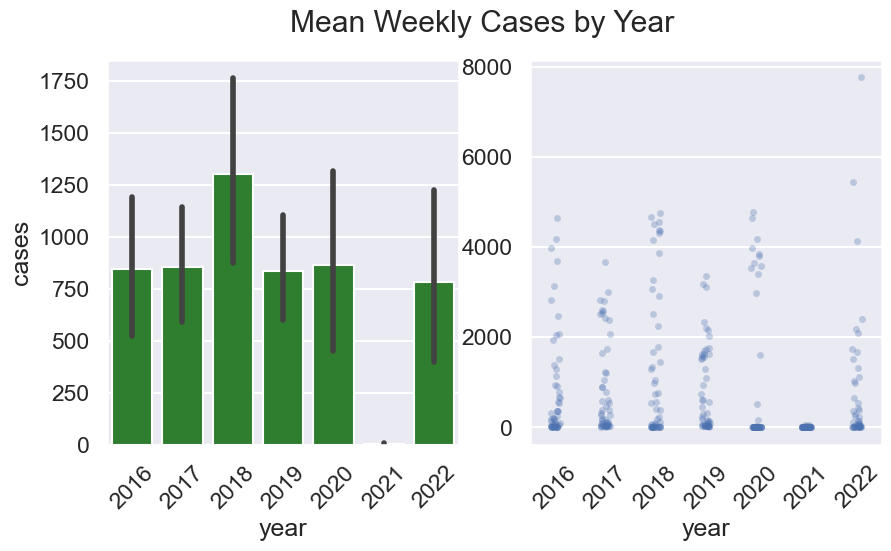

In [185]:
target_rel(df_flu, feature='year', feature_title='Year', color='forestgreen')

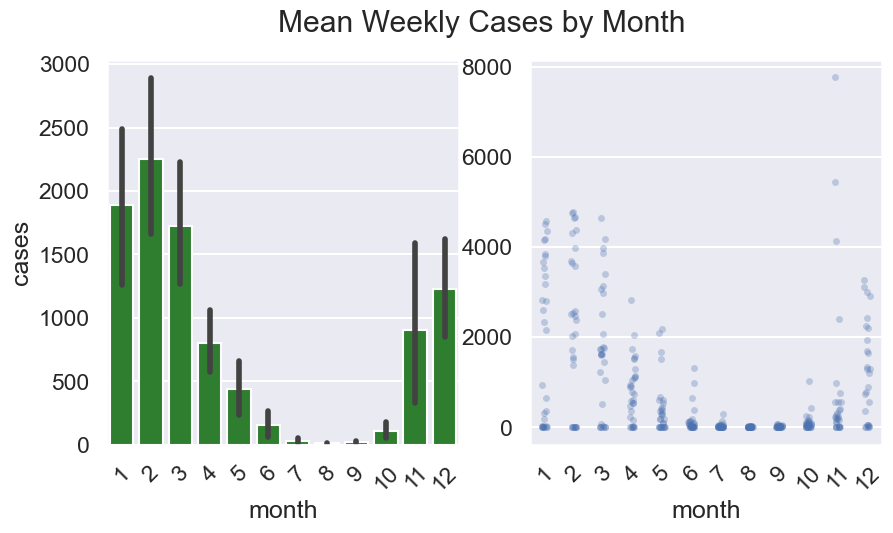

In [180]:
target_rel(df_flu, feature='month', feature_title='Month', color='forestgreen')

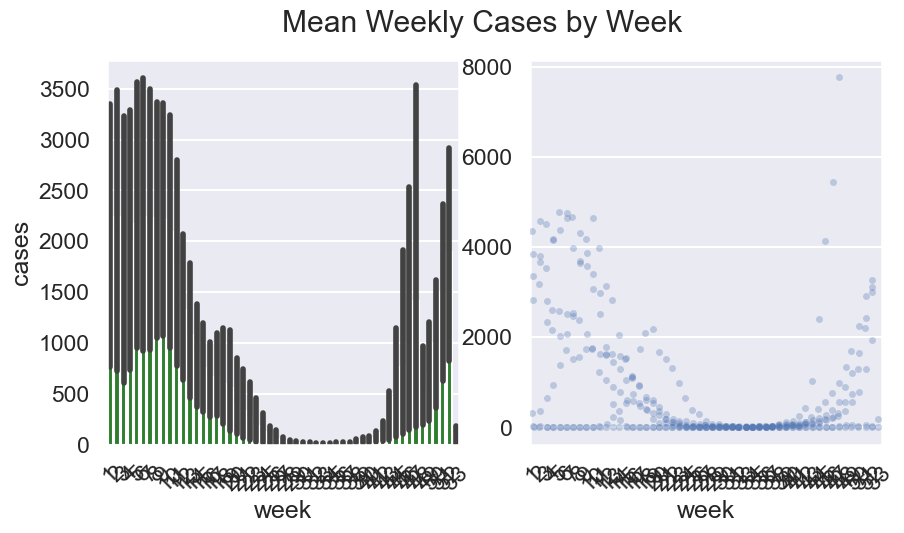

In [181]:
target_rel(df_flu, feature='week', feature_title='Week', color='forestgreen')

In [183]:
season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_flu["season"] = df_flu["month"].map(season_dict)

C:\Users\User\AppData\Local\Temp\ipykernel_20536\2662878972.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flu["season"] = df_flu["month"].map(season_dict)


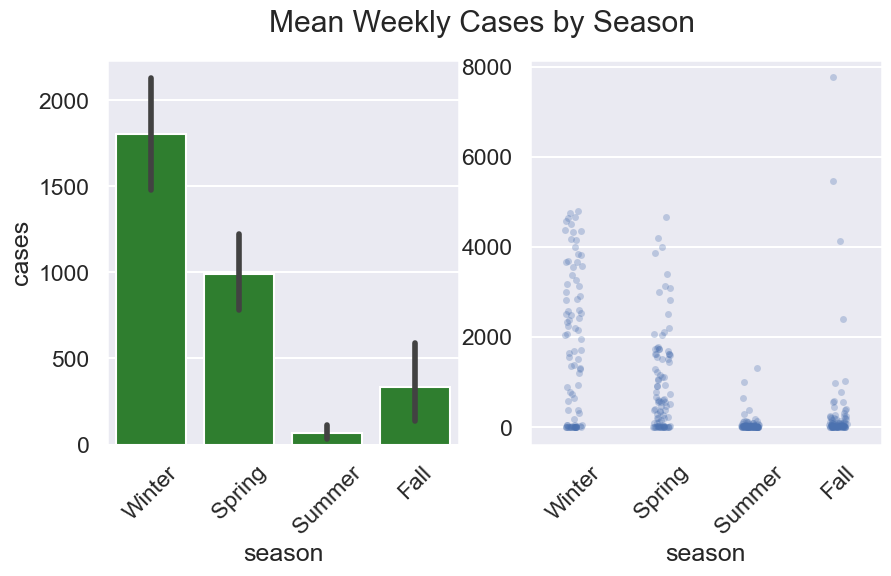

In [184]:
target_rel(df_flu, feature='season', feature_title='Season', color='forestgreen')

In [30]:
# include 7 lag features based on autocorrelation plot showing significant autocorrelation for 7 previous values

arr_list = []
for i in range(1,8):
    arr_list.append(df_flu['y1'].shift(i).to_numpy())
print(len(arr_list))
print(arr_list[0].shape)

7
(377,)


In [31]:
col_names = [*range(1,8)]
print(col_names)
print(len(col_names))

[1, 2, 3, 4, 5, 6, 7]
7


In [32]:
new_col_names = []
for name in col_names:
    name = 't - ' + str(name)
    new_col_names.append(name)
new_col_names

['t - 1', 't - 2', 't - 3', 't - 4', 't - 5', 't - 6', 't - 7']

In [33]:
df = pd.DataFrame.from_dict(dict(zip(new_col_names, arr_list)))

In [34]:
df

t - 1   t - 2   t - 3  t - 4  t - 5  t - 6  t - 7
0       NaN     NaN     NaN    NaN    NaN    NaN    NaN
1       9.0     NaN     NaN    NaN    NaN    NaN    NaN
2      18.0     9.0     NaN    NaN    NaN    NaN    NaN
3      15.0    18.0     9.0    NaN    NaN    NaN    NaN
4      29.0    15.0    18.0    9.0    NaN    NaN    NaN
..      ...     ...     ...    ...    ...    ...    ...
372   251.0   149.0   124.0   84.0   33.0   20.0   27.0
373   438.0   251.0   149.0  124.0   84.0   33.0   20.0
374  1031.0   438.0   251.0  149.0  124.0   84.0   33.0
375  2407.0  1031.0   438.0  251.0  149.0  124.0   84.0
376  4144.0  2407.0  1031.0  438.0  251.0  149.0  124.0

[377 rows x 7 columns]

In [35]:
df_flu = df_flu.reset_index()

In [36]:
df_flu

Week Ending      y1      y2      y3      y4  year  month  week season
0    2015-09-05     9.0    18.0    15.0    29.0  2015      9    36   Fall
1    2015-09-12    18.0    15.0    29.0    59.0  2015      9    37   Fall
2    2015-09-19    15.0    29.0    59.0    50.0  2015      9    38   Fall
3    2015-09-26    29.0    59.0    50.0    37.0  2015      9    39   Fall
4    2015-10-03    59.0    50.0    37.0    26.0  2015     10    40   Fall
..          ...     ...     ...     ...     ...   ...    ...   ...    ...
372  2022-10-22   438.0  1031.0  2407.0  4144.0  2022     10    42   Fall
373  2022-10-29  1031.0  2407.0  4144.0  5460.0  2022     10    43   Fall
374  2022-11-05  2407.0  4144.0  5460.0     NaN  2022     11    44   Fall
375  2022-11-12  4144.0  5460.0     NaN     NaN  2022     11    45   Fall
376  2022-11-19  5460.0     NaN     NaN     NaN  2022     11    46   Fall

[377 rows x 9 columns]

In [37]:
df_flu = pd.concat([df_flu, df], axis=1)

In [38]:
df_flu

Week Ending      y1      y2      y3      y4  year  month  week season  \
0    2015-09-05     9.0    18.0    15.0    29.0  2015      9    36   Fall   
1    2015-09-12    18.0    15.0    29.0    59.0  2015      9    37   Fall   
2    2015-09-19    15.0    29.0    59.0    50.0  2015      9    38   Fall   
3    2015-09-26    29.0    59.0    50.0    37.0  2015      9    39   Fall   
4    2015-10-03    59.0    50.0    37.0    26.0  2015     10    40   Fall   
..          ...     ...     ...     ...     ...   ...    ...   ...    ...   
372  2022-10-22   438.0  1031.0  2407.0  4144.0  2022     10    42   Fall   
373  2022-10-29  1031.0  2407.0  4144.0  5460.0  2022     10    43   Fall   
374  2022-11-05  2407.0  4144.0  5460.0     NaN  2022     11    44   Fall   
375  2022-11-12  4144.0  5460.0     NaN     NaN  2022     11    45   Fall   
376  2022-11-19  5460.0     NaN     NaN     NaN  2022     11    46   Fall   

      t - 1   t - 2   t - 3  t - 4  t - 5  t - 6  t - 7  
0       NaN     NaN     NaN    NaN    NaN    NaN    NaN  
1       9.0     NaN     NaN    NaN    NaN    NaN    NaN  
2      18.0     9.0     NaN    NaN    NaN    NaN    NaN  
3      15.0    18.0     9.0    NaN    NaN    NaN    NaN  
4      29.0    15.0    18.0    9.0    NaN    NaN    NaN  
..      ...     ...     ...    ...    ...    ...    ...  
372   251.0   149.0   124.0   84.0   33.0   20.0   27.0  
373   438.0   251.0   149.0  124.0   84.0   33.0   20.0  
374  1031.0   438.0   251.0  149.0  124.0   84.0   33.0  
375  2407.0  1031.0   438.0  251.0  149.0  124.0   84.0  
376  4144.0  2407.0  1031.0  438.0  251.0  149.0  124.0  

[377 rows x 16 columns]

In [39]:
df_flu['this week last year'] = df_flu['y1'].shift(52)

In [40]:
df_flu.head()

Week Ending    y1    y2    y3    y4  year  month  week season  t - 1  t - 2  \
0  2015-09-05   9.0  18.0  15.0  29.0  2015      9    36   Fall    NaN    NaN   
1  2015-09-12  18.0  15.0  29.0  59.0  2015      9    37   Fall    9.0    NaN   
2  2015-09-19  15.0  29.0  59.0  50.0  2015      9    38   Fall   18.0    9.0   
3  2015-09-26  29.0  59.0  50.0  37.0  2015      9    39   Fall   15.0   18.0   
4  2015-10-03  59.0  50.0  37.0  26.0  2015     10    40   Fall   29.0   15.0   

   t - 3  t - 4  t - 5  t - 6  t - 7  this week last year  
0    NaN    NaN    NaN    NaN    NaN                  NaN  
1    NaN    NaN    NaN    NaN    NaN                  NaN  
2    NaN    NaN    NaN    NaN    NaN                  NaN  
3    9.0    NaN    NaN    NaN    NaN                  NaN  
4   18.0    9.0    NaN    NaN    NaN                  NaN

In [41]:
# use 2-week moving average based on EDA - simplifies the pattern without losing too much data

df_flu['two-week moving average'] = df_flu['t - 1'].rolling(window=2).mean()

In [42]:
df_flu

Week Ending      y1      y2      y3      y4  year  month  week season  \
0    2015-09-05     9.0    18.0    15.0    29.0  2015      9    36   Fall   
1    2015-09-12    18.0    15.0    29.0    59.0  2015      9    37   Fall   
2    2015-09-19    15.0    29.0    59.0    50.0  2015      9    38   Fall   
3    2015-09-26    29.0    59.0    50.0    37.0  2015      9    39   Fall   
4    2015-10-03    59.0    50.0    37.0    26.0  2015     10    40   Fall   
..          ...     ...     ...     ...     ...   ...    ...   ...    ...   
372  2022-10-22   438.0  1031.0  2407.0  4144.0  2022     10    42   Fall   
373  2022-10-29  1031.0  2407.0  4144.0  5460.0  2022     10    43   Fall   
374  2022-11-05  2407.0  4144.0  5460.0     NaN  2022     11    44   Fall   
375  2022-11-12  4144.0  5460.0     NaN     NaN  2022     11    45   Fall   
376  2022-11-19  5460.0     NaN     NaN     NaN  2022     11    46   Fall   

      t - 1   t - 2   t - 3  t - 4  t - 5  t - 6  t - 7  this week last year  \
0       NaN     NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
1       9.0     NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
2      18.0     9.0     NaN    NaN    NaN    NaN    NaN                  NaN   
3      15.0    18.0     9.0    NaN    NaN    NaN    NaN                  NaN   
4      29.0    15.0    18.0    9.0    NaN    NaN    NaN                  NaN   
..      ...     ...     ...    ...    ...    ...    ...                  ...   
372   251.0   149.0   124.0   84.0   33.0   20.0   27.0                  4.0   
373   438.0   251.0   149.0  124.0   84.0   33.0   20.0                  6.0   
374  1031.0   438.0   251.0  149.0  124.0   84.0   33.0                 19.0   
375  2407.0  1031.0   438.0  251.0  149.0  124.0   84.0                 20.0   
376  4144.0  2407.0  1031.0  438.0  251.0  149.0  124.0                 20.0   

     two-week moving average  
0                        NaN  
1                        NaN  
2                       13.5  
3                       16.5  
4                       22.0  
..                       ...  
372                    200.0  
373                    344.5  
374                    734.5  
375                   1719.0  
376                   3275.5  

[377 rows x 18 columns]

In [43]:
df_flu['expanding mean'] = df_flu['t - 1'].expanding().mean()

In [44]:
df_flu.head(10)

Week Ending    y1    y2    y3    y4  year  month  week season  t - 1  t - 2  \
0  2015-09-05   9.0  18.0  15.0  29.0  2015      9    36   Fall    NaN    NaN   
1  2015-09-12  18.0  15.0  29.0  59.0  2015      9    37   Fall    9.0    NaN   
2  2015-09-19  15.0  29.0  59.0  50.0  2015      9    38   Fall   18.0    9.0   
3  2015-09-26  29.0  59.0  50.0  37.0  2015      9    39   Fall   15.0   18.0   
4  2015-10-03  59.0  50.0  37.0  26.0  2015     10    40   Fall   29.0   15.0   
5  2015-10-10  50.0  37.0  26.0  26.0  2015     10    41   Fall   59.0   29.0   
6  2015-10-17  37.0  26.0  26.0  40.0  2015     10    42   Fall   50.0   59.0   
7  2015-10-24  26.0  26.0  40.0  45.0  2015     10    43   Fall   37.0   50.0   
8  2015-10-31  26.0  40.0  45.0  53.0  2015     10    44   Fall   26.0   37.0   
9  2015-11-07  40.0  45.0  53.0  52.0  2015     11    45   Fall   26.0   26.0   

   t - 3  t - 4  t - 5  t - 6  t - 7  this week last year  \
0    NaN    NaN    NaN    NaN    NaN                  NaN   
1    NaN    NaN    NaN    NaN    NaN                  NaN   
2    NaN    NaN    NaN    NaN    NaN                  NaN   
3    9.0    NaN    NaN    NaN    NaN                  NaN   
4   18.0    9.0    NaN    NaN    NaN                  NaN   
5   15.0   18.0    9.0    NaN    NaN                  NaN   
6   29.0   15.0   18.0    9.0    NaN                  NaN   
7   59.0   29.0   15.0   18.0    9.0                  NaN   
8   50.0   59.0   29.0   15.0   18.0                  NaN   
9   37.0   50.0   59.0   29.0   15.0                  NaN   

   two-week moving average  expanding mean  
0                      NaN             NaN  
1                      NaN        9.000000  
2                     13.5       13.500000  
3                     16.5       14.000000  
4                     22.0       17.750000  
5                     44.0       26.000000  
6                     54.5       30.000000  
7                     43.5       31.000000  
8                     31.5       30.375000  
9                     26.0       29.888889

In [45]:
# df_flu.dropna(inplace=True)

In [46]:
df_flu

Week Ending      y1      y2      y3      y4  year  month  week season  \
0    2015-09-05     9.0    18.0    15.0    29.0  2015      9    36   Fall   
1    2015-09-12    18.0    15.0    29.0    59.0  2015      9    37   Fall   
2    2015-09-19    15.0    29.0    59.0    50.0  2015      9    38   Fall   
3    2015-09-26    29.0    59.0    50.0    37.0  2015      9    39   Fall   
4    2015-10-03    59.0    50.0    37.0    26.0  2015     10    40   Fall   
..          ...     ...     ...     ...     ...   ...    ...   ...    ...   
372  2022-10-22   438.0  1031.0  2407.0  4144.0  2022     10    42   Fall   
373  2022-10-29  1031.0  2407.0  4144.0  5460.0  2022     10    43   Fall   
374  2022-11-05  2407.0  4144.0  5460.0     NaN  2022     11    44   Fall   
375  2022-11-12  4144.0  5460.0     NaN     NaN  2022     11    45   Fall   
376  2022-11-19  5460.0     NaN     NaN     NaN  2022     11    46   Fall   

      t - 1   t - 2   t - 3  t - 4  t - 5  t - 6  t - 7  this week last year  \
0       NaN     NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
1       9.0     NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
2      18.0     9.0     NaN    NaN    NaN    NaN    NaN                  NaN   
3      15.0    18.0     9.0    NaN    NaN    NaN    NaN                  NaN   
4      29.0    15.0    18.0    9.0    NaN    NaN    NaN                  NaN   
..      ...     ...     ...    ...    ...    ...    ...                  ...   
372   251.0   149.0   124.0   84.0   33.0   20.0   27.0                  4.0   
373   438.0   251.0   149.0  124.0   84.0   33.0   20.0                  6.0   
374  1031.0   438.0   251.0  149.0  124.0   84.0   33.0                 19.0   
375  2407.0  1031.0   438.0  251.0  149.0  124.0   84.0                 20.0   
376  4144.0  2407.0  1031.0  438.0  251.0  149.0  124.0                 20.0   

     two-week moving average  expanding mean  
0                        NaN             NaN  
1                        NaN        9.000000  
2                       13.5       13.500000  
3                       16.5       14.000000  
4                       22.0       17.750000  
..                       ...             ...  
372                    200.0      707.110215  
373                    344.5      706.388740  
374                    734.5      707.256684  
375                   1719.0      711.789333  
376                   3275.5      720.917553  

[377 rows x 19 columns]

In [47]:
df_flu.drop(columns='week', inplace=True)
df_flu

Week Ending      y1      y2      y3      y4  year  month season   t - 1  \
0    2015-09-05     9.0    18.0    15.0    29.0  2015      9   Fall     NaN   
1    2015-09-12    18.0    15.0    29.0    59.0  2015      9   Fall     9.0   
2    2015-09-19    15.0    29.0    59.0    50.0  2015      9   Fall    18.0   
3    2015-09-26    29.0    59.0    50.0    37.0  2015      9   Fall    15.0   
4    2015-10-03    59.0    50.0    37.0    26.0  2015     10   Fall    29.0   
..          ...     ...     ...     ...     ...   ...    ...    ...     ...   
372  2022-10-22   438.0  1031.0  2407.0  4144.0  2022     10   Fall   251.0   
373  2022-10-29  1031.0  2407.0  4144.0  5460.0  2022     10   Fall   438.0   
374  2022-11-05  2407.0  4144.0  5460.0     NaN  2022     11   Fall  1031.0   
375  2022-11-12  4144.0  5460.0     NaN     NaN  2022     11   Fall  2407.0   
376  2022-11-19  5460.0     NaN     NaN     NaN  2022     11   Fall  4144.0   

      t - 2   t - 3  t - 4  t - 5  t - 6  t - 7  this week last year  \
0       NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
1       NaN     NaN    NaN    NaN    NaN    NaN                  NaN   
2       9.0     NaN    NaN    NaN    NaN    NaN                  NaN   
3      18.0     9.0    NaN    NaN    NaN    NaN                  NaN   
4      15.0    18.0    9.0    NaN    NaN    NaN                  NaN   
..      ...     ...    ...    ...    ...    ...                  ...   
372   149.0   124.0   84.0   33.0   20.0   27.0                  4.0   
373   251.0   149.0  124.0   84.0   33.0   20.0                  6.0   
374   438.0   251.0  149.0  124.0   84.0   33.0                 19.0   
375  1031.0   438.0  251.0  149.0  124.0   84.0                 20.0   
376  2407.0  1031.0  438.0  251.0  149.0  124.0                 20.0   

     two-week moving average  expanding mean  
0                        NaN             NaN  
1                        NaN        9.000000  
2                       13.5       13.500000  
3                       16.5       14.000000  
4                       22.0       17.750000  
..                       ...             ...  
372                    200.0      707.110215  
373                    344.5      706.388740  
374                    734.5      707.256684  
375                   1719.0      711.789333  
376                   3275.5      720.917553  

[377 rows x 18 columns]

In [48]:
cat_feats = df_flu[['year','month','season']].astype(str)

In [49]:
cat_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    377 non-null    object
 1   month   377 non-null    object
 2   season  377 non-null    object
dtypes: object(3)
memory usage: 9.0+ KB


In [50]:
dummies = pd.get_dummies(cat_feats)

In [51]:
df_flu = pd.concat([df_flu, dummies], axis=1)

In [52]:
df_flu_pre_COVID = df_flu[df_flu['Week Ending'] < pd.to_datetime('2020-03-01')]
df_flu_COVID = df_flu[df_flu['Week Ending'] >= pd.to_datetime('2020-03-01')]

In [53]:
df_flu.drop(columns=['year','month','season','Week Ending'], inplace=True)
df_flu_pre_COVID.drop(columns=['year','month','season','Week Ending'], inplace=True)
df_flu_COVID.drop(columns=['year','month','season','Week Ending'], inplace=True)
df_flu

C:\Users\User\AppData\Local\Temp\ipykernel_15992\2465620730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flu_pre_COVID.drop(columns=['year','month','season','Week Ending'], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15992\2465620730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flu_COVID.drop(columns=['year','month','season','Week Ending'], inplace=True)


y1      y2      y3      y4   t - 1   t - 2   t - 3  t - 4  t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN    NaN    NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN    NaN    NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN    NaN    NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0    NaN    NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0    9.0    NaN   
..      ...     ...     ...     ...     ...     ...     ...    ...    ...   
372   438.0  1031.0  2407.0  4144.0   251.0   149.0   124.0   84.0   33.0   
373  1031.0  2407.0  4144.0  5460.0   438.0   251.0   149.0  124.0   84.0   
374  2407.0  4144.0  5460.0     NaN  1031.0   438.0   251.0  149.0  124.0   
375  4144.0  5460.0     NaN     NaN  2407.0  1031.0   438.0  251.0  149.0   
376  5460.0     NaN     NaN     NaN  4144.0  2407.0  1031.0  438.0  251.0   

     t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0      NaN  ...        0        0        0        0        0        1   
1      NaN  ...        0        0        0        0        0        1   
2      NaN  ...        0        0        0        0        0        1   
3      NaN  ...        0        0        0        0        0        1   
4      NaN  ...        0        0        0        0        0        0   
..     ...  ...      ...      ...      ...      ...      ...      ...   
372   20.0  ...        0        0        0        0        0        0   
373   33.0  ...        0        0        0        0        0        0   
374   84.0  ...        0        0        0        0        0        0   
375  124.0  ...        0        0        0        0        0        0   
376  149.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              1              0              0              0  
1              1              0              0              0  
2              1              0              0              0  
3              1              0              0              0  
4              1              0              0              0  
..           ...            ...            ...            ...  
372            1              0              0              0  
373            1              0              0              0  
374            1              0              0              0  
375            1              0              0              0  
376            1              0              0              0  

[377 rows x 38 columns]

In [54]:
df_flu_pre_COVID

y1      y2      y3      y4   t - 1   t - 2   t - 3   t - 4   t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN     NaN     NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN     NaN     NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN     NaN     NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0     NaN     NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0     9.0     NaN   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
230  4789.0  4654.0  3989.0  3656.0  4182.0  3549.0  3811.0  3845.0  3126.0   
231  4654.0  3989.0  3656.0  3576.0  4789.0  4182.0  3549.0  3811.0  3845.0   
232  3989.0  3656.0  3576.0  3404.0  4654.0  4789.0  4182.0  3549.0  3811.0   
233  3656.0  3576.0  3404.0  2991.0  3989.0  4654.0  4789.0  4182.0  3549.0   
234  3576.0  3404.0  2991.0  1619.0  3656.0  3989.0  4654.0  4789.0  4182.0   

      t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       NaN  ...        0        0        0        0        0        1   
1       NaN  ...        0        0        0        0        0        1   
2       NaN  ...        0        0        0        0        0        1   
3       NaN  ...        0        0        0        0        0        1   
4       NaN  ...        0        0        0        0        0        0   
..      ...  ...      ...      ...      ...      ...      ...      ...   
230  2206.0  ...        0        0        0        0        0        0   
231  3126.0  ...        0        0        0        0        0        0   
232  3845.0  ...        0        0        0        0        0        0   
233  3811.0  ...        0        0        0        0        0        0   
234  3549.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              1              0              0              0  
1              1              0              0              0  
2              1              0              0              0  
3              1              0              0              0  
4              1              0              0              0  
..           ...            ...            ...            ...  
230            0              0              0              1  
231            0              0              0              1  
232            0              0              0              1  
233            0              0              0              1  
234            0              0              0              1  

[235 rows x 38 columns]

In [55]:
df_flu_COVID

y1      y2      y3      y4   t - 1   t - 2   t - 3   t - 4   t - 5  \
235  3404.0  2991.0  1619.0   512.0  3576.0  3656.0  3989.0  4654.0  4789.0   
236  2991.0  1619.0   512.0   161.0  3404.0  3576.0  3656.0  3989.0  4654.0   
237  1619.0   512.0   161.0    41.0  2991.0  3404.0  3576.0  3656.0  3989.0   
238   512.0   161.0    41.0    15.0  1619.0  2991.0  3404.0  3576.0  3656.0   
239   161.0    41.0    15.0    20.0   512.0  1619.0  2991.0  3404.0  3576.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
372   438.0  1031.0  2407.0  4144.0   251.0   149.0   124.0    84.0    33.0   
373  1031.0  2407.0  4144.0  5460.0   438.0   251.0   149.0   124.0    84.0   
374  2407.0  4144.0  5460.0     NaN  1031.0   438.0   251.0   149.0   124.0   
375  4144.0  5460.0     NaN     NaN  2407.0  1031.0   438.0   251.0   149.0   
376  5460.0     NaN     NaN     NaN  4144.0  2407.0  1031.0   438.0   251.0   

      t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
235  4182.0  ...        0        0        0        0        0        0   
236  4789.0  ...        0        0        0        0        0        0   
237  4654.0  ...        0        0        0        0        0        0   
238  3989.0  ...        0        0        0        0        0        0   
239  3656.0  ...        1        0        0        0        0        0   
..      ...  ...      ...      ...      ...      ...      ...      ...   
372    20.0  ...        0        0        0        0        0        0   
373    33.0  ...        0        0        0        0        0        0   
374    84.0  ...        0        0        0        0        0        0   
375   124.0  ...        0        0        0        0        0        0   
376   149.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
235            0              1              0              0  
236            0              1              0              0  
237            0              1              0              0  
238            0              1              0              0  
239            0              1              0              0  
..           ...            ...            ...            ...  
372            1              0              0              0  
373            1              0              0              0  
374            1              0              0              0  
375            1              0              0              0  
376            1              0              0              0  

[142 rows x 38 columns]

In [56]:
df_flu = df_flu.reset_index(drop=True)
df_flu

y1      y2      y3      y4   t - 1   t - 2   t - 3  t - 4  t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN    NaN    NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN    NaN    NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN    NaN    NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0    NaN    NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0    9.0    NaN   
..      ...     ...     ...     ...     ...     ...     ...    ...    ...   
372   438.0  1031.0  2407.0  4144.0   251.0   149.0   124.0   84.0   33.0   
373  1031.0  2407.0  4144.0  5460.0   438.0   251.0   149.0  124.0   84.0   
374  2407.0  4144.0  5460.0     NaN  1031.0   438.0   251.0  149.0  124.0   
375  4144.0  5460.0     NaN     NaN  2407.0  1031.0   438.0  251.0  149.0   
376  5460.0     NaN     NaN     NaN  4144.0  2407.0  1031.0  438.0  251.0   

     t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0      NaN  ...        0        0        0        0        0        1   
1      NaN  ...        0        0        0        0        0        1   
2      NaN  ...        0        0        0        0        0        1   
3      NaN  ...        0        0        0        0        0        1   
4      NaN  ...        0        0        0        0        0        0   
..     ...  ...      ...      ...      ...      ...      ...      ...   
372   20.0  ...        0        0        0        0        0        0   
373   33.0  ...        0        0        0        0        0        0   
374   84.0  ...        0        0        0        0        0        0   
375  124.0  ...        0        0        0        0        0        0   
376  149.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              1              0              0              0  
1              1              0              0              0  
2              1              0              0              0  
3              1              0              0              0  
4              1              0              0              0  
..           ...            ...            ...            ...  
372            1              0              0              0  
373            1              0              0              0  
374            1              0              0              0  
375            1              0              0              0  
376            1              0              0              0  

[377 rows x 38 columns]

In [57]:
df_flu_pre_COVID = df_flu_pre_COVID.reset_index(drop=True)
df_flu_pre_COVID

y1      y2      y3      y4   t - 1   t - 2   t - 3   t - 4   t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN     NaN     NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN     NaN     NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN     NaN     NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0     NaN     NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0     9.0     NaN   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
230  4789.0  4654.0  3989.0  3656.0  4182.0  3549.0  3811.0  3845.0  3126.0   
231  4654.0  3989.0  3656.0  3576.0  4789.0  4182.0  3549.0  3811.0  3845.0   
232  3989.0  3656.0  3576.0  3404.0  4654.0  4789.0  4182.0  3549.0  3811.0   
233  3656.0  3576.0  3404.0  2991.0  3989.0  4654.0  4789.0  4182.0  3549.0   
234  3576.0  3404.0  2991.0  1619.0  3656.0  3989.0  4654.0  4789.0  4182.0   

      t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       NaN  ...        0        0        0        0        0        1   
1       NaN  ...        0        0        0        0        0        1   
2       NaN  ...        0        0        0        0        0        1   
3       NaN  ...        0        0        0        0        0        1   
4       NaN  ...        0        0        0        0        0        0   
..      ...  ...      ...      ...      ...      ...      ...      ...   
230  2206.0  ...        0        0        0        0        0        0   
231  3126.0  ...        0        0        0        0        0        0   
232  3845.0  ...        0        0        0        0        0        0   
233  3811.0  ...        0        0        0        0        0        0   
234  3549.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              1              0              0              0  
1              1              0              0              0  
2              1              0              0              0  
3              1              0              0              0  
4              1              0              0              0  
..           ...            ...            ...            ...  
230            0              0              0              1  
231            0              0              0              1  
232            0              0              0              1  
233            0              0              0              1  
234            0              0              0              1  

[235 rows x 38 columns]

In [58]:
df_flu_COVID = df_flu_COVID.reset_index(drop=True)
df_flu_COVID

y1      y2      y3      y4   t - 1   t - 2   t - 3   t - 4   t - 5  \
0    3404.0  2991.0  1619.0   512.0  3576.0  3656.0  3989.0  4654.0  4789.0   
1    2991.0  1619.0   512.0   161.0  3404.0  3576.0  3656.0  3989.0  4654.0   
2    1619.0   512.0   161.0    41.0  2991.0  3404.0  3576.0  3656.0  3989.0   
3     512.0   161.0    41.0    15.0  1619.0  2991.0  3404.0  3576.0  3656.0   
4     161.0    41.0    15.0    20.0   512.0  1619.0  2991.0  3404.0  3576.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
137   438.0  1031.0  2407.0  4144.0   251.0   149.0   124.0    84.0    33.0   
138  1031.0  2407.0  4144.0  5460.0   438.0   251.0   149.0   124.0    84.0   
139  2407.0  4144.0  5460.0     NaN  1031.0   438.0   251.0   149.0   124.0   
140  4144.0  5460.0     NaN     NaN  2407.0  1031.0   438.0   251.0   149.0   
141  5460.0     NaN     NaN     NaN  4144.0  2407.0  1031.0   438.0   251.0   

      t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0    4182.0  ...        0        0        0        0        0        0   
1    4789.0  ...        0        0        0        0        0        0   
2    4654.0  ...        0        0        0        0        0        0   
3    3989.0  ...        0        0        0        0        0        0   
4    3656.0  ...        1        0        0        0        0        0   
..      ...  ...      ...      ...      ...      ...      ...      ...   
137    20.0  ...        0        0        0        0        0        0   
138    33.0  ...        0        0        0        0        0        0   
139    84.0  ...        0        0        0        0        0        0   
140   124.0  ...        0        0        0        0        0        0   
141   149.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              0              1              0              0  
1              0              1              0              0  
2              0              1              0              0  
3              0              1              0              0  
4              0              1              0              0  
..           ...            ...            ...            ...  
137            1              0              0              0  
138            1              0              0              0  
139            1              0              0              0  
140            1              0              0              0  
141            1              0              0              0  

[142 rows x 38 columns]

In [59]:
df_flu_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [60]:
pickle.dump(df_flu, open(r"..\data\flu_cases\df_time_features.pkl", "wb" ))
pickle.dump(df_flu_pre_COVID, open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "wb" ))
pickle.dump(df_flu_COVID, open(r"..\data\flu_cases\df_time_features_COVID.pkl", "wb" ))

# Combining all Features into one Dataset

In [61]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_COVID_total.pkl", "rb" ))

df_health_indicators = pickle.load(open(r"..\data\health_indicators\df_health_indicators.pkl", "rb" ))
df_health_indicators_pre_COVID = pickle.load(open(r"..\data\health_indicators\df_health_indicators_pre_COVID.pkl", "rb" ))
df_health_indicators_COVID = pickle.load(open(r"..\data\health_indicators\df_health_indicators_COVID.pkl", "rb" ))

df_air_travel = pickle.load(open(r"..\data\mobility\df_air_travel.pkl", "rb" ))
df_air_travel_pre_COVID = pickle.load(open(r"..\data\mobility\df_air_travel_pre_COVID.pkl", "rb" ))
df_air_travel_COVID = pickle.load(open(r"..\data\mobility\df_air_travel_COVID.pkl", "rb" ))

df_urban_transit = pickle.load(open(r"..\data\mobility\df_urban_transit.pkl", "rb" ))
df_urban_transit_pre_COVID = pickle.load(open(r"..\data\mobility\df_urban_transit_pre_COVID.pkl", "rb" ))
df_urban_transit_COVID = pickle.load(open(r"..\data\mobility\df_urban_transit_COVID.pkl", "rb" ))

df_flu_symptoms = pickle.load(open(r"..\data\google_trend\df_flu_symptoms.pkl", "rb" ))
df_flu_symptoms_pre_COVID = pickle.load(open(r"..\data\google_trend\df_flu_symptoms_pre_COVID.pkl", "rb" ))
df_flu_symptoms_COVID = pickle.load(open(r"..\data\google_trend\df_flu_symptoms_COVID.pkl", "rb" ))

df_COVID_terms = pickle.load(open(r"..\data\google_trend\df_COVID_terms.pkl", "rb" ))
df_COVID_terms_pre_COVID = pickle.load(open(r"..\data\google_trend\df_COVID_terms_pre_COVID.pkl", "rb" ))
df_COVID_terms_COVID = pickle.load(open(r"..\data\google_trend\df_COVID_terms_COVID.pkl", "rb" ))

df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_COVID.pkl", "rb" ))

In [62]:
df_time_features

y1      y2      y3      y4   t - 1   t - 2   t - 3  t - 4  t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN    NaN    NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN    NaN    NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN    NaN    NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0    NaN    NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0    9.0    NaN   
..      ...     ...     ...     ...     ...     ...     ...    ...    ...   
372   438.0  1031.0  2407.0  4144.0   251.0   149.0   124.0   84.0   33.0   
373  1031.0  2407.0  4144.0  5460.0   438.0   251.0   149.0  124.0   84.0   
374  2407.0  4144.0  5460.0     NaN  1031.0   438.0   251.0  149.0  124.0   
375  4144.0  5460.0     NaN     NaN  2407.0  1031.0   438.0  251.0  149.0   
376  5460.0     NaN     NaN     NaN  4144.0  2407.0  1031.0  438.0  251.0   

     t - 6  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0      NaN  ...        0        0        0        0        0        1   
1      NaN  ...        0        0        0        0        0        1   
2      NaN  ...        0        0        0        0        0        1   
3      NaN  ...        0        0        0        0        0        1   
4      NaN  ...        0        0        0        0        0        0   
..     ...  ...      ...      ...      ...      ...      ...      ...   
372   20.0  ...        0        0        0        0        0        0   
373   33.0  ...        0        0        0        0        0        0   
374   84.0  ...        0        0        0        0        0        0   
375  124.0  ...        0        0        0        0        0        0   
376  149.0  ...        0        0        0        0        0        0   

     season_Fall  season_Spring  season_Summer  season_Winter  
0              1              0              0              0  
1              1              0              0              0  
2              1              0              0              0  
3              1              0              0              0  
4              1              0              0              0  
..           ...            ...            ...            ...  
372            1              0              0              0  
373            1              0              0              0  
374            1              0              0              0  
375            1              0              0              0  
376            1              0              0              0  

[377 rows x 38 columns]

In [63]:
df_time_features.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [64]:
df_flu = df_flu.reset_index()

In [65]:
df_list = [df_flu, df_health_indicators, df_air_travel, df_urban_transit, df_flu_symptoms, df_COVID_terms, df_time_features]

In [66]:
df = pd.concat(df_list, axis=1)

In [67]:
df

Week Ending  Total Cases  year  Total Cases  index  \
0    2015-09-05          9.0  2015          9.0   2015   
1    2015-09-12         18.0  2015         18.0   2015   
2    2015-09-19         15.0  2015         15.0   2015   
3    2015-09-26         29.0  2015         29.0   2015   
4    2015-10-03         59.0  2015         59.0   2015   
..          ...          ...   ...          ...    ...   
372  2022-10-22        438.0  2022        438.0   2022   
373  2022-10-29       1031.0  2022       1031.0   2022   
374  2022-11-05       2407.0  2022       2407.0   2022   
375  2022-11-12       4144.0  2022       4144.0   2022   
376  2022-11-19       5460.0  2022       5460.0   2022   

     Perceived health very good or excellent 13  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
..                                          ...   
372                                  19416200.0   
373                                  19416200.0   
374                                  19416200.0   
375                                  19416200.0   
376                                  19416200.0   

     Perceived health fair or poor 13  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
..                                ...   
372                         3702600.0   
373                         3702600.0   
374                         3702600.0   
375                         3702600.0   
376                         3702600.0   

     Perceived mental health very good or excellent 14  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
372                                         18653600.0   
373                                         18653600.0   
374                                         18653600.0   
375                                         18653600.0   
376                                         18653600.0   

     Perceived mental health fair or poor 14  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
..                                       ...   
372                                3713700.0   
373                                3713700.0   
374                                3713700.0   
375                                3713700.0   
376                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
0                                                  NaN                       
1                                                  NaN                       
2                                                  NaN                       
3                                                  NaN                       
4                                                  NaN                       
..                                                 ...                       
372                                          6605100.0                       
373                                          6605100.0                       
374                                          6605100.0                       
375                                          6605100.0                       
376                                          6605100.0               

In [68]:
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(columns=['year','month','week','index']).dropna()

In [69]:
df

Week Ending  Total Cases  Perceived health very good or excellent 13  \
78   2017-03-04       2078.0                                  18714100.0   
79   2017-03-11       1745.0                                  18714100.0   
80   2017-03-18       1231.0                                  18714100.0   
81   2017-03-25       1060.0                                  18714100.0   
82   2017-04-01        904.0                                  18714100.0   
..          ...          ...                                         ...   
360  2022-07-30         42.0                                  19416200.0   
361  2022-08-06         26.0                                  19416200.0   
362  2022-08-13         18.0                                  19416200.0   
363  2022-08-20         17.0                                  19416200.0   
364  2022-08-27         20.0                                  19416200.0   

     Perceived health fair or poor 13  \
78                          3443000.0   
79                          3443000.0   
80                          3443000.0   
81                          3443000.0   
82                          3443000.0   
..                                ...   
360                         3702600.0   
361                         3702600.0   
362                         3702600.0   
363                         3702600.0   
364                         3702600.0   

     Perceived mental health very good or excellent 14  \
78                                          21023500.0   
79                                          21023500.0   
80                                          21023500.0   
81                                          21023500.0   
82                                          21023500.0   
..                                                 ...   
360                                         18653600.0   
361                                         18653600.0   
362                                         18653600.0   
363                                         18653600.0   
364                                         18653600.0   

     Perceived mental health fair or poor 14  \
78                                 2053000.0   
79                                 2053000.0   
80                                 2053000.0   
81                                 2053000.0   
82                                 2053000.0   
..                                       ...   
360                                3713700.0   
361                                3713700.0   
362                                3713700.0   
363                                3713700.0   
364                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
78                                           6564200.0                       
79                                           6564200.0                       
80                                           6564200.0                       
81                                           6564200.0                       
82                                           6564200.0                       
..                                                 ...                       
360                                          6605100.0                       
361                                          6605100.0                       
362                                          6605100.0                       
363                                          6605100.0                       
364                                          6605100.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
78                                           9484900.0                                               
79                                           9484900.0                                               
80                                           9484900.0                           

In [70]:
df_pre_COVID = df[df['Week Ending'] < pd.to_datetime('2020-03-01')]
df_COVID = df[df['Week Ending'] >= pd.to_datetime('2020-03-01')]

In [71]:
df = df.drop(columns='Week Ending')
df

Total Cases  Perceived health very good or excellent 13  \
78        2078.0                                  18714100.0   
79        1745.0                                  18714100.0   
80        1231.0                                  18714100.0   
81        1060.0                                  18714100.0   
82         904.0                                  18714100.0   
..           ...                                         ...   
360         42.0                                  19416200.0   
361         26.0                                  19416200.0   
362         18.0                                  19416200.0   
363         17.0                                  19416200.0   
364         20.0                                  19416200.0   

     Perceived health fair or poor 13  \
78                          3443000.0   
79                          3443000.0   
80                          3443000.0   
81                          3443000.0   
82                          3443000.0   
..                                ...   
360                         3702600.0   
361                         3702600.0   
362                         3702600.0   
363                         3702600.0   
364                         3702600.0   

     Perceived mental health very good or excellent 14  \
78                                          21023500.0   
79                                          21023500.0   
80                                          21023500.0   
81                                          21023500.0   
82                                          21023500.0   
..                                                 ...   
360                                         18653600.0   
361                                         18653600.0   
362                                         18653600.0   
363                                         18653600.0   
364                                         18653600.0   

     Perceived mental health fair or poor 14  \
78                                 2053000.0   
79                                 2053000.0   
80                                 2053000.0   
81                                 2053000.0   
82                                 2053000.0   
..                                       ...   
360                                3713700.0   
361                                3713700.0   
362                                3713700.0   
363                                3713700.0   
364                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
78                                           6564200.0                       
79                                           6564200.0                       
80                                           6564200.0                       
81                                           6564200.0                       
82                                           6564200.0                       
..                                                 ...                       
360                                          6605100.0                       
361                                          6605100.0                       
362                                          6605100.0                       
363                                          6605100.0                       
364                                          6605100.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
78                                           9484900.0                                               
79                                           9484900.0                                               
80                                           9484900.0                                               
81                                           9484900.0                                               
82                    

In [72]:
df_pre_COVID = df_pre_COVID.drop(columns='Week Ending')
df_pre_COVID

Total Cases  Perceived health very good or excellent 13  \
78        2078.0                                  18714100.0   
79        1745.0                                  18714100.0   
80        1231.0                                  18714100.0   
81        1060.0                                  18714100.0   
82         904.0                                  18714100.0   
..           ...                                         ...   
230       4789.0                                  19464600.0   
231       4654.0                                  19464600.0   
232       3989.0                                  19464600.0   
233       3656.0                                  19464600.0   
234       3576.0                                  19464600.0   

     Perceived health fair or poor 13  \
78                          3443000.0   
79                          3443000.0   
80                          3443000.0   
81                          3443000.0   
82                          3443000.0   
..                                ...   
230                         3464200.0   
231                         3464200.0   
232                         3464200.0   
233                         3464200.0   
234                         3464200.0   

     Perceived mental health very good or excellent 14  \
78                                          21023500.0   
79                                          21023500.0   
80                                          21023500.0   
81                                          21023500.0   
82                                          21023500.0   
..                                                 ...   
230                                         20701100.0   
231                                         20701100.0   
232                                         20701100.0   
233                                         20701100.0   
234                                         20701100.0   

     Perceived mental health fair or poor 14  \
78                                 2053000.0   
79                                 2053000.0   
80                                 2053000.0   
81                                 2053000.0   
82                                 2053000.0   
..                                       ...   
230                                2494800.0   
231                                2494800.0   
232                                2494800.0   
233                                2494800.0   
234                                2494800.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
78                                           6564200.0                       
79                                           6564200.0                       
80                                           6564200.0                       
81                                           6564200.0                       
82                                           6564200.0                       
..                                                 ...                       
230                                          6729400.0                       
231                                          6729400.0                       
232                                          6729400.0                       
233                                          6729400.0                       
234                                          6729400.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
78                                           9484900.0                                               
79                                           9484900.0                                               
80                                           9484900.0                                               
81                                           9484900.0                                               
82                    

In [73]:
df_COVID = df_COVID.drop(columns='Week Ending')
df_COVID

Total Cases  Perceived health very good or excellent 13  \
235       3404.0                                  19464600.0   
236       2991.0                                  19464600.0   
237       1619.0                                  19464600.0   
238        512.0                                  19464600.0   
239        161.0                                  19464600.0   
..           ...                                         ...   
360         42.0                                  19416200.0   
361         26.0                                  19416200.0   
362         18.0                                  19416200.0   
363         17.0                                  19416200.0   
364         20.0                                  19416200.0   

     Perceived health fair or poor 13  \
235                         3464200.0   
236                         3464200.0   
237                         3464200.0   
238                         3464200.0   
239                         3464200.0   
..                                ...   
360                         3702600.0   
361                         3702600.0   
362                         3702600.0   
363                         3702600.0   
364                         3702600.0   

     Perceived mental health very good or excellent 14  \
235                                         20701100.0   
236                                         20701100.0   
237                                         20701100.0   
238                                         20701100.0   
239                                         20701100.0   
..                                                 ...   
360                                         18653600.0   
361                                         18653600.0   
362                                         18653600.0   
363                                         18653600.0   
364                                         18653600.0   

     Perceived mental health fair or poor 14  \
235                                2494800.0   
236                                2494800.0   
237                                2494800.0   
238                                2494800.0   
239                                2494800.0   
..                                       ...   
360                                3713700.0   
361                                3713700.0   
362                                3713700.0   
363                                3713700.0   
364                                3713700.0   

     Perceived life stress most days quite a bit or extremely stressful 15  \
235                                          6729400.0                       
236                                          6729400.0                       
237                                          6729400.0                       
238                                          6729400.0                       
239                                          6729400.0                       
..                                                 ...                       
360                                          6605100.0                       
361                                          6605100.0                       
362                                          6605100.0                       
363                                          6605100.0                       
364                                          6605100.0                       

     Body mass index adjusted self-reported adult (18 years and over) overweight 16 17 18 19 20 21  \
235                                          9850600.0                                               
236                                          9850600.0                                               
237                                          9850600.0                                               
238                                          9850600.0                                               
239                   

In [74]:
pickle.dump(df, open(r"..\data\df_all_features.pkl", "wb" ))
pickle.dump(df_pre_COVID, open(r"..\data\df_pre_COVID_all_features.pkl", "wb" ))
pickle.dump(df_COVID, open(r"..\data\df_COVID_all_features.pkl", "wb" ))

# Train / Test Sets, Pre-Post COVID

In [ ]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [ ]:
df_time_features_pre_COVID

y1      y2      y3      y4   t - 1   t - 2   t - 3   t - 4   t - 5  \
0       9.0    18.0    15.0    29.0     NaN     NaN     NaN     NaN     NaN   
1      18.0    15.0    29.0    59.0     9.0     NaN     NaN     NaN     NaN   
2      15.0    29.0    59.0    50.0    18.0     9.0     NaN     NaN     NaN   
3      29.0    59.0    50.0    37.0    15.0    18.0     9.0     NaN     NaN   
4      59.0    50.0    37.0    26.0    29.0    15.0    18.0     9.0     NaN   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
230  4789.0  4654.0  3989.0  3656.0  4182.0  3549.0  3811.0  3845.0  3126.0   
231  4654.0  3989.0  3656.0  3576.0  4789.0  4182.0  3549.0  3811.0  3845.0   
232  3989.0  3656.0  3576.0  3404.0  4654.0  4789.0  4182.0  3549.0  3811.0   
233  3656.0  3576.0  3404.0  2991.0  3989.0  4654.0  4789.0  4182.0  3549.0   
234  3576.0  3404.0  2991.0  1619.0  3656.0  3989.0  4654.0  4789.0  4182.0   

      t - 6  ...  month_3  month_4  month_5  month_6  month_7  month_8  \
0       NaN  ...        0        0        0        0        0        0   
1       NaN  ...        0        0        0        0        0        0   
2       NaN  ...        0        0        0        0        0        0   
3       NaN  ...        0        0        0        0        0        0   
4       NaN  ...        0        0        0        0        0        0   
..      ...  ...      ...      ...      ...      ...      ...      ...   
230  2206.0  ...        0        0        0        0        0        0   
231  3126.0  ...        0        0        0        0        0        0   
232  3845.0  ...        0        0        0        0        0        0   
233  3811.0  ...        0        0        0        0        0        0   
234  3549.0  ...        0        0        0        0        0        0   

     month_9  season_Spring  season_Summer  season_Winter  
0          1              0              0              0  
1          1              0              0              0  
2          1              0              0              0  
3          1              0              0              0  
4          0              0              0              0  
..       ...            ...            ...            ...  
230        0              0              0              1  
231        0              0              0              1  
232        0              0              0              1  
233        0              0              0              1  
234        0              0              0              1  

[235 rows x 35 columns]

In [ ]:
df_flu_pre_COVID = df_flu_pre_COVID.reset_index()

In [ ]:
df_flu_pre_COVID

Week Ending  Total Cases
0    2015-09-05          9.0
1    2015-09-12         18.0
2    2015-09-19         15.0
3    2015-09-26         29.0
4    2015-10-03         59.0
..          ...          ...
230  2020-02-01       4789.0
231  2020-02-08       4654.0
232  2020-02-15       3989.0
233  2020-02-22       3656.0
234  2020-02-29       3576.0

[235 rows x 2 columns]

In [ ]:
df = pd.concat([df_flu_pre_COVID, df_time_features_pre_COVID], axis = 1)

In [ ]:
df = df.dropna()

In [ ]:
df = df[['Week Ending','Total Cases']].reset_index(drop=True)

In [ ]:
df

Week Ending  Total Cases
0    2016-09-03          2.0
1    2016-09-10         18.0
2    2016-09-17         23.0
3    2016-09-24         44.0
4    2016-10-01         63.0
..          ...          ...
178  2020-02-01       4789.0
179  2020-02-08       4654.0
180  2020-02-15       3989.0
181  2020-02-22       3656.0
182  2020-02-29       3576.0

[183 rows x 2 columns]

In [ ]:
df = pd.concat([df_flu_pre_COVID, df_time_features_pre_COVID], axis = 1)

In [ ]:
df = df.dropna()

In [ ]:
df = df[['Week Ending','Total Cases']].reset_index(drop=True)

In [ ]:
df

Week Ending  Total Cases
0    2016-09-03          2.0
1    2016-09-10         18.0
2    2016-09-17         23.0
3    2016-09-24         44.0
4    2016-10-01         63.0
..          ...          ...
178  2020-02-01       4789.0
179  2020-02-08       4654.0
180  2020-02-15       3989.0
181  2020-02-22       3656.0
182  2020-02-29       3576.0

[183 rows x 2 columns]

In [ ]:
train_size = int(len(df) *.7)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size], df[train_size:len(df)]

In [ ]:
train_set

Week Ending  Total Cases
0    2016-09-03          2.0
1    2016-09-10         18.0
2    2016-09-17         23.0
3    2016-09-24         44.0
4    2016-10-01         63.0
..          ...          ...
123  2019-01-12       3182.0
124  2019-01-19       2339.0
125  2019-01-26       2156.0
126  2019-02-02       2037.0
127  2019-02-09       1709.0

[128 rows x 2 columns]

In [ ]:
test_set = test_set.reset_index(drop=True)

In [ ]:
pickle.dump(train_set, open(r"..\data\flu_cases\df_cases_pre_COVID_train.pkl", "wb" ))
pickle.dump(test_set, open(r"..\data\flu_cases\df_cases_pre_COVID_test.pkl", "wb" ))

In [ ]:
train_size = int(len(df_flu) *.8)
test_size = len(df_flu) - train_size
train_set, test_set = df_flu[0:train_size], df_flu[train_size:len(df_flu)]

In [ ]:
train_set = train_set.reset_index()
train_set

Week Ending  Total Cases
0    2015-09-05          9.0
1    2015-09-12         18.0
2    2015-09-19         15.0
3    2015-09-26         29.0
4    2015-10-03         59.0
..          ...          ...
296  2021-05-08          0.0
297  2021-05-15          2.0
298  2021-05-22          1.0
299  2021-05-29          0.0
300  2021-06-05          0.0

[301 rows x 2 columns]

In [ ]:
test_set = test_set.reset_index()
test_set

Week Ending  Total Cases
0   2021-06-12          1.0
1   2021-06-19          0.0
2   2021-06-26          0.0
3   2021-07-03          0.0
4   2021-07-10          0.0
..         ...          ...
71  2022-10-22        438.0
72  2022-10-29       1031.0
73  2022-11-05       2407.0
74  2022-11-12       4144.0
75  2022-11-19       5460.0

[76 rows x 2 columns]

In [ ]:
pickle.dump(train_set, open(r"..\data\flu_cases\df_cases_train.pkl", "wb" ))
pickle.dump(test_set, open(r"..\data\flu_cases\df_cases_test.pkl", "wb" ))